In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, RegressorMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import math
import time
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("../resources/data/discords/dutch_power/power_data.txt",header=None,names=['consumption'])

In [3]:
df.head()

consumption
0          950
1          939
2          943
3          971
4         1014

In [4]:
num_values = "num_values: %s"%(df.shape[0])
print num_values

num_values: 35040


In [5]:
dates = pd.date_range('1/1/1997', periods=35040, freq='15Min')

In [6]:
df =df.set_index(dates)

In [7]:
df.head()

consumption
1997-01-01 00:00:00          950
1997-01-01 00:15:00          939
1997-01-01 00:30:00          943
1997-01-01 00:45:00          971
1997-01-01 01:00:00         1014

In [8]:
df.tail()

consumption
1997-12-31 22:45:00          622
1997-12-31 23:00:00          614
1997-12-31 23:15:00          627
1997-12-31 23:30:00          633
1997-12-31 23:45:00          882

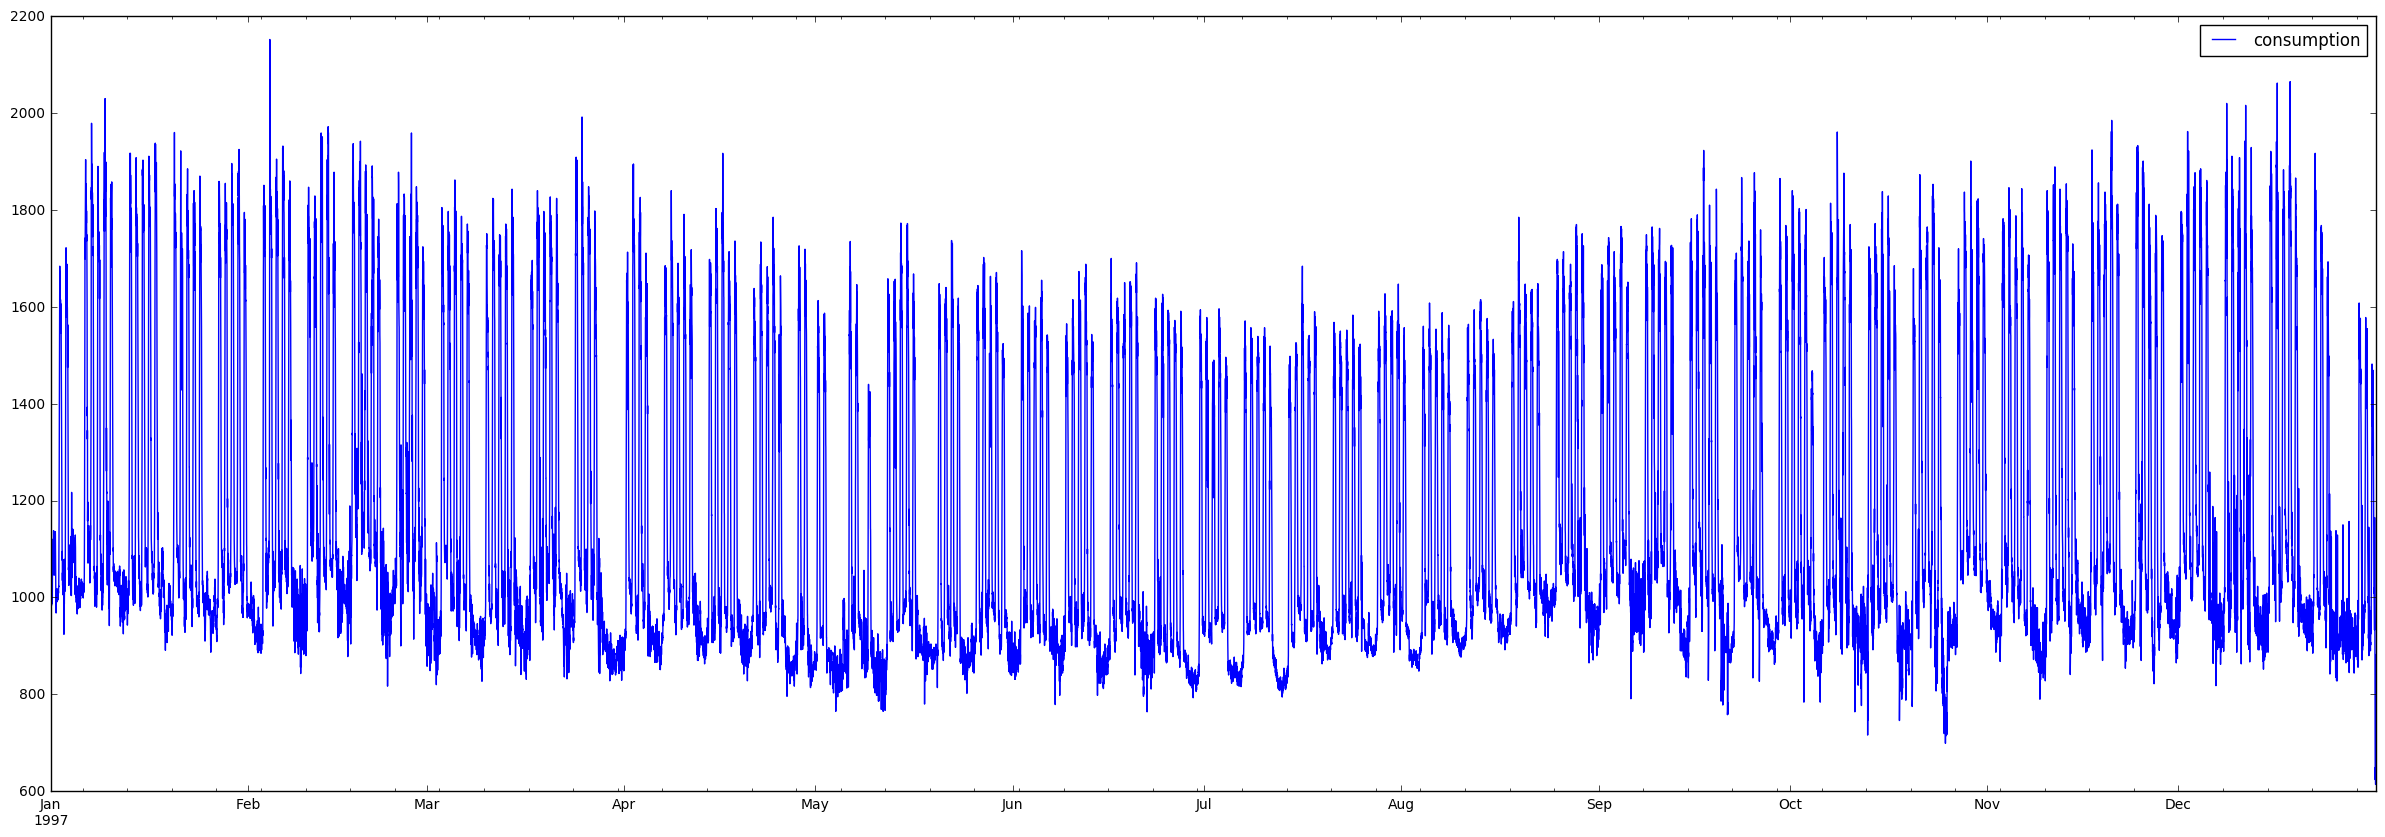

In [9]:
df.plot(figsize=(30,10))
plt.show()

In [10]:
# df = df.resample('1H').sum()
# df.head()

In [11]:
#df.tail()

In [23]:
#drop days from 1 to 5 jan to start from a monday.
df = df['1997-01-06':]
#add anomaly column
df['anomaly'] = 0
df.head()

consumption  anomaly
1997-01-06 00:00:00         1008        0
1997-01-06 00:15:00         1001        0
1997-01-06 00:30:00         1009        0
1997-01-06 00:45:00         1009        0
1997-01-06 01:00:00         1001        0

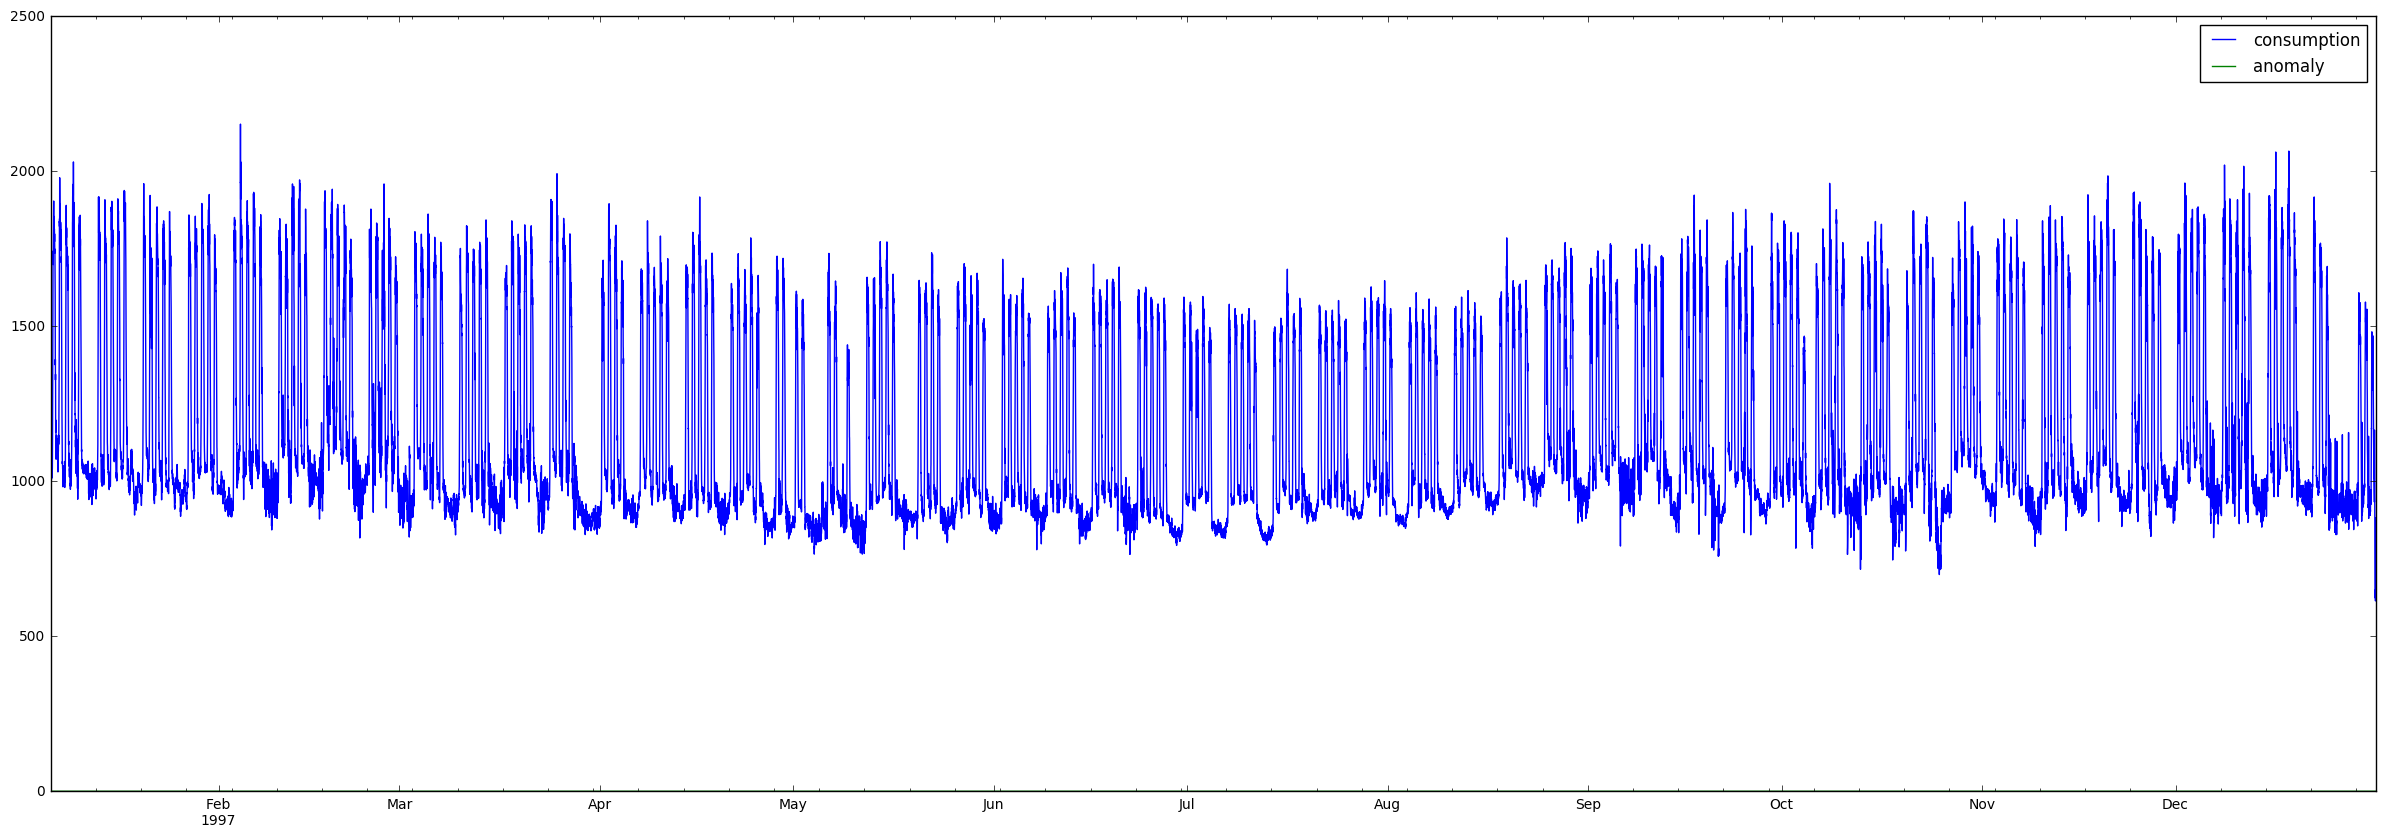

In [24]:
df.plot(figsize=(30,10))
plt.show()

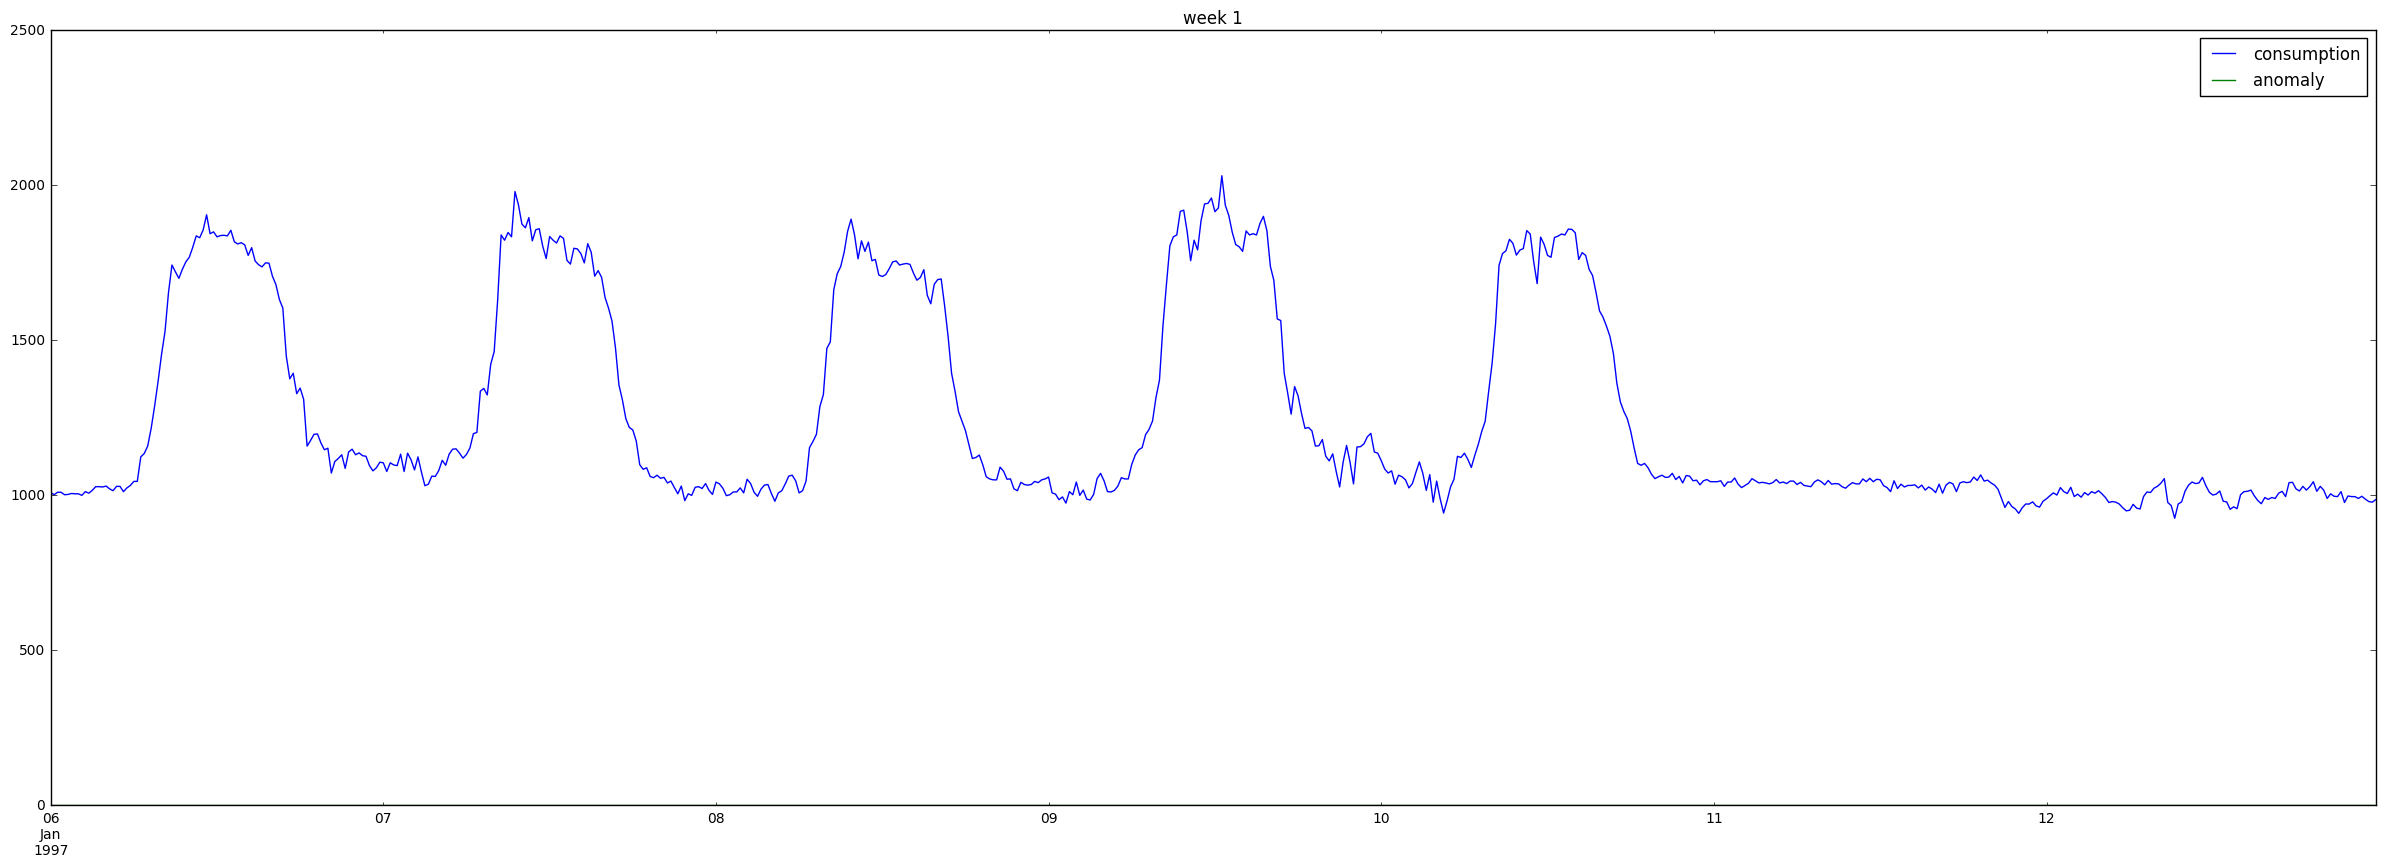

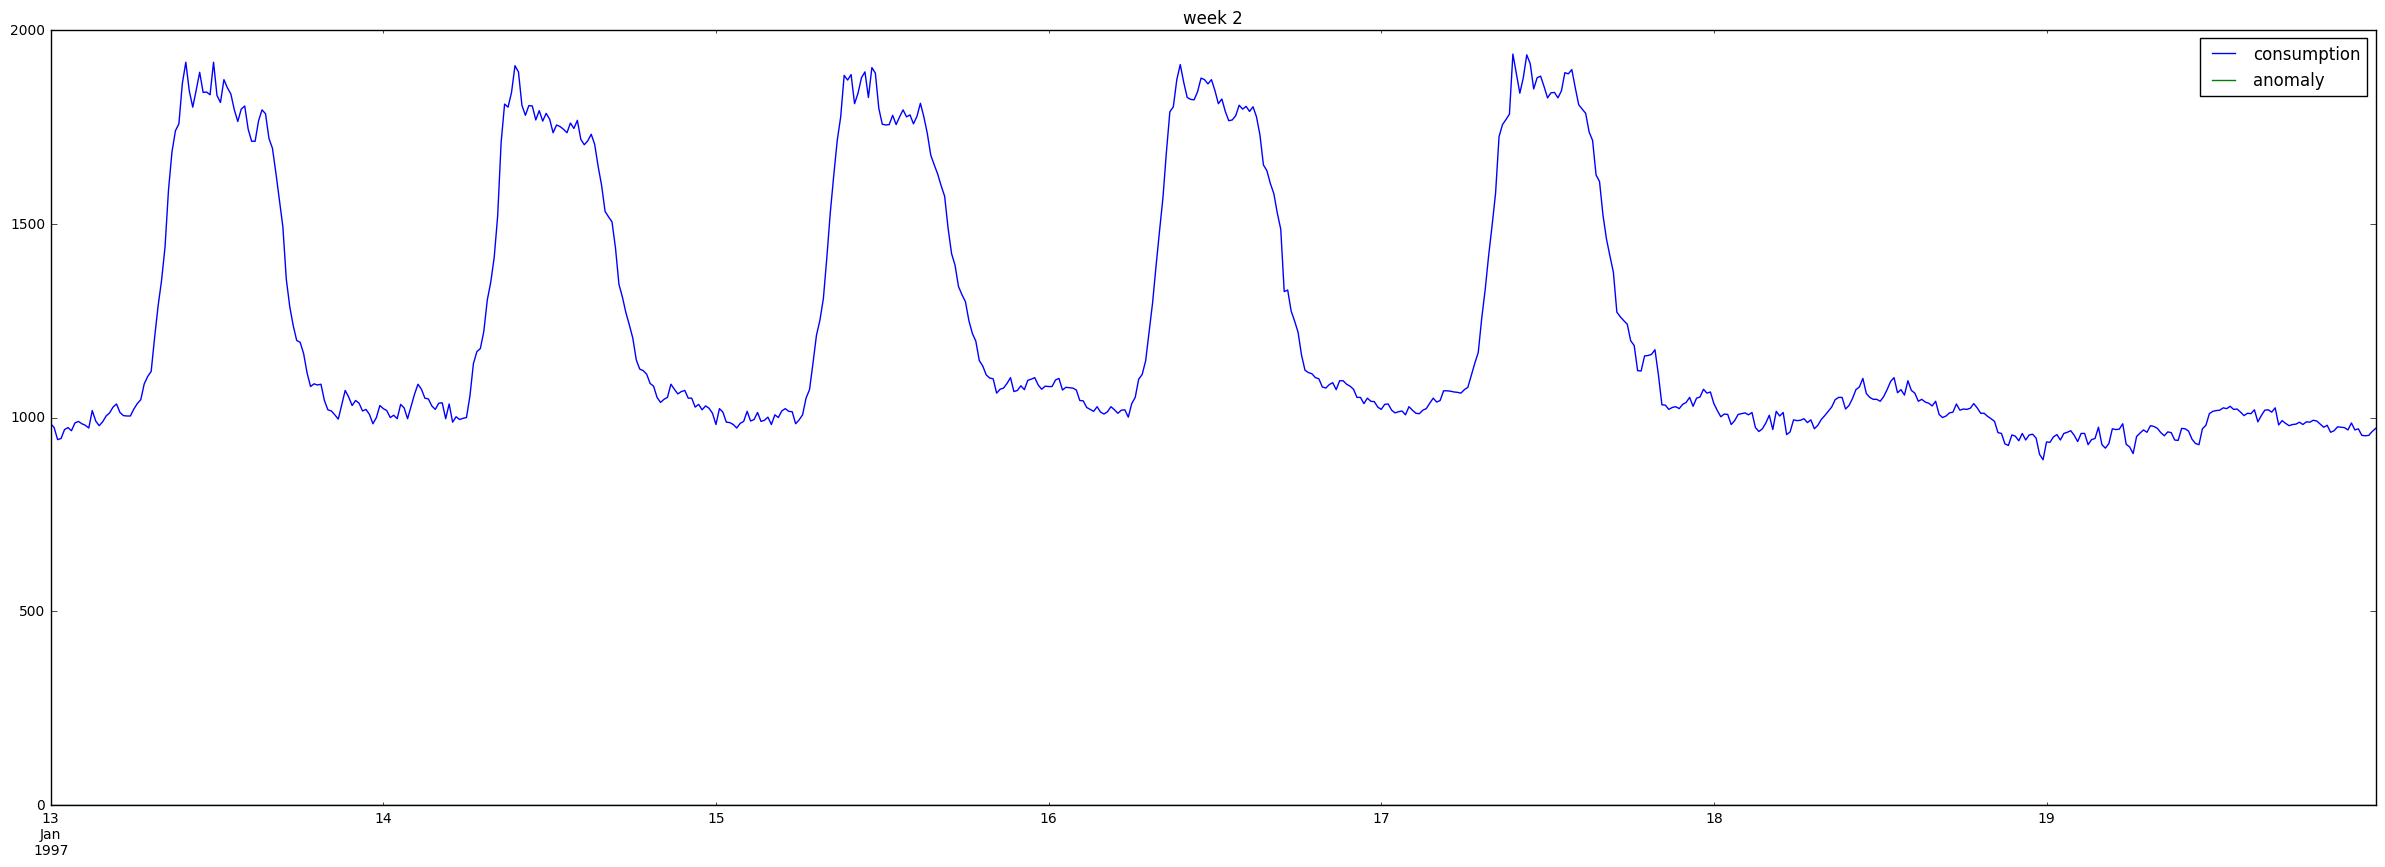

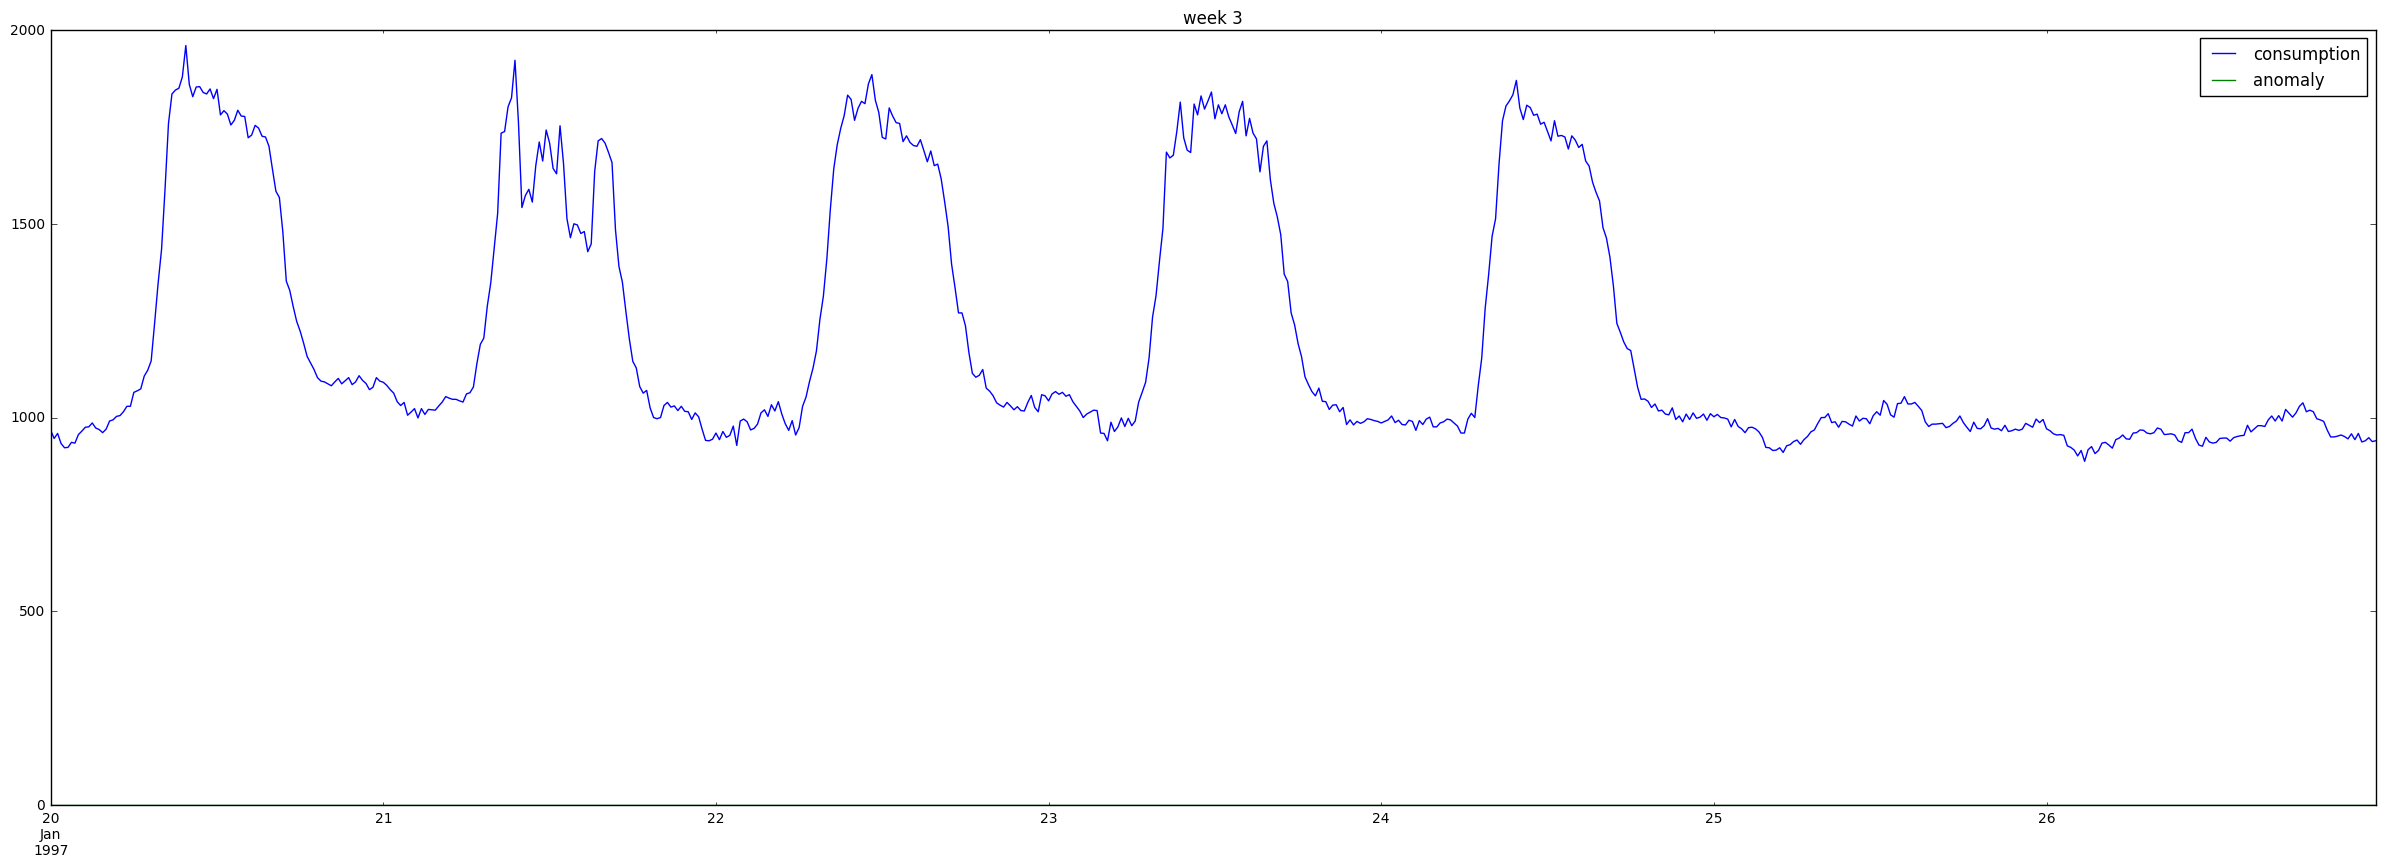

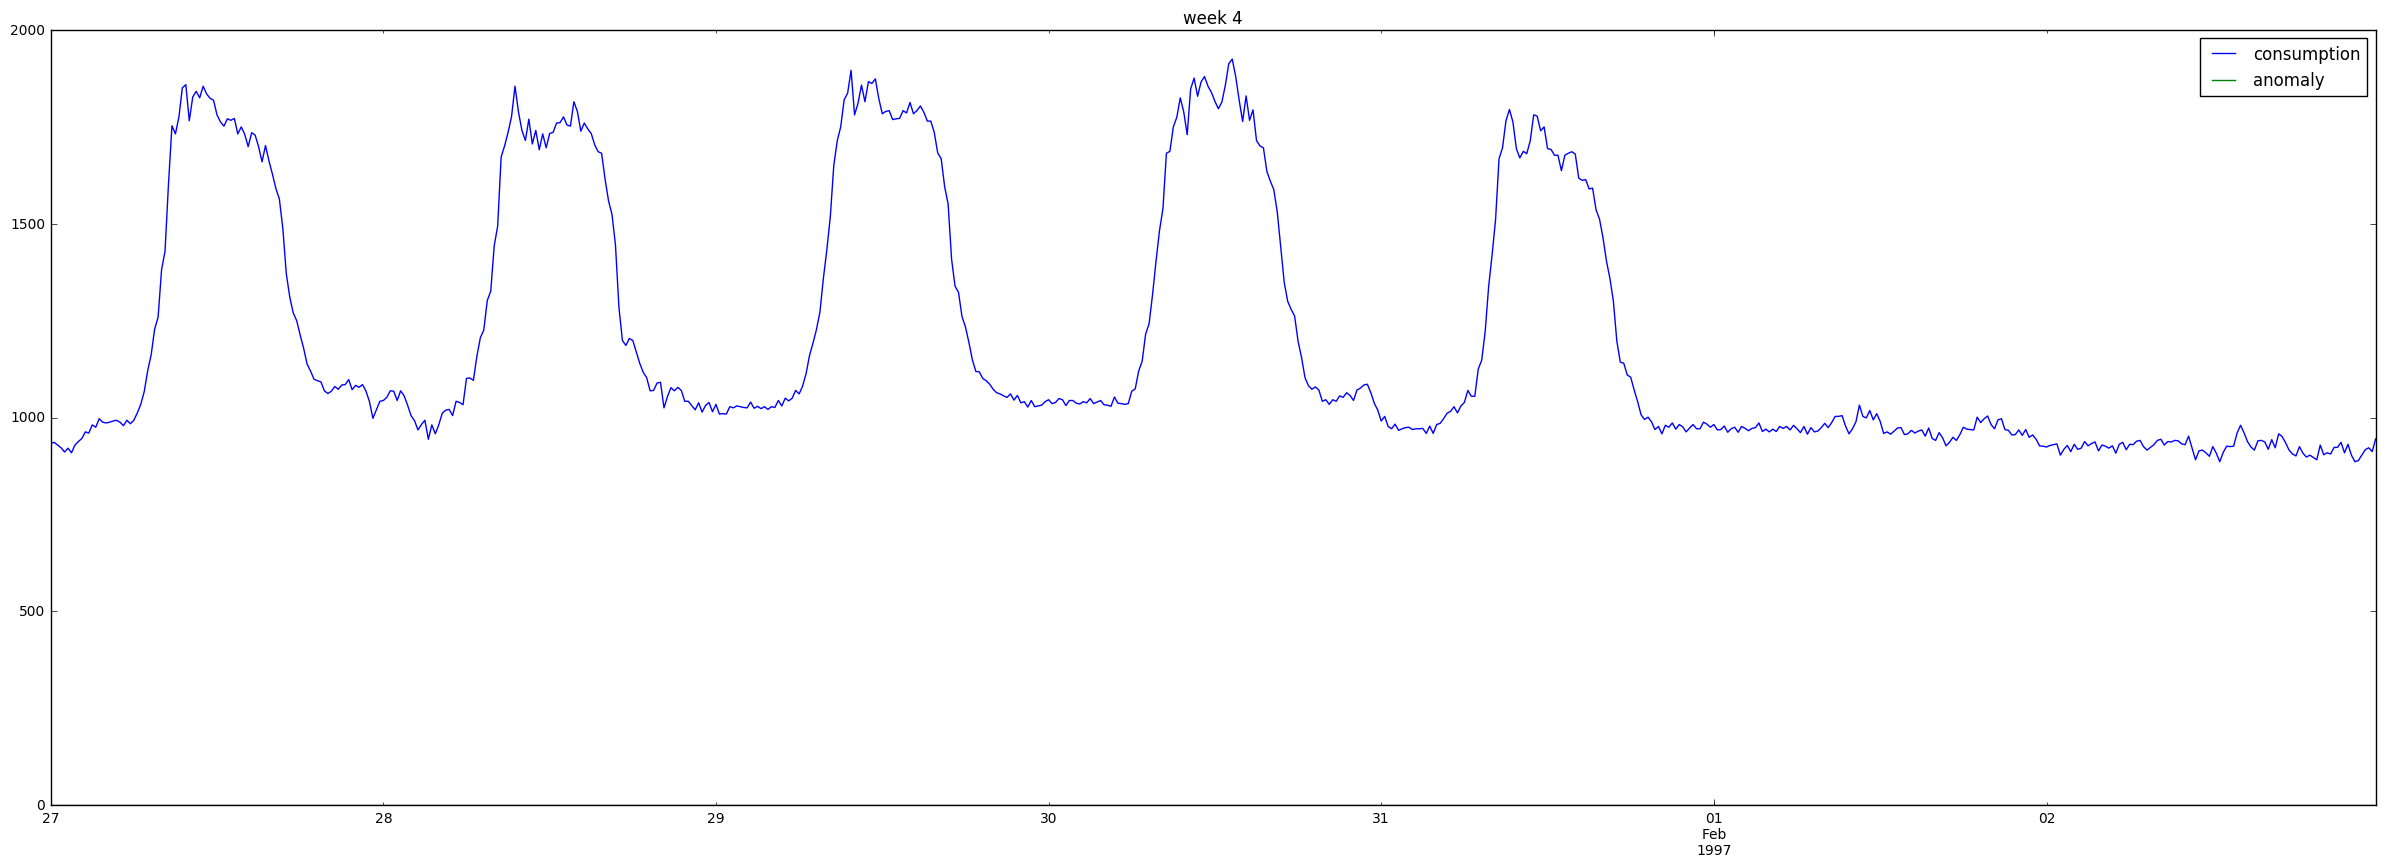

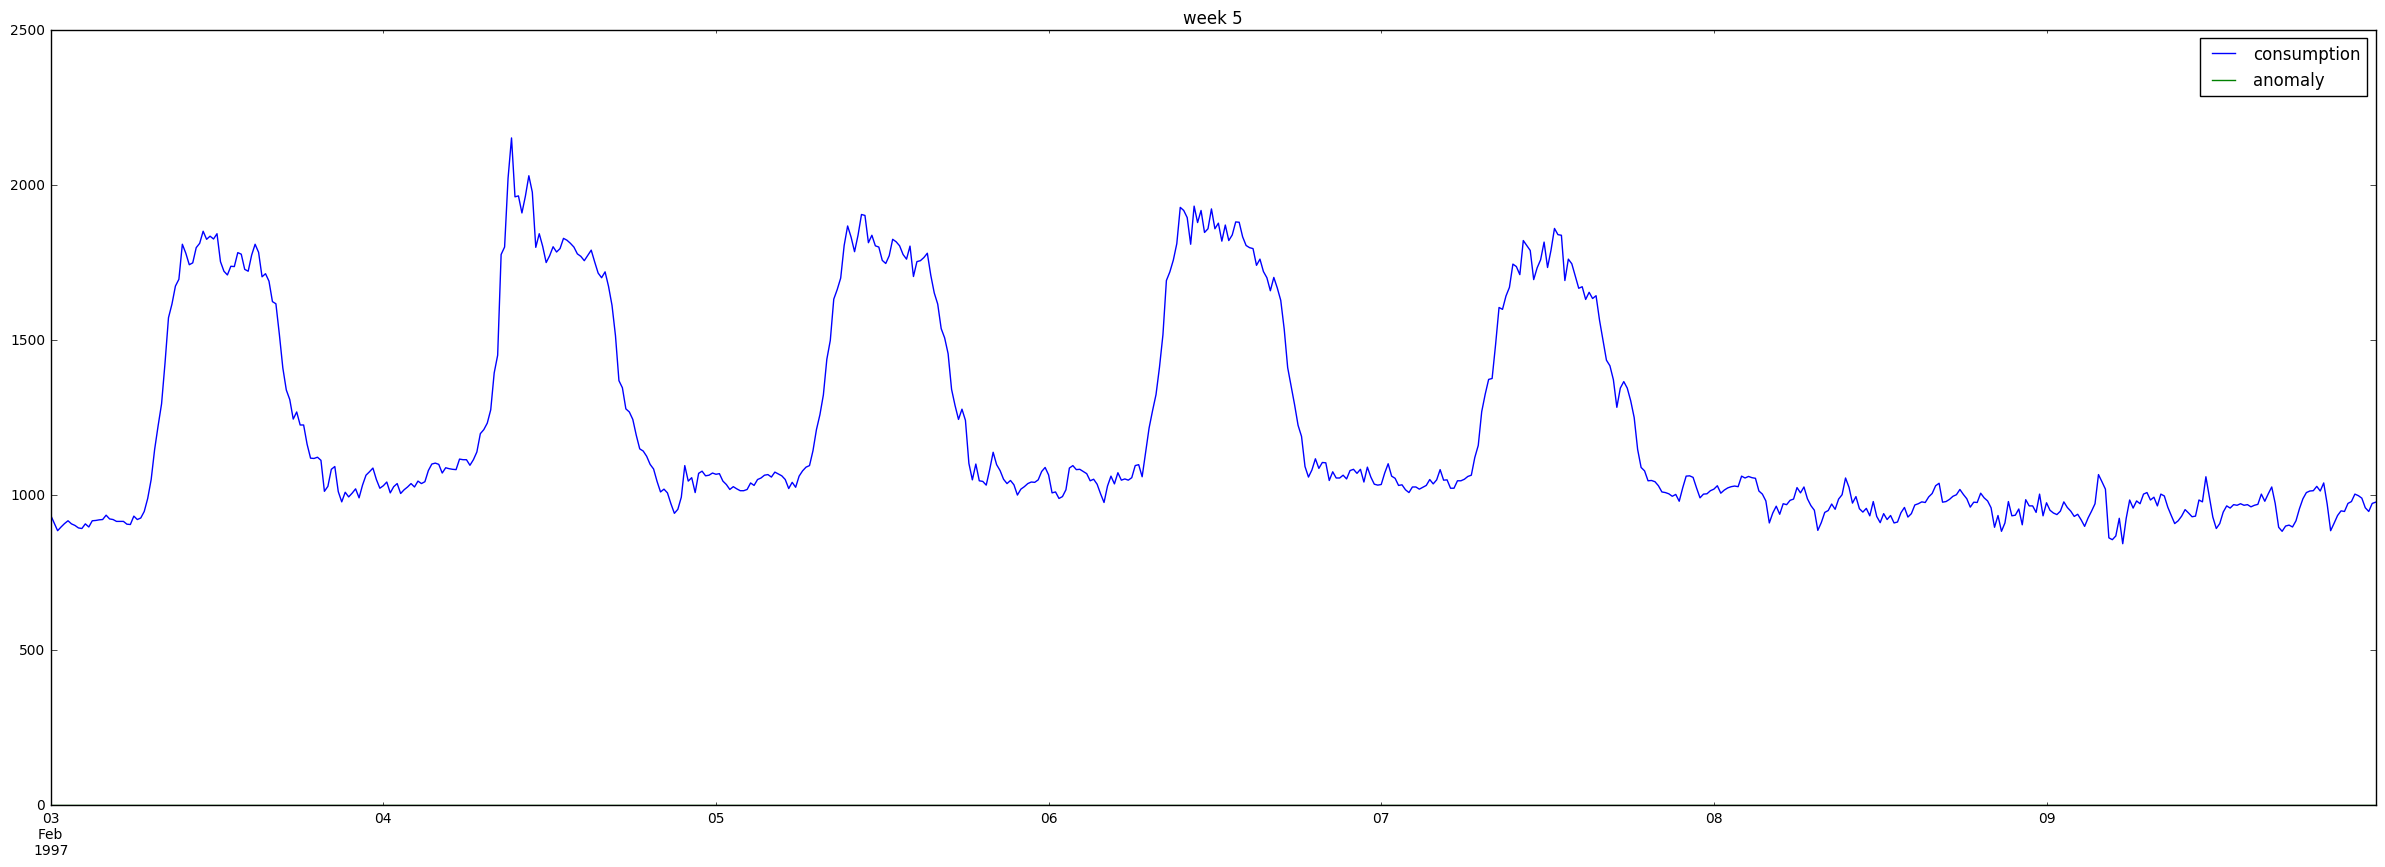

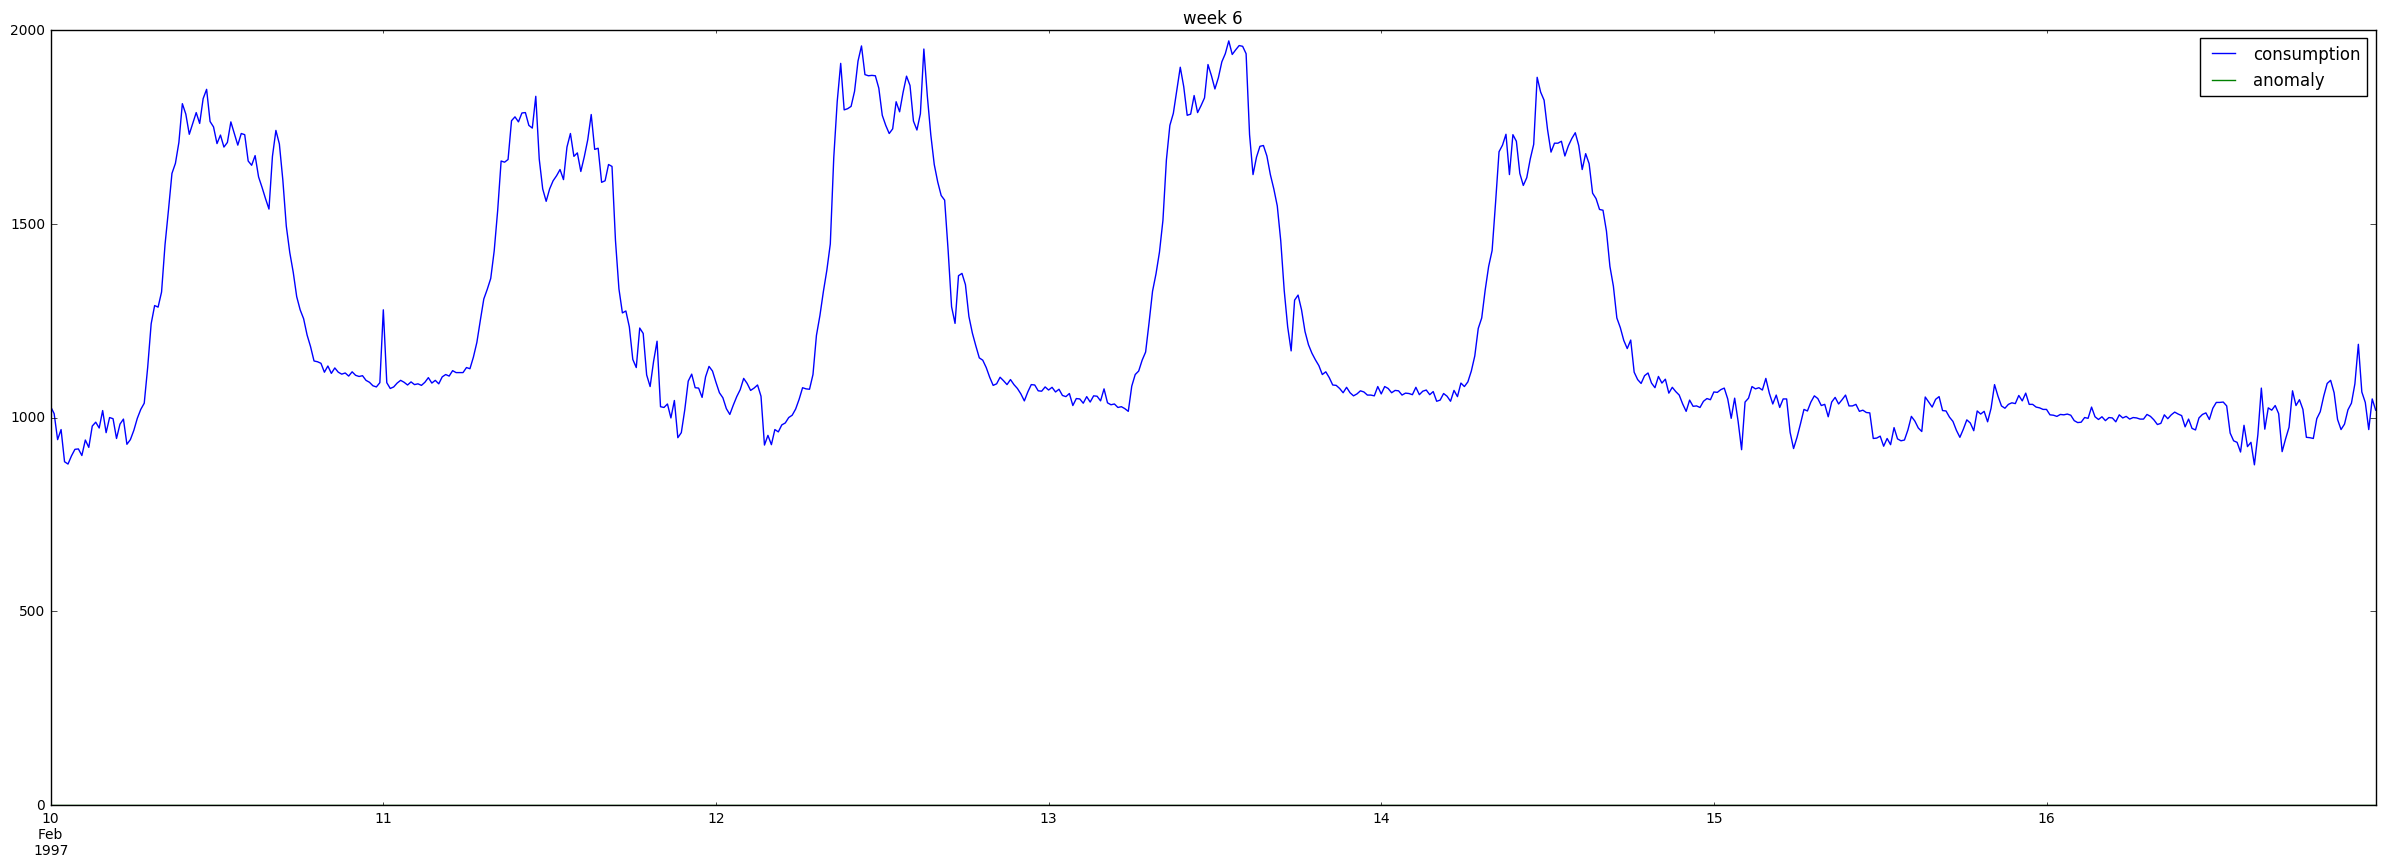

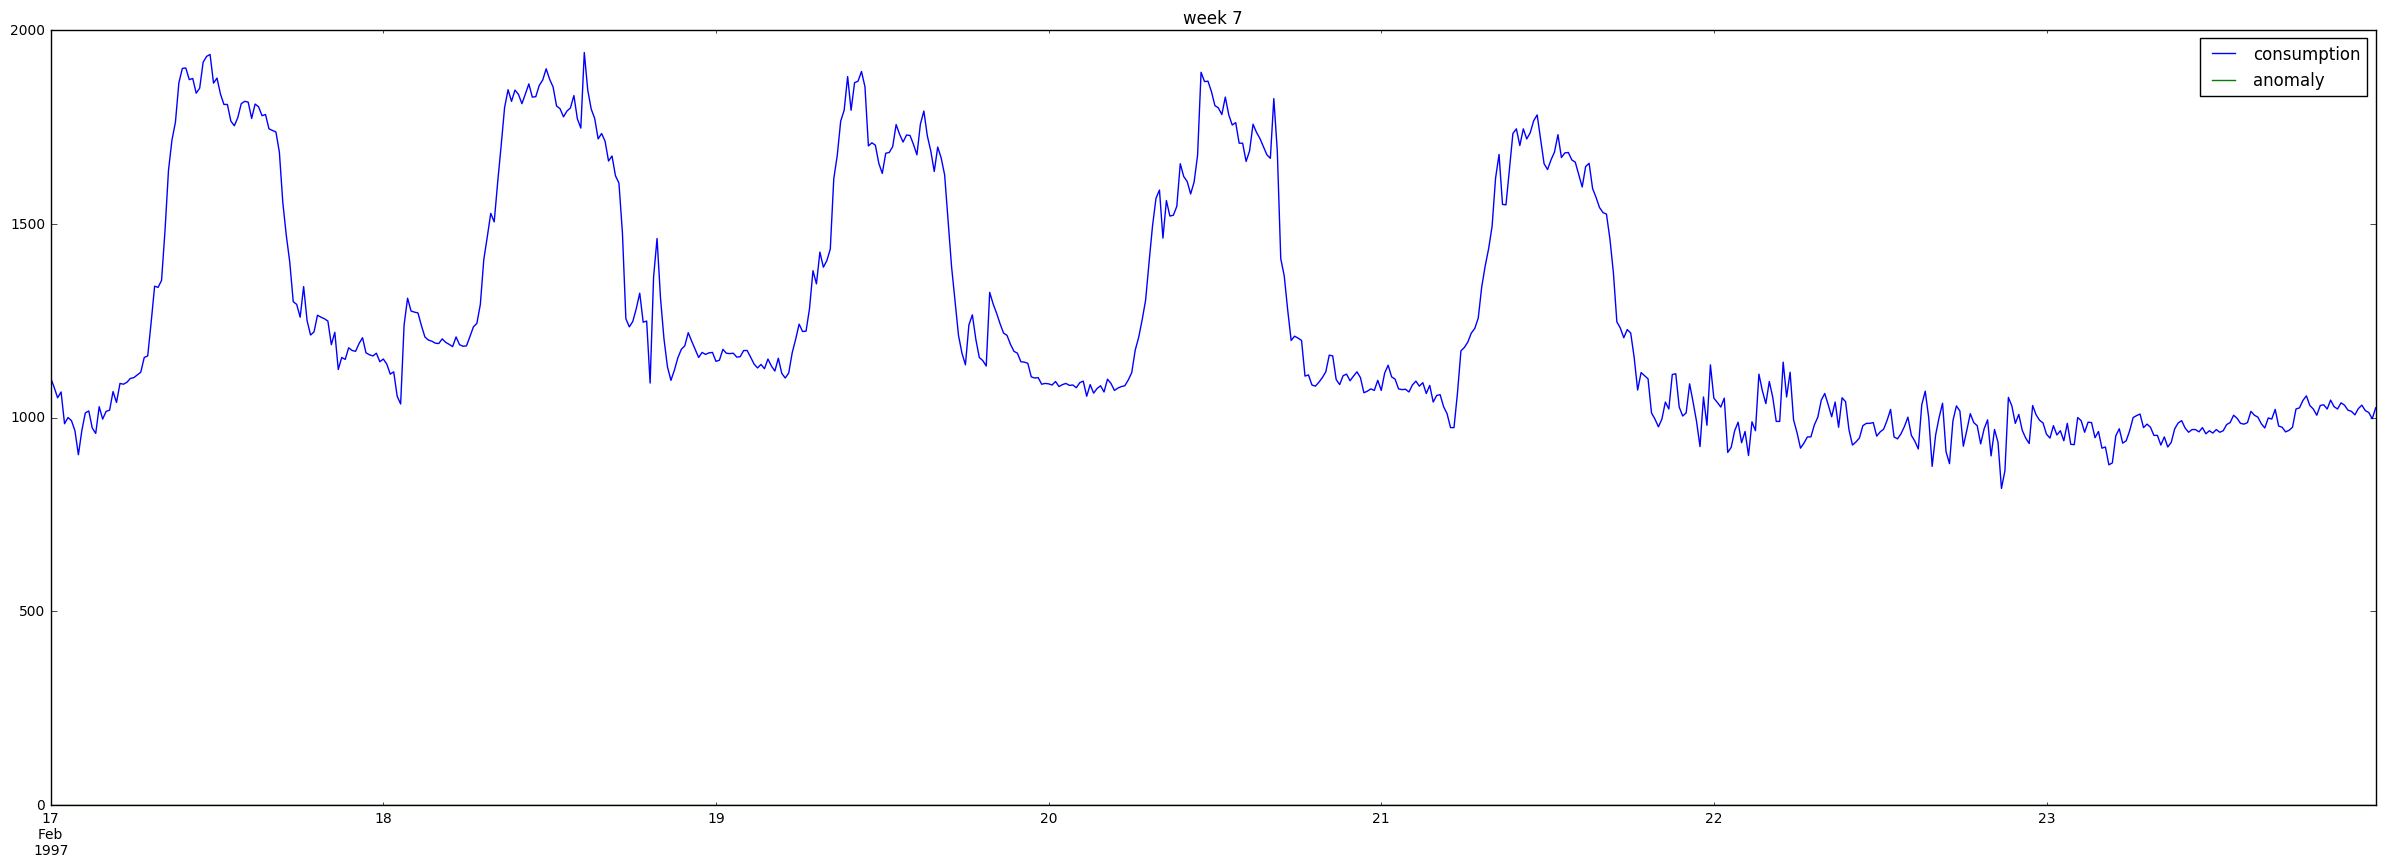

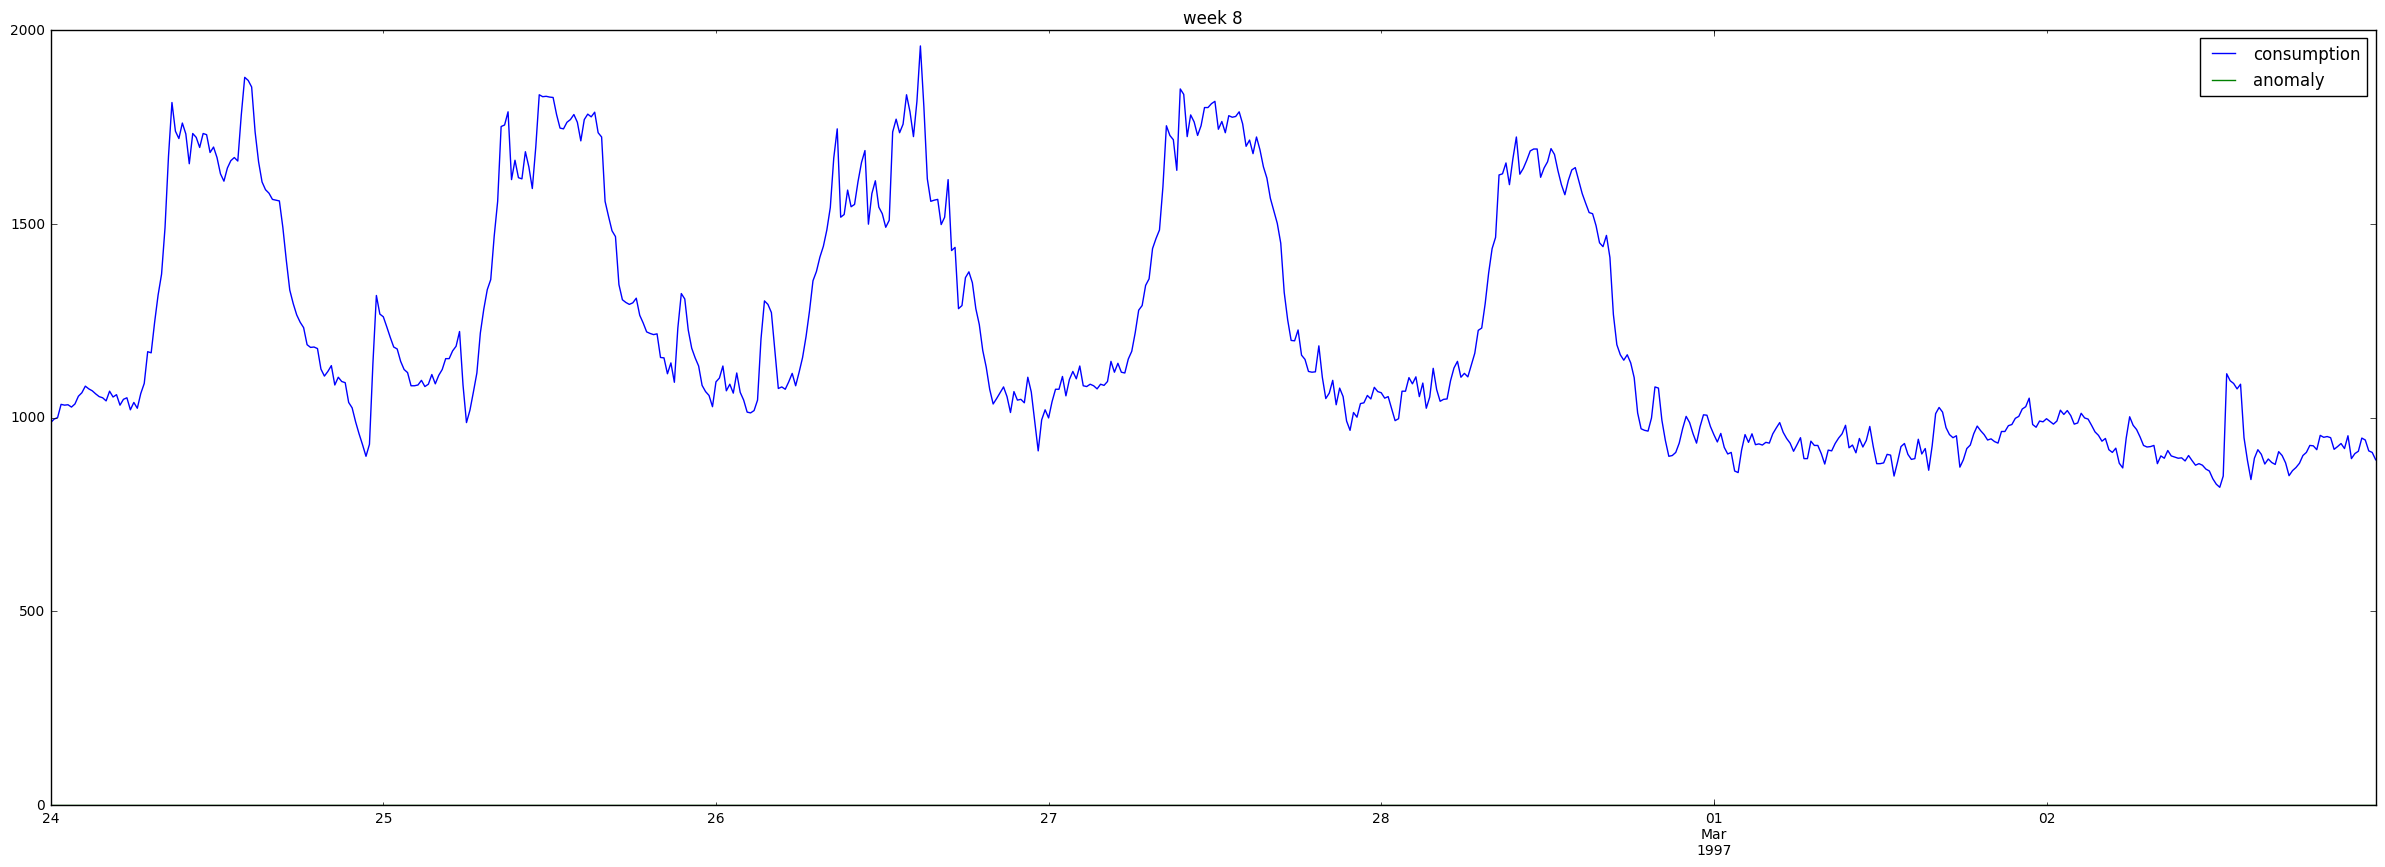

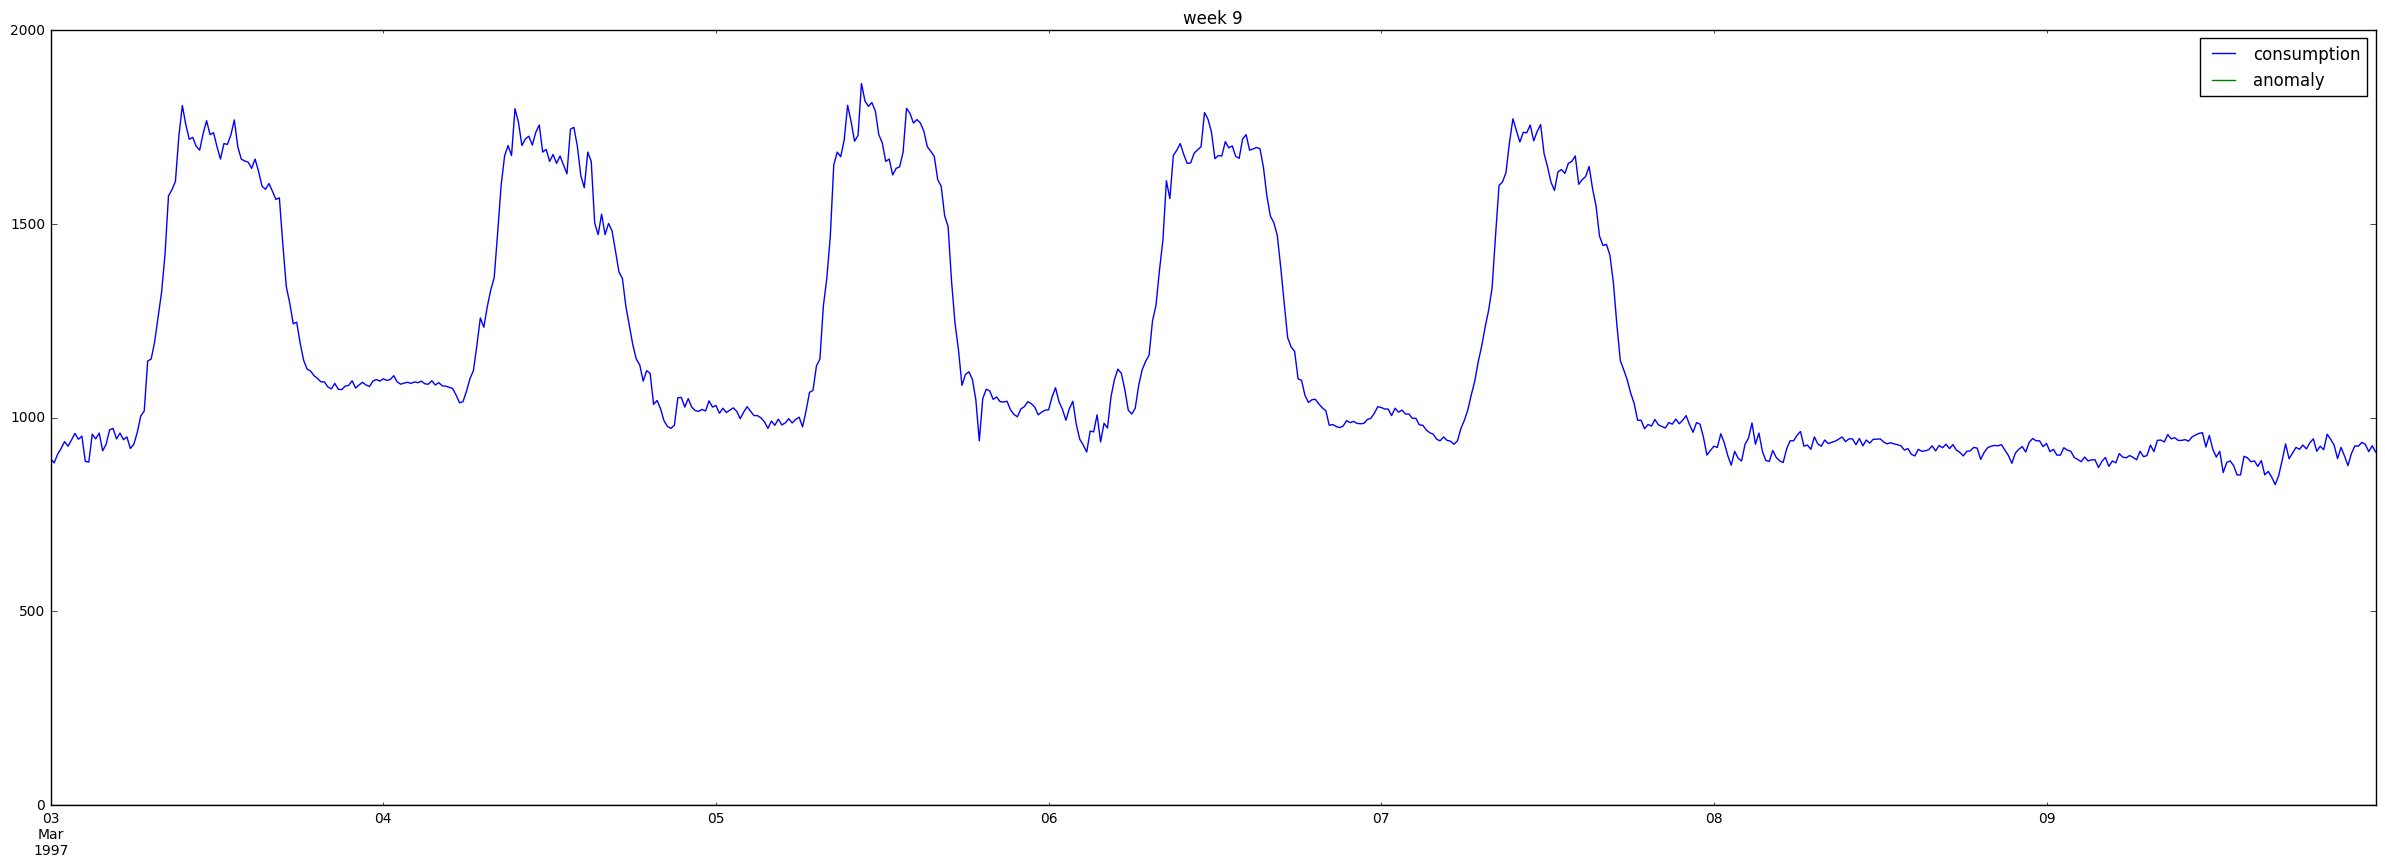

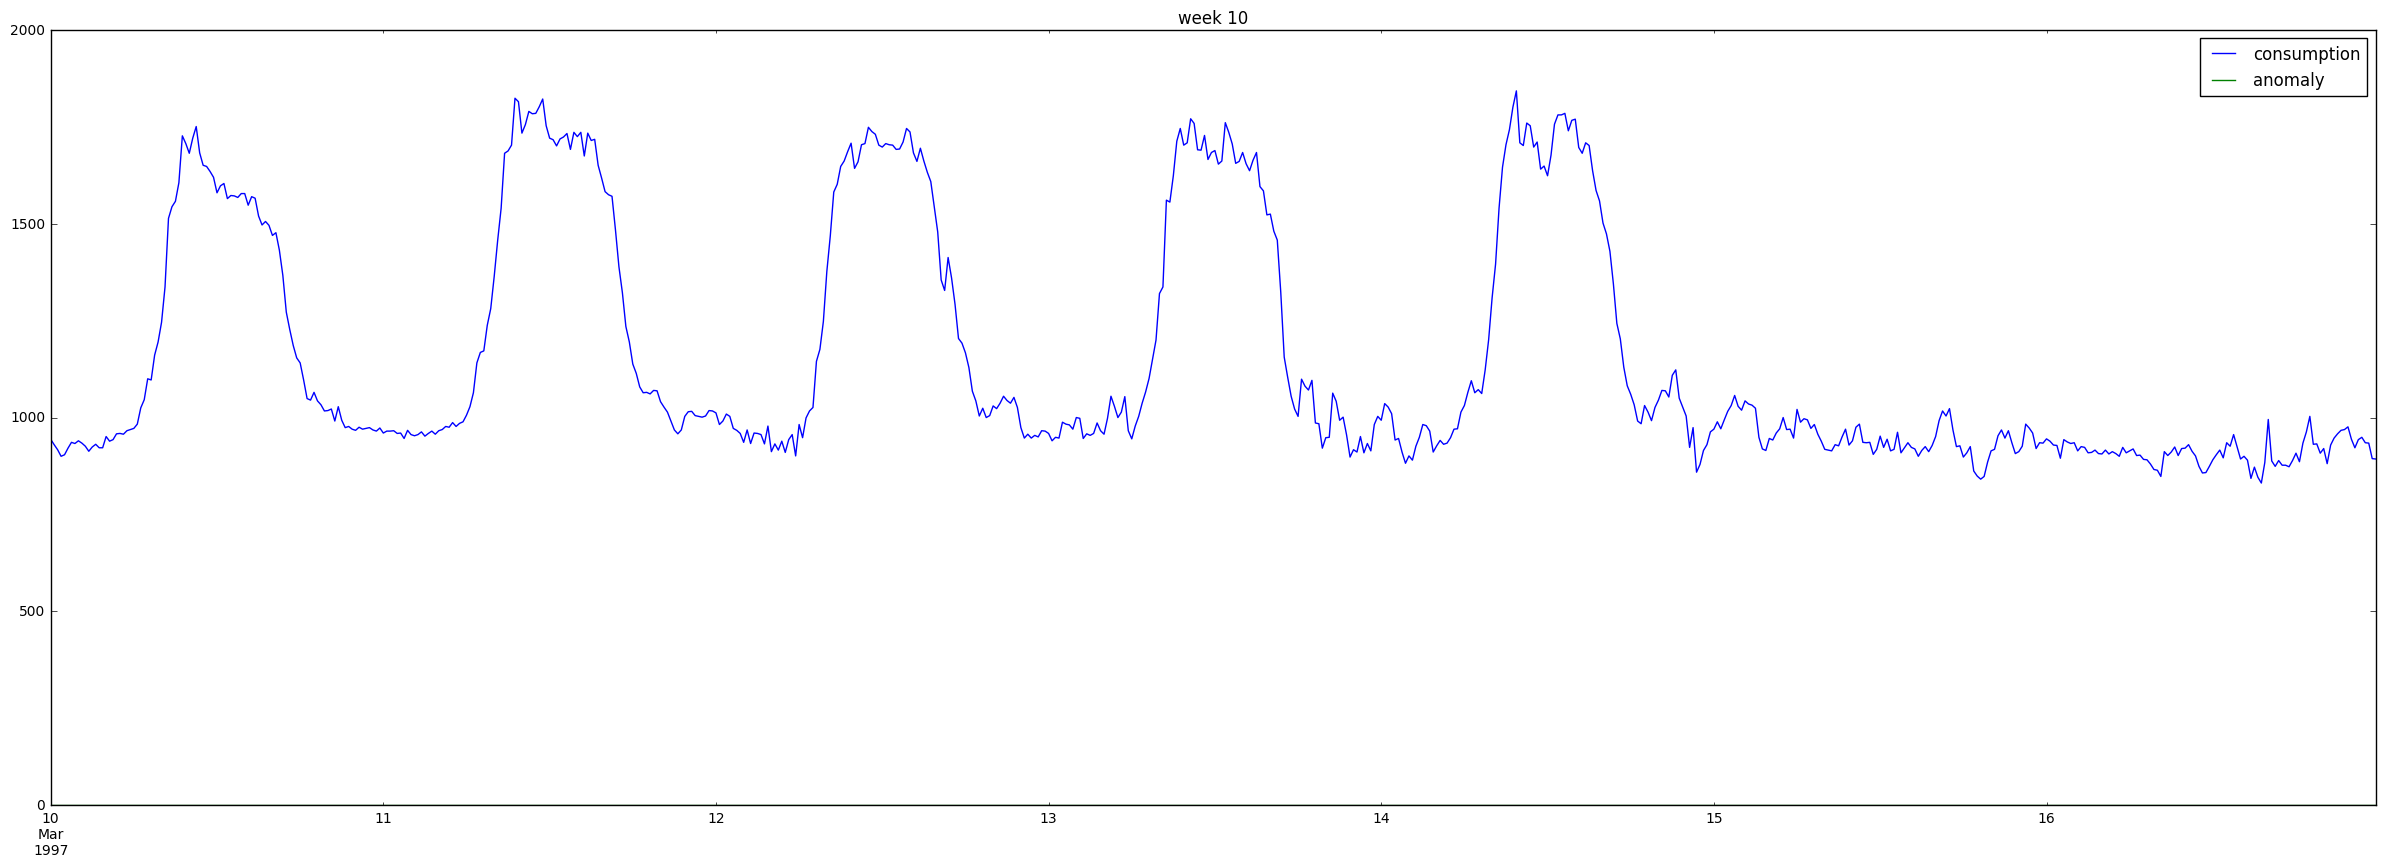

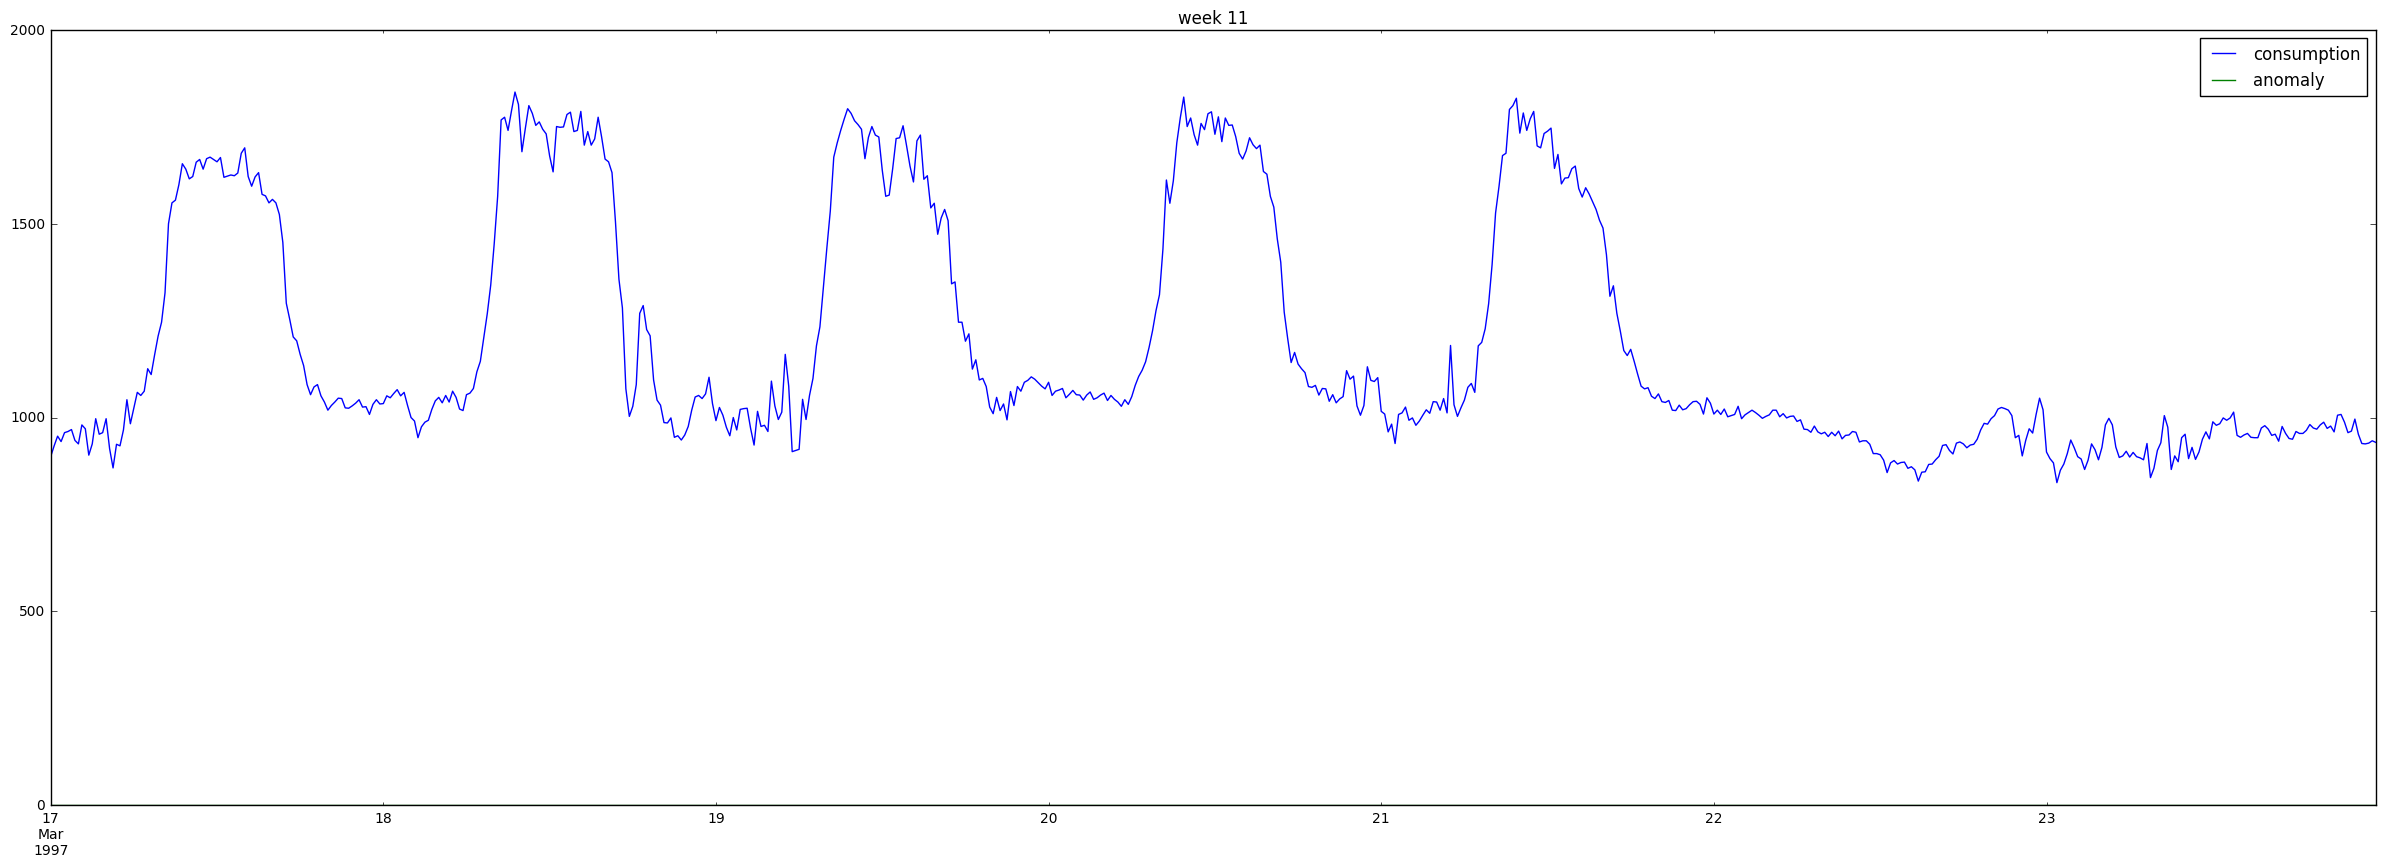

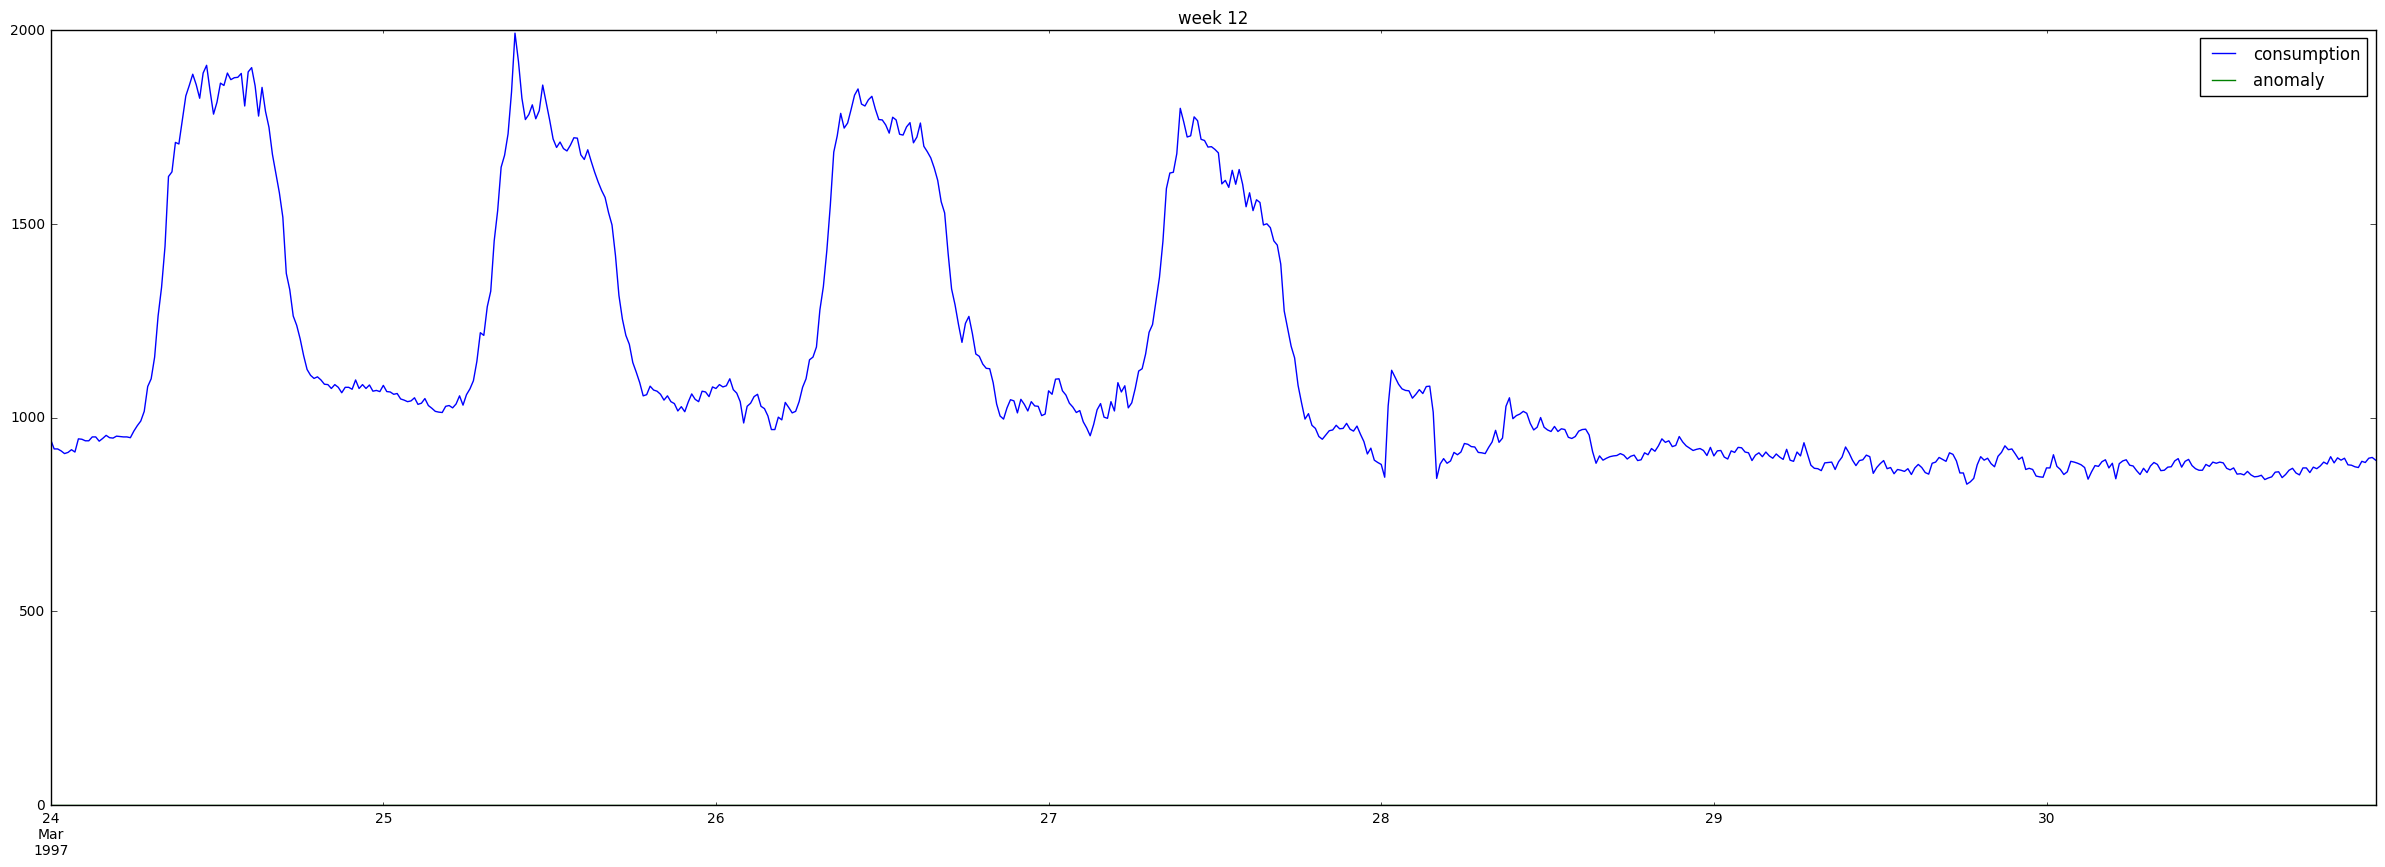

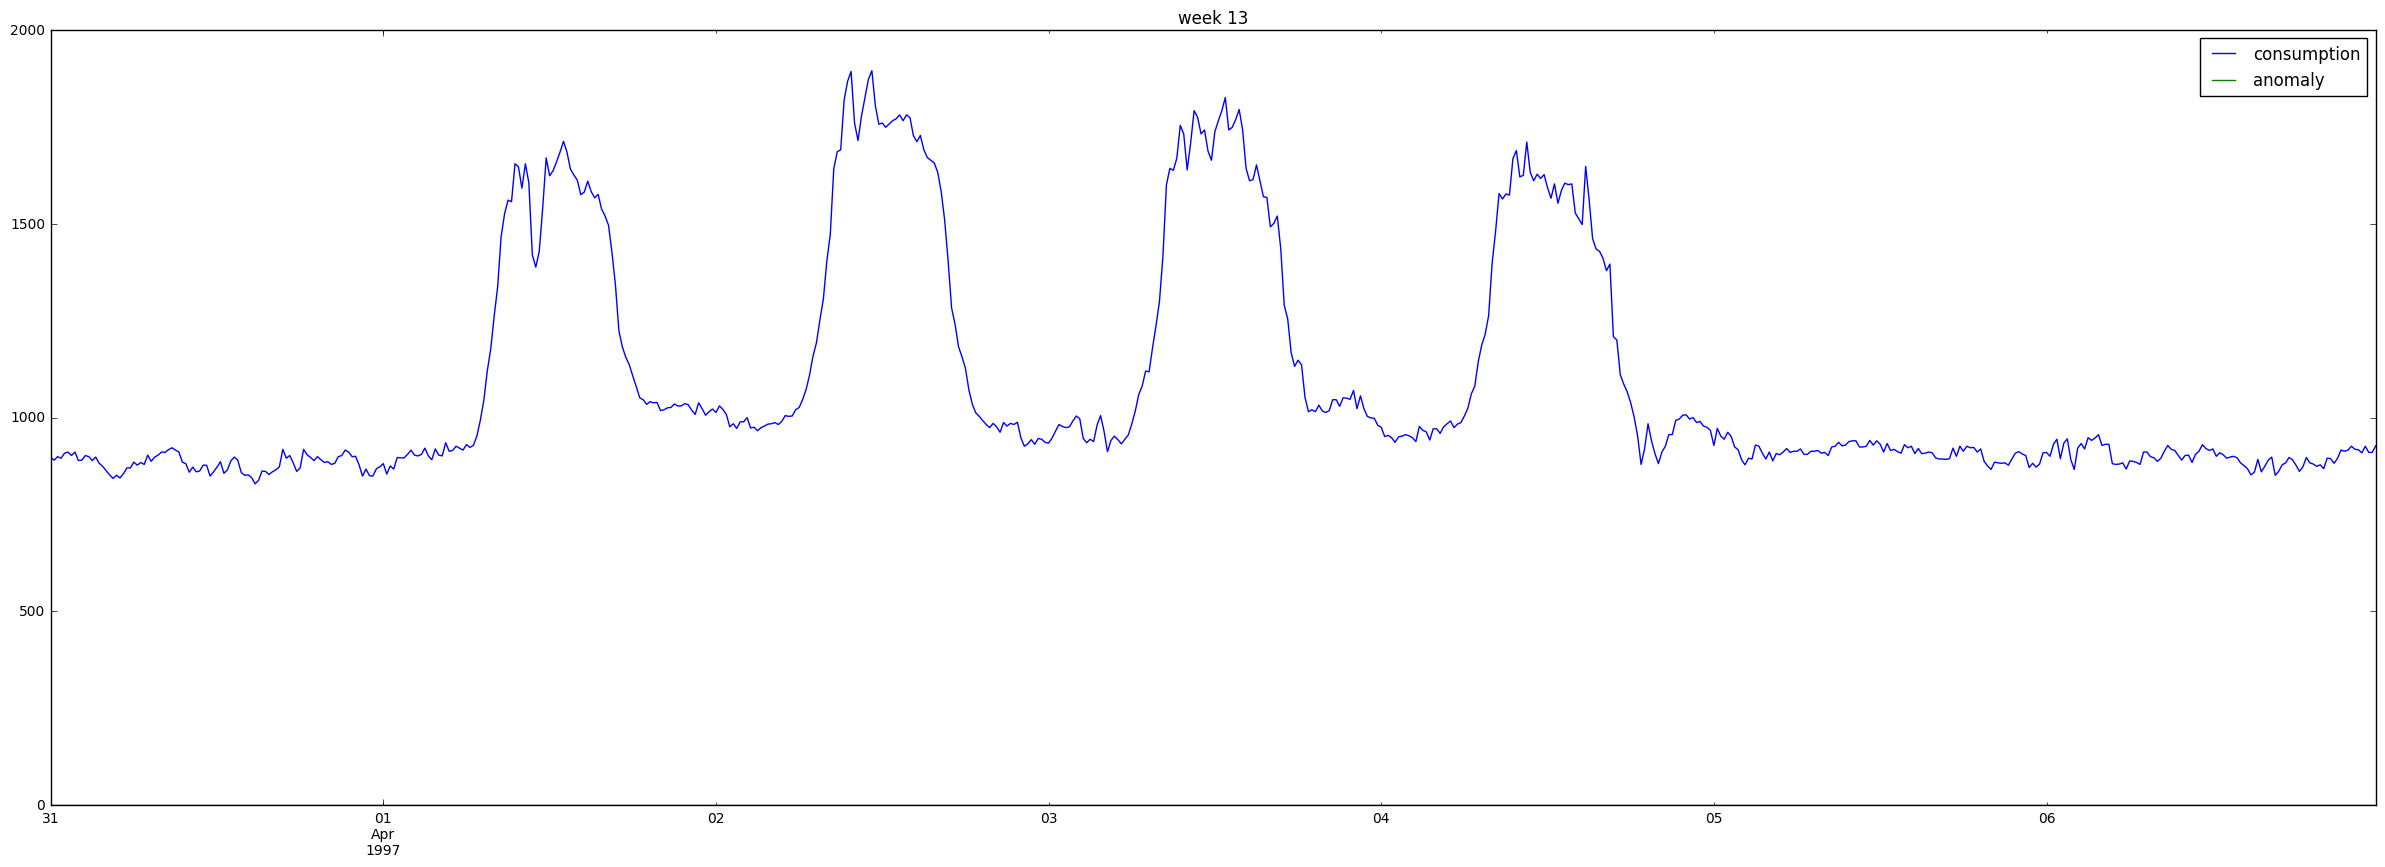

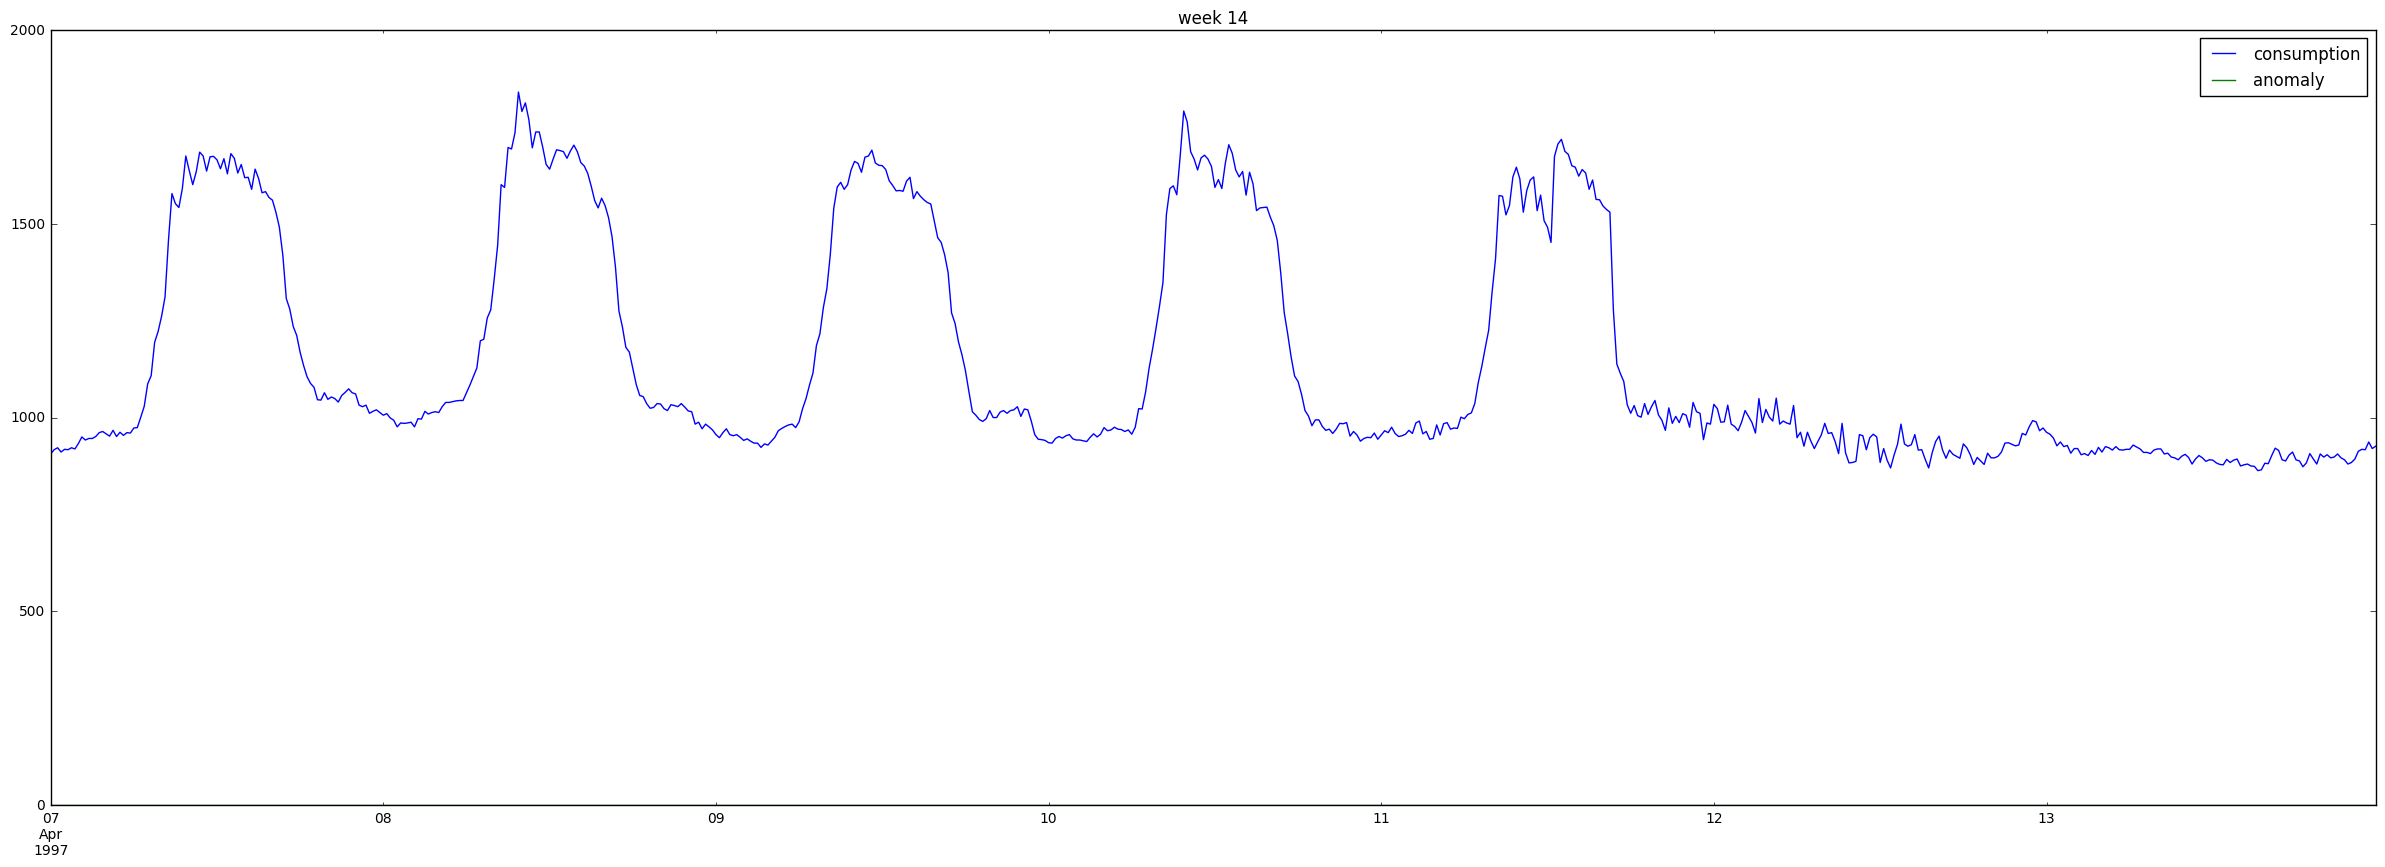

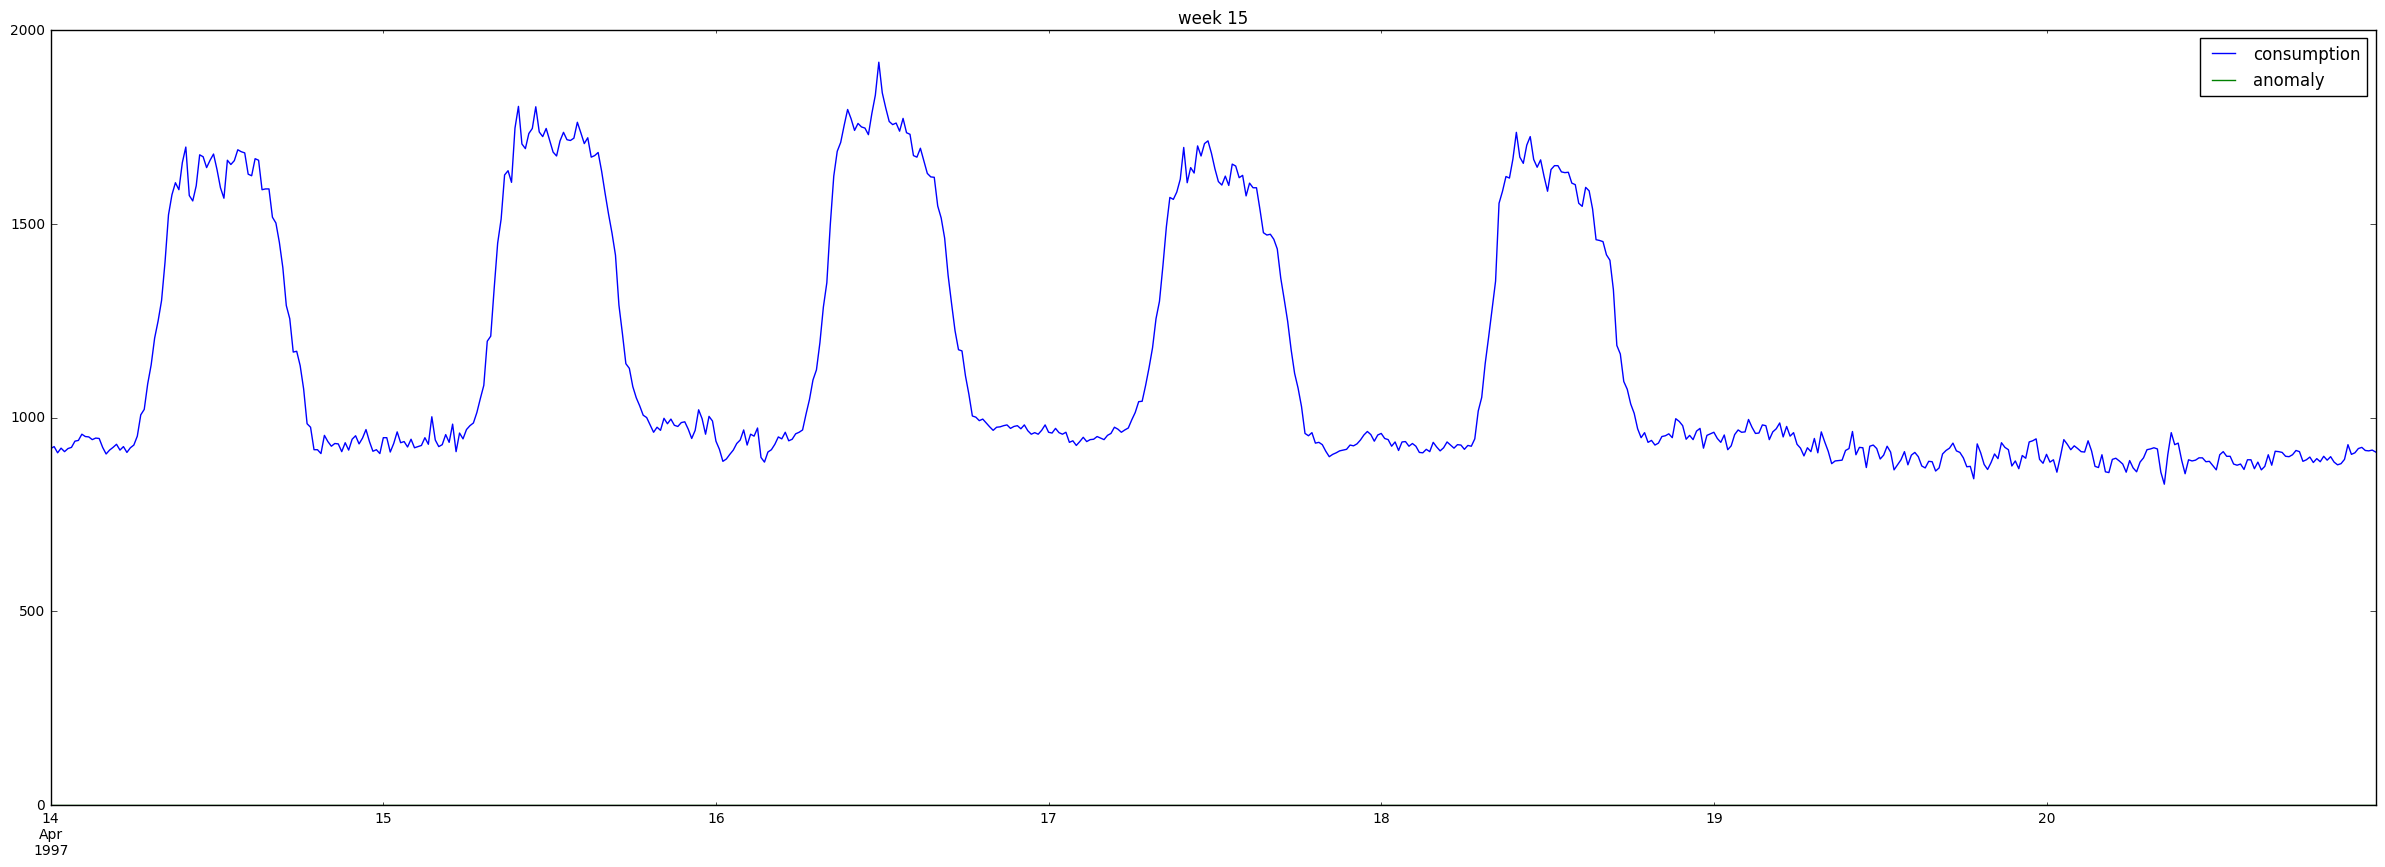

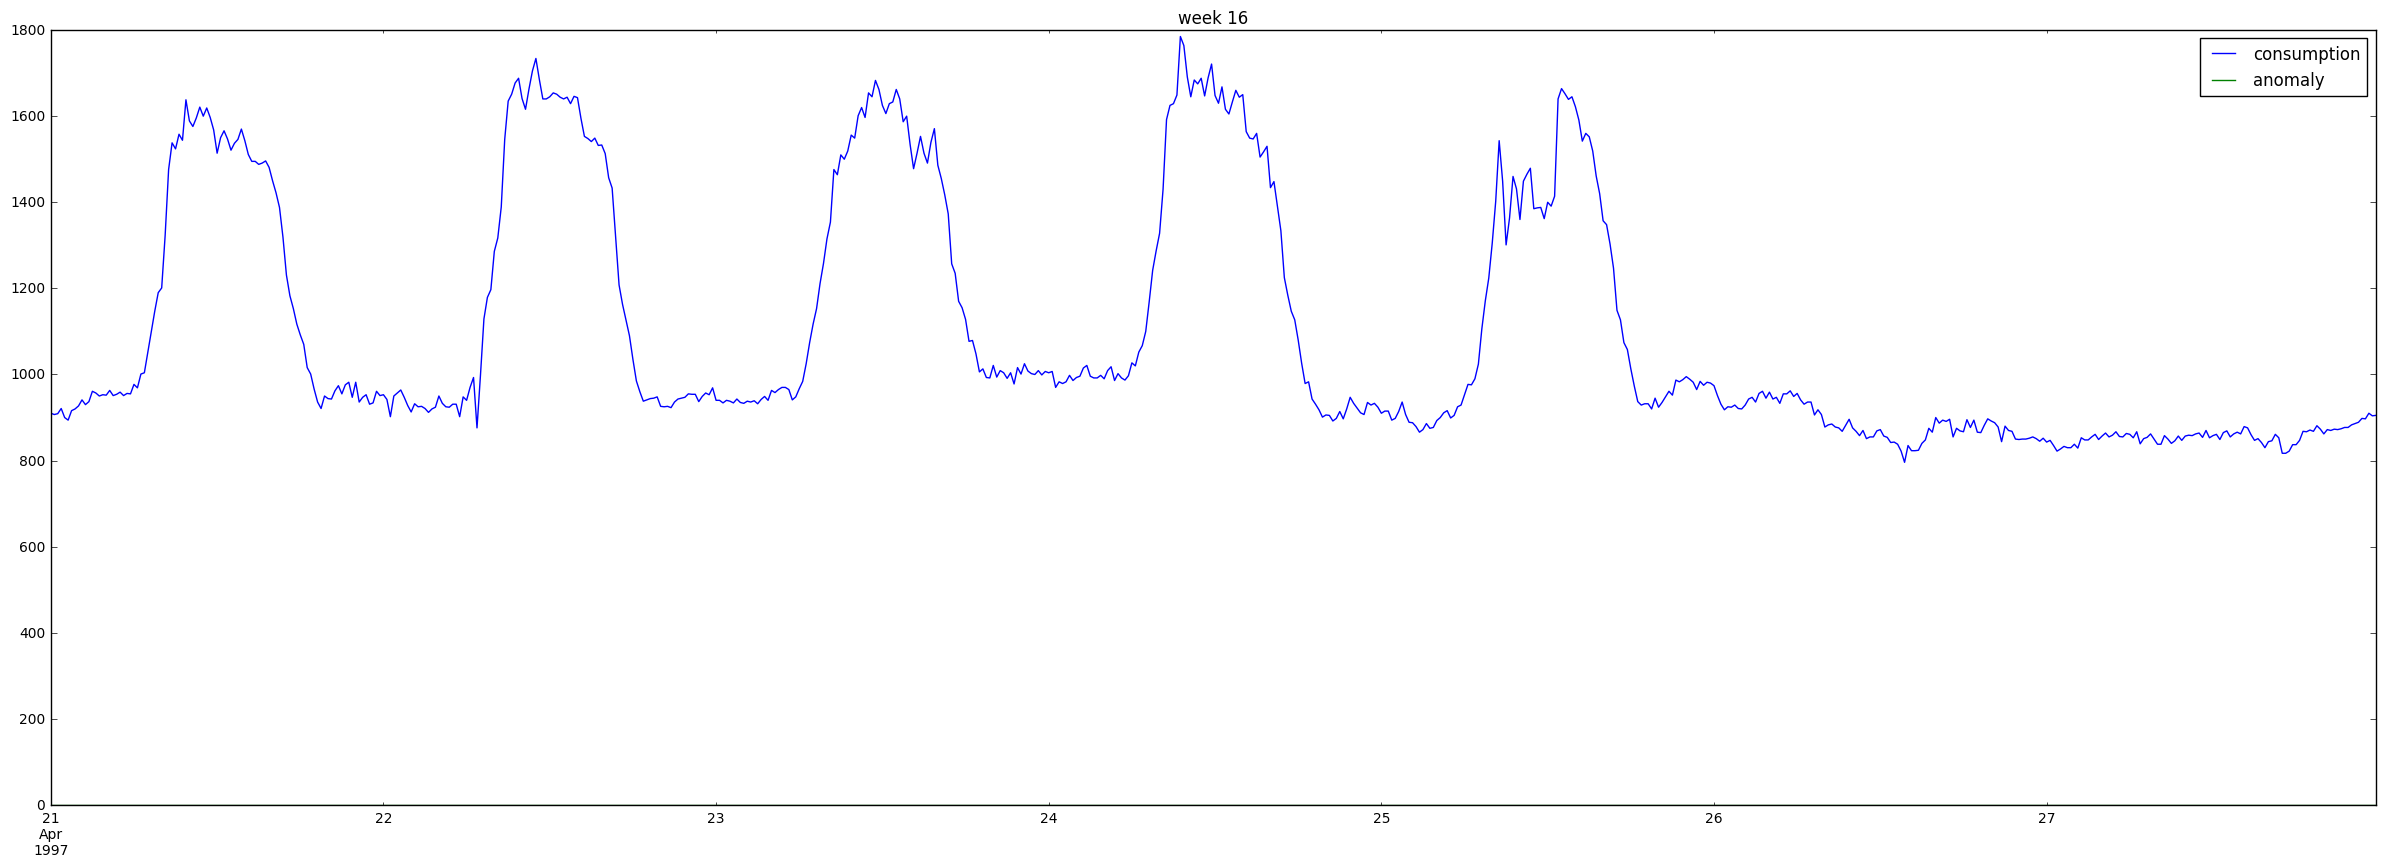

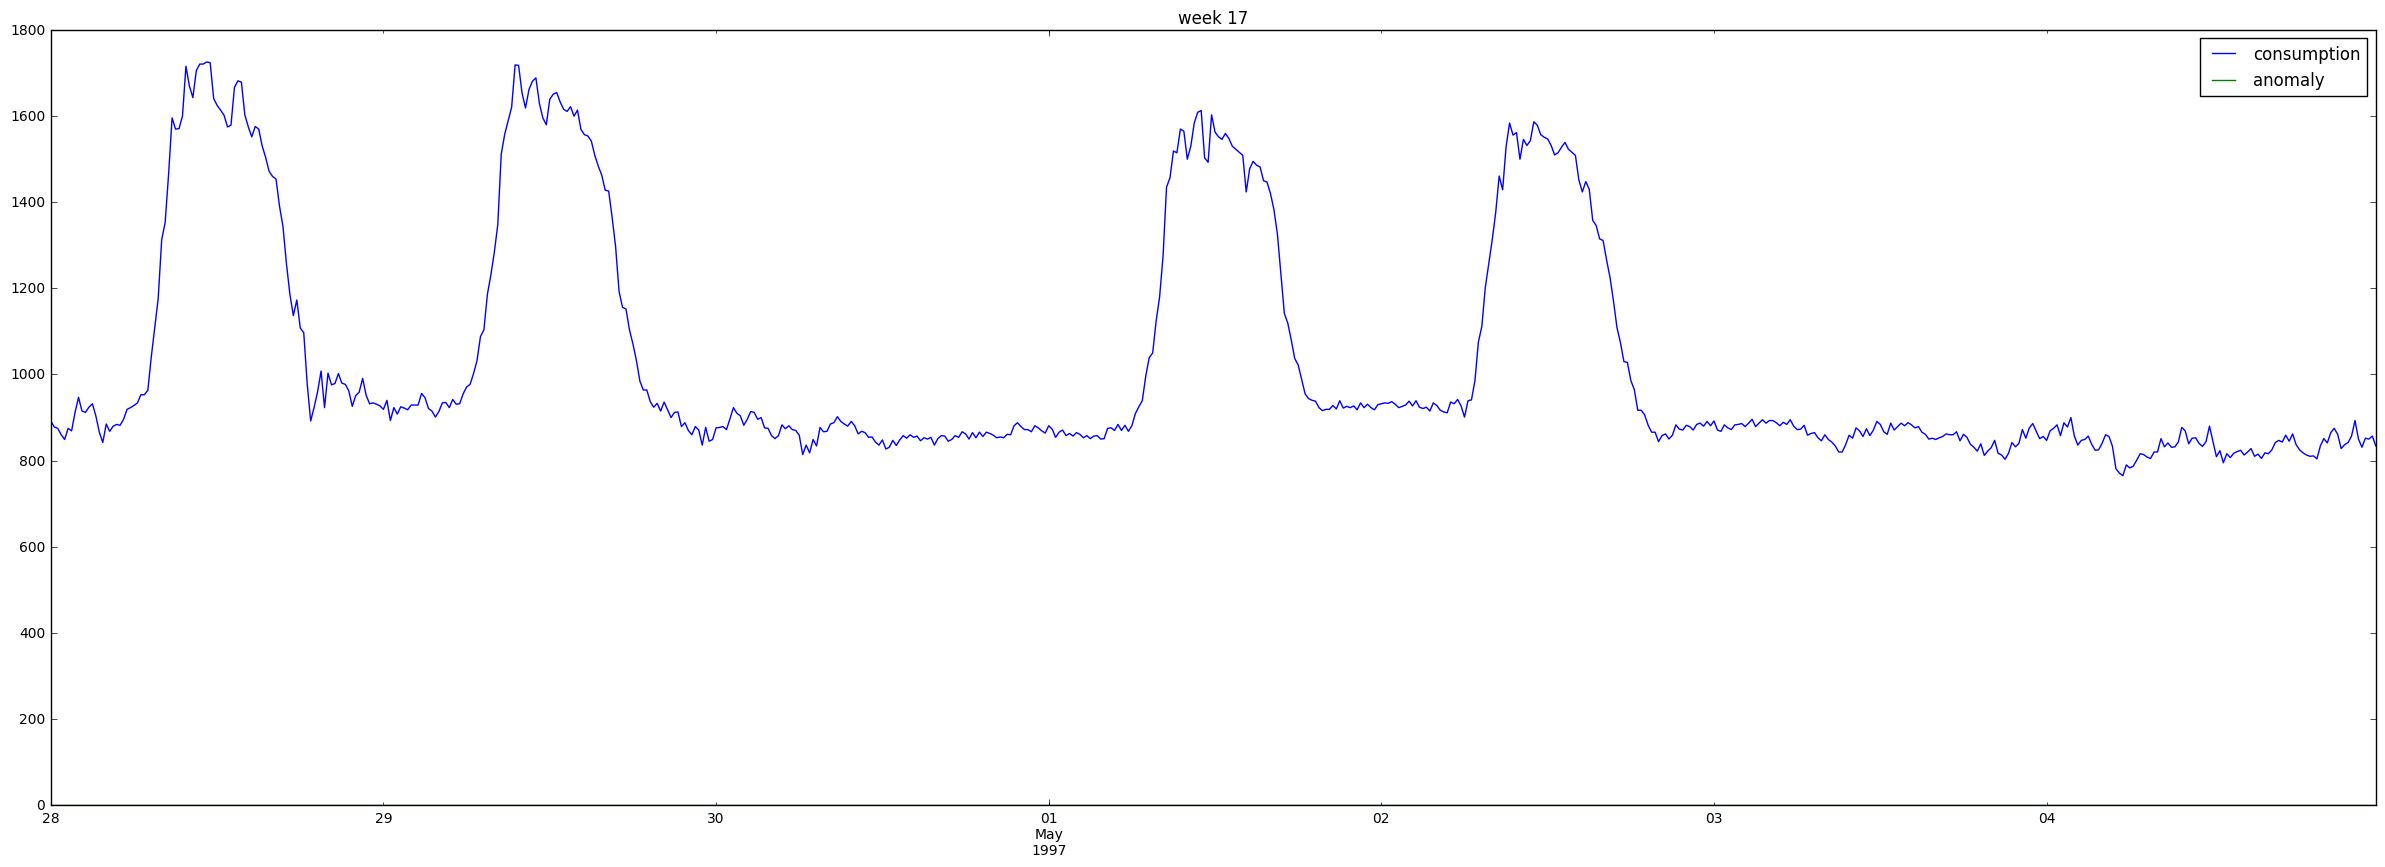

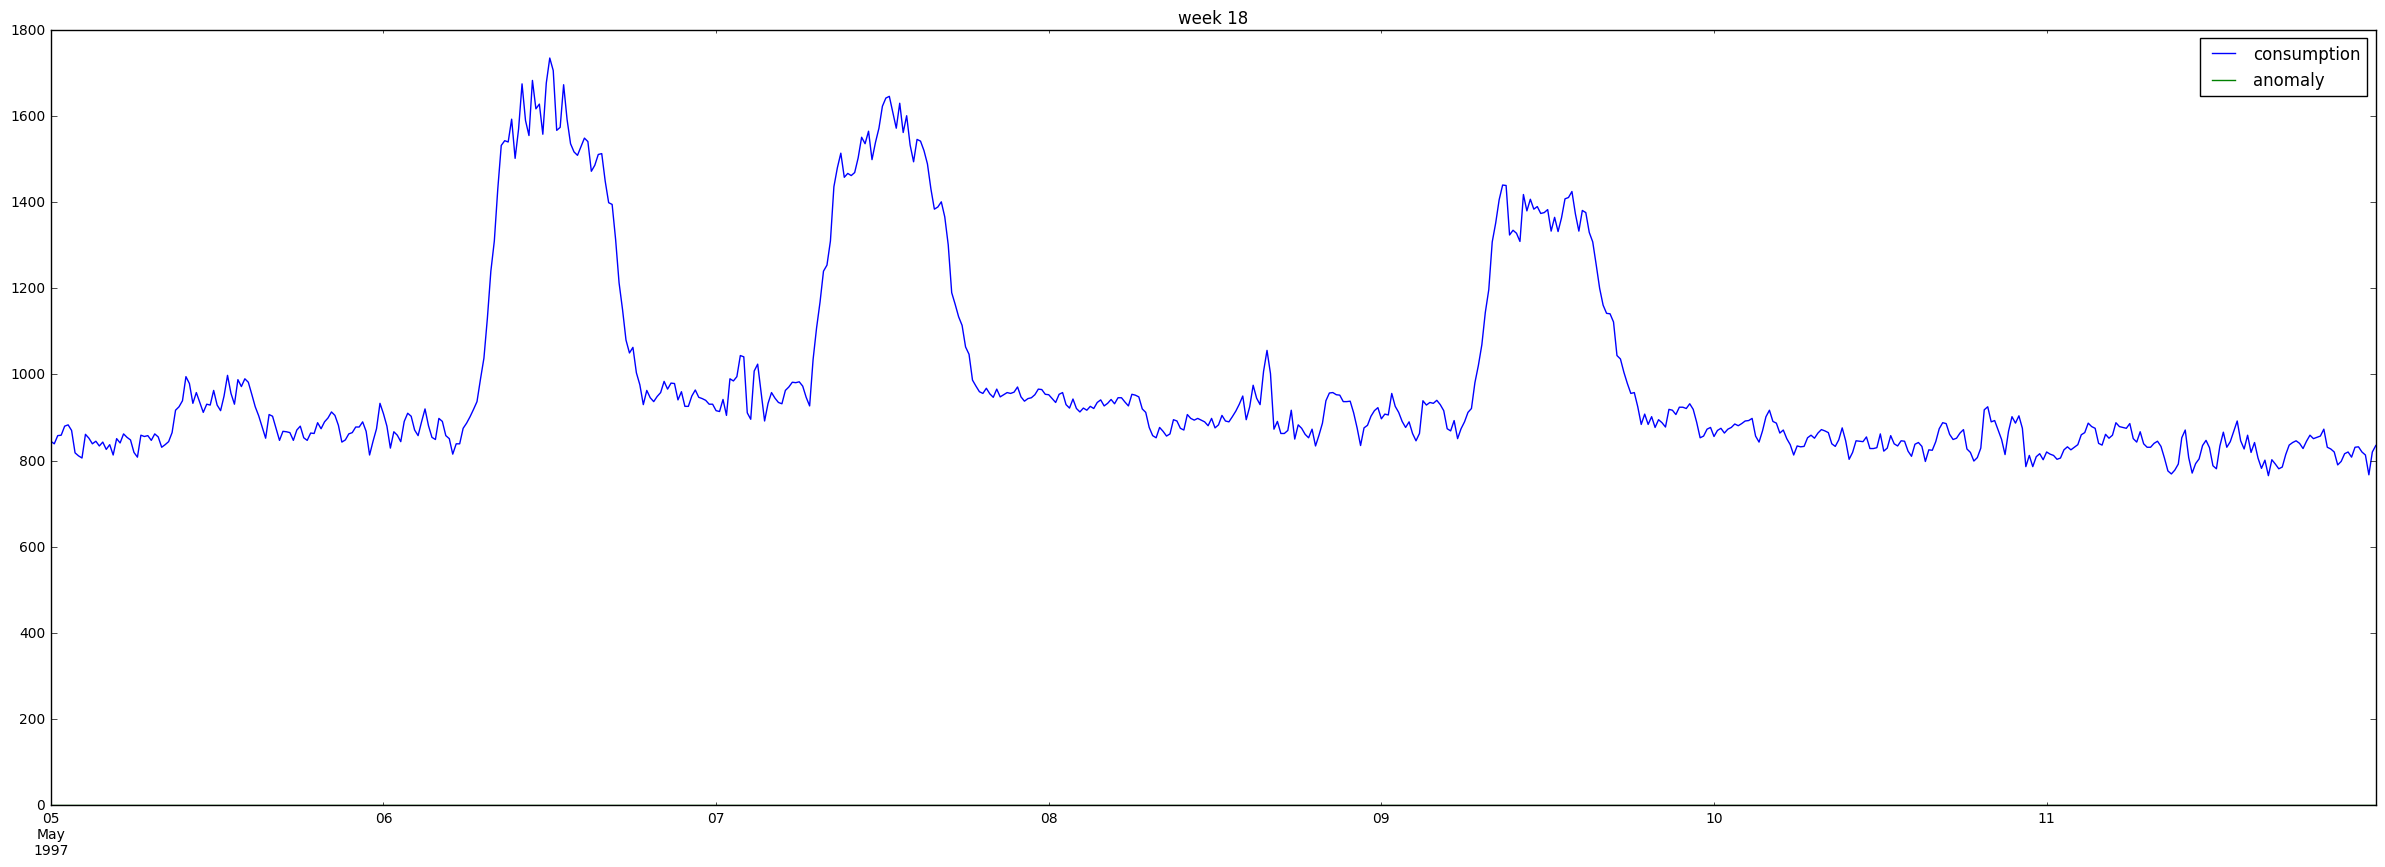

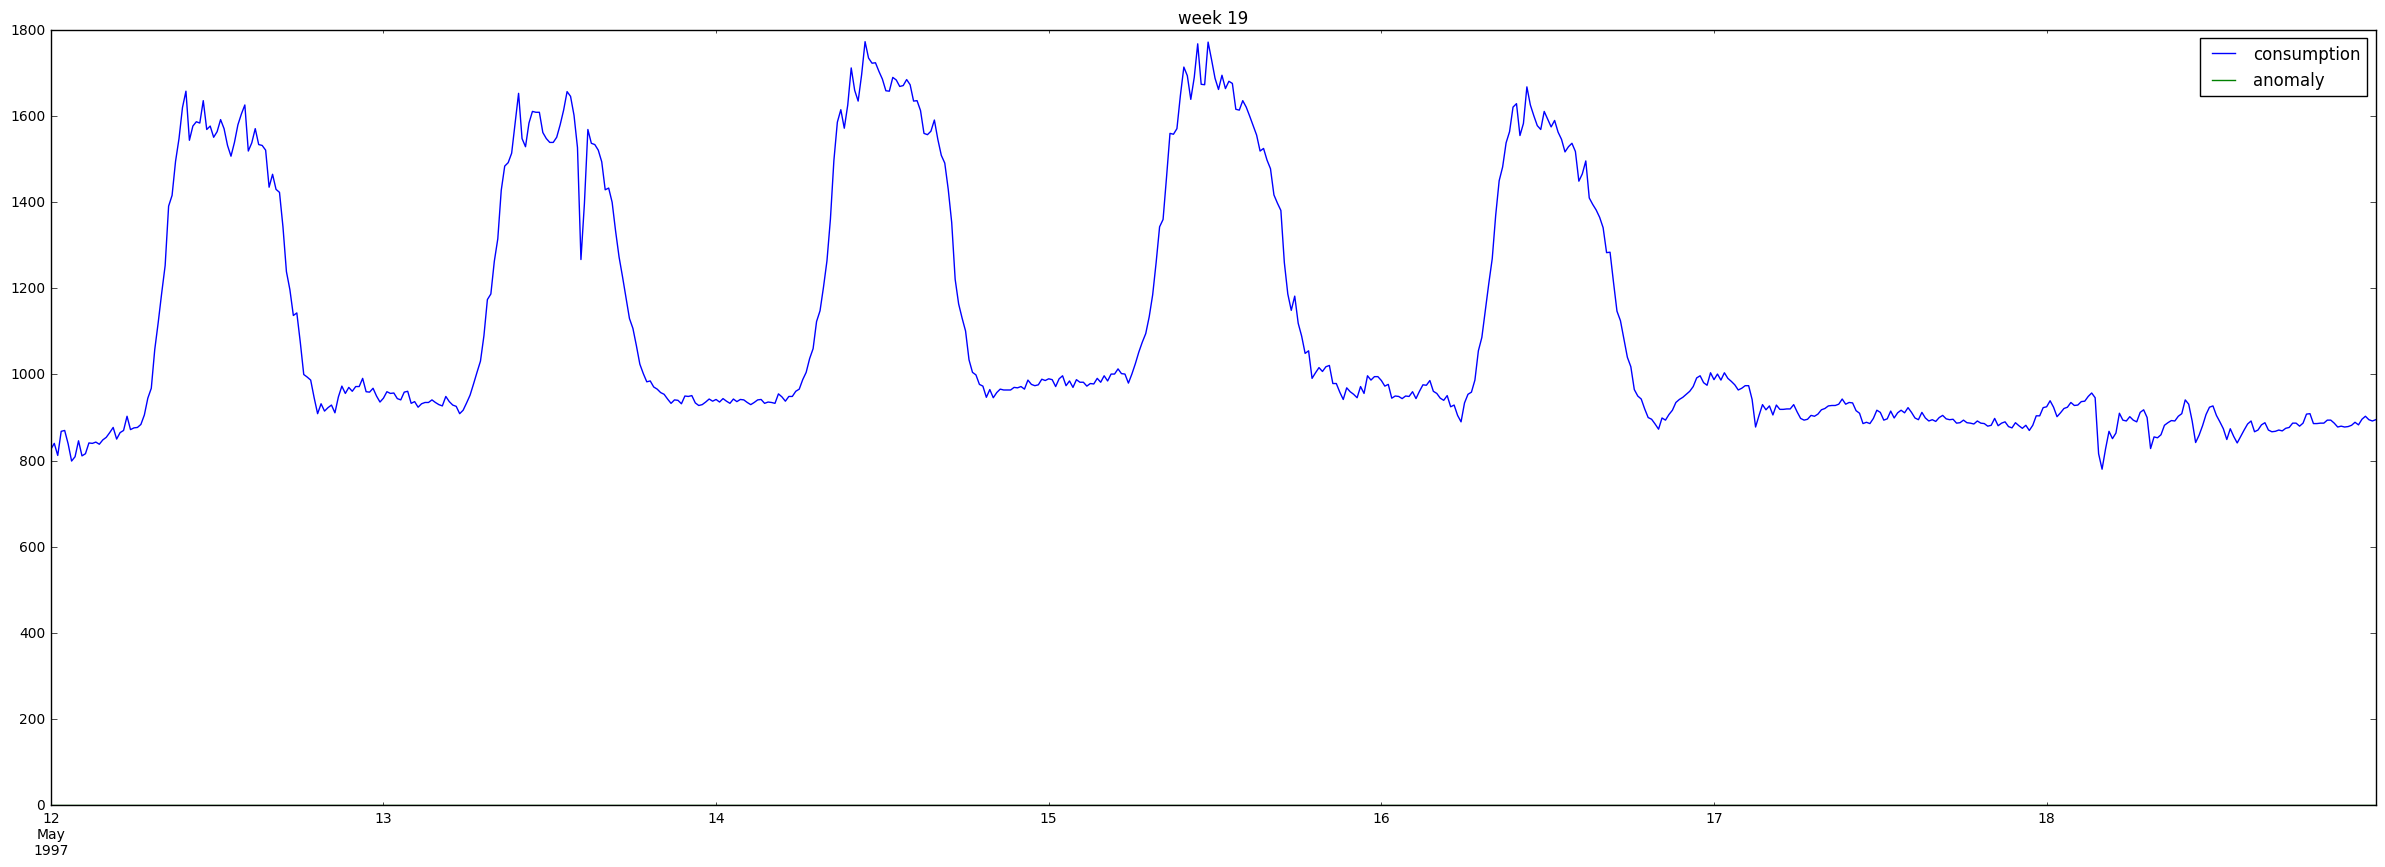

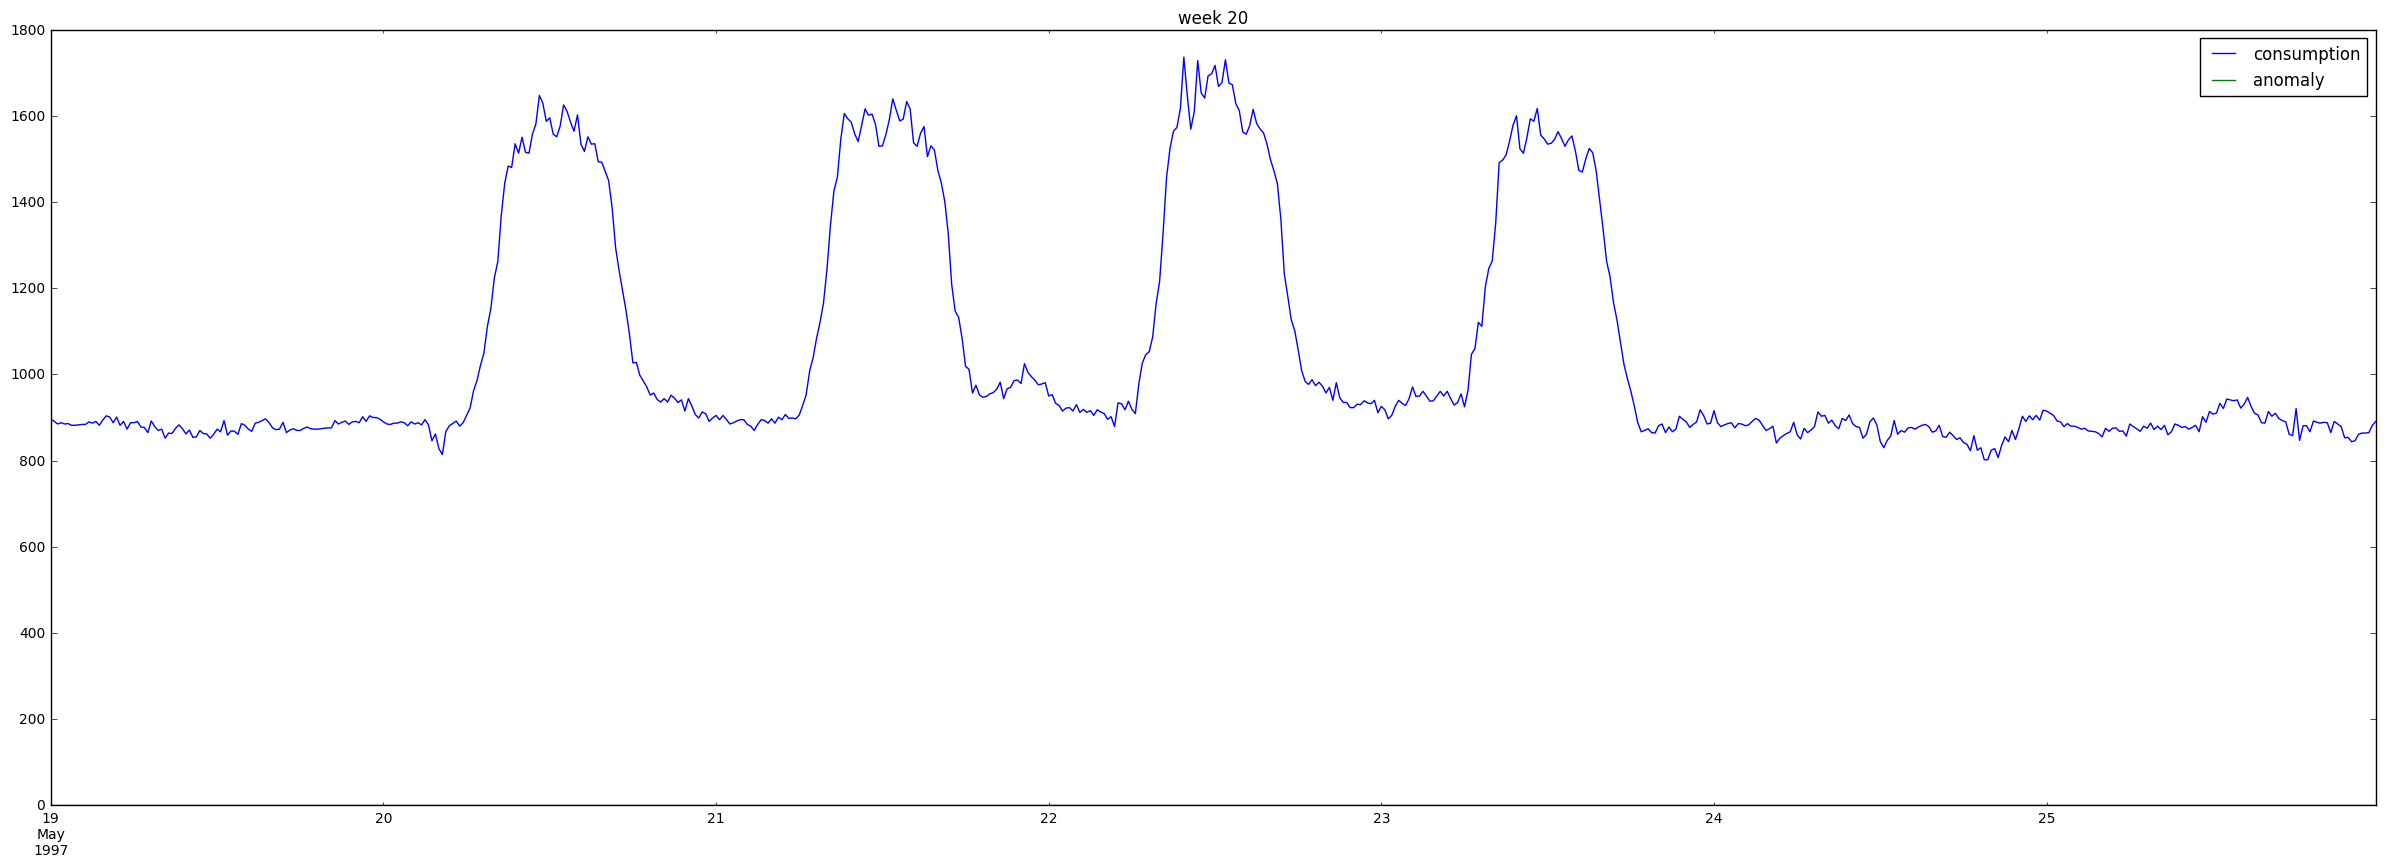

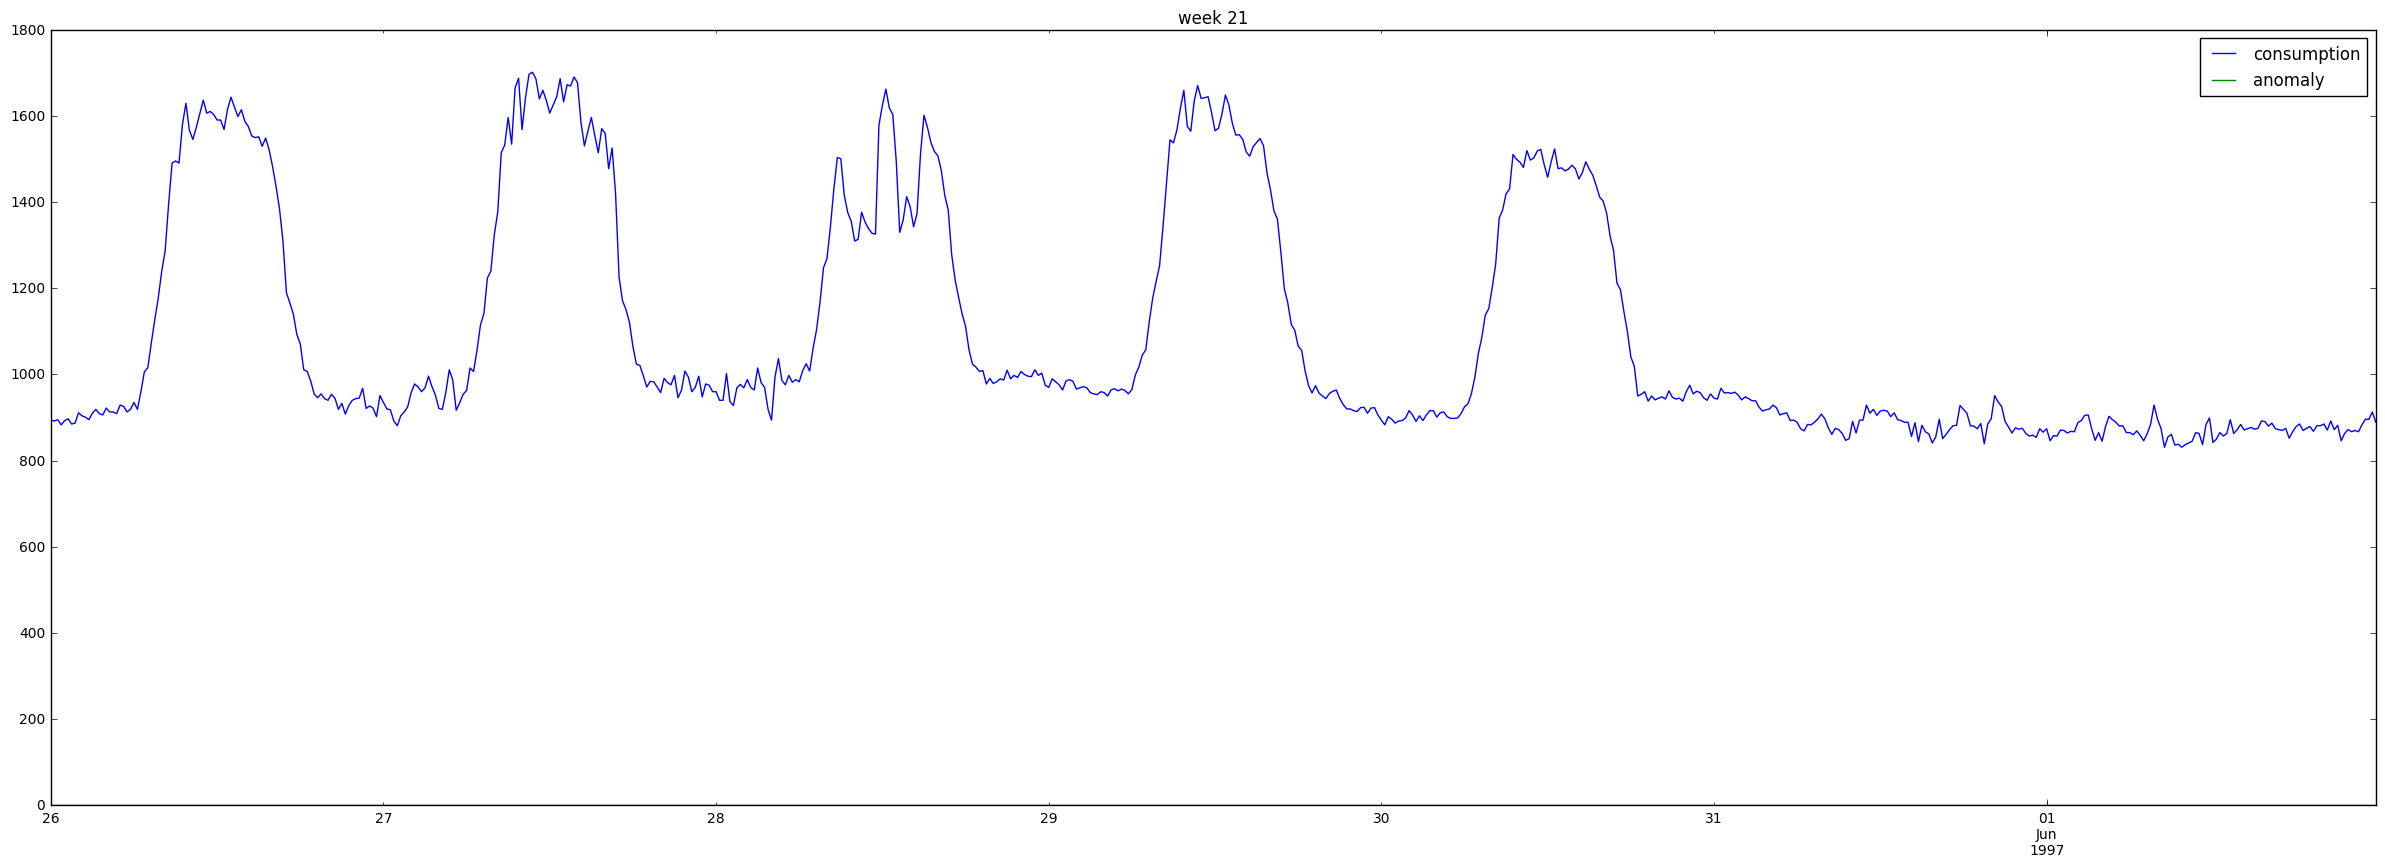

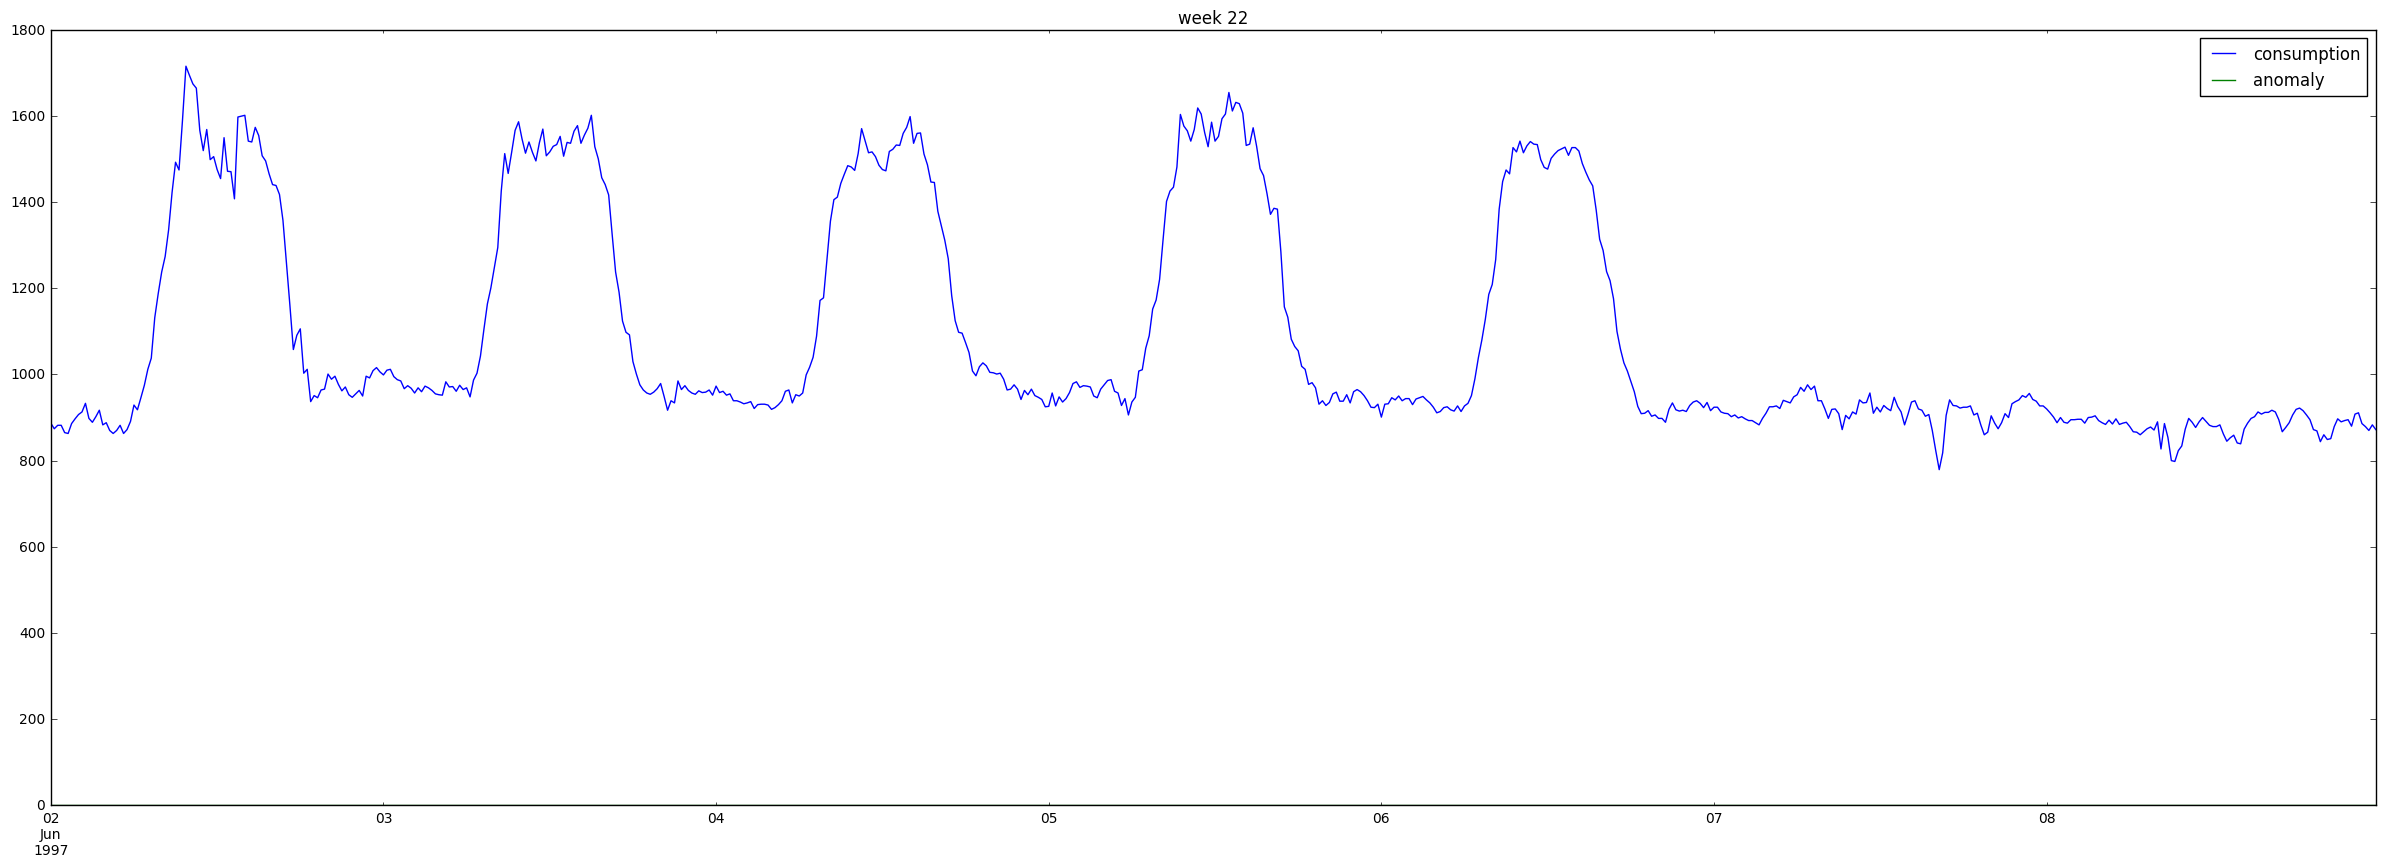

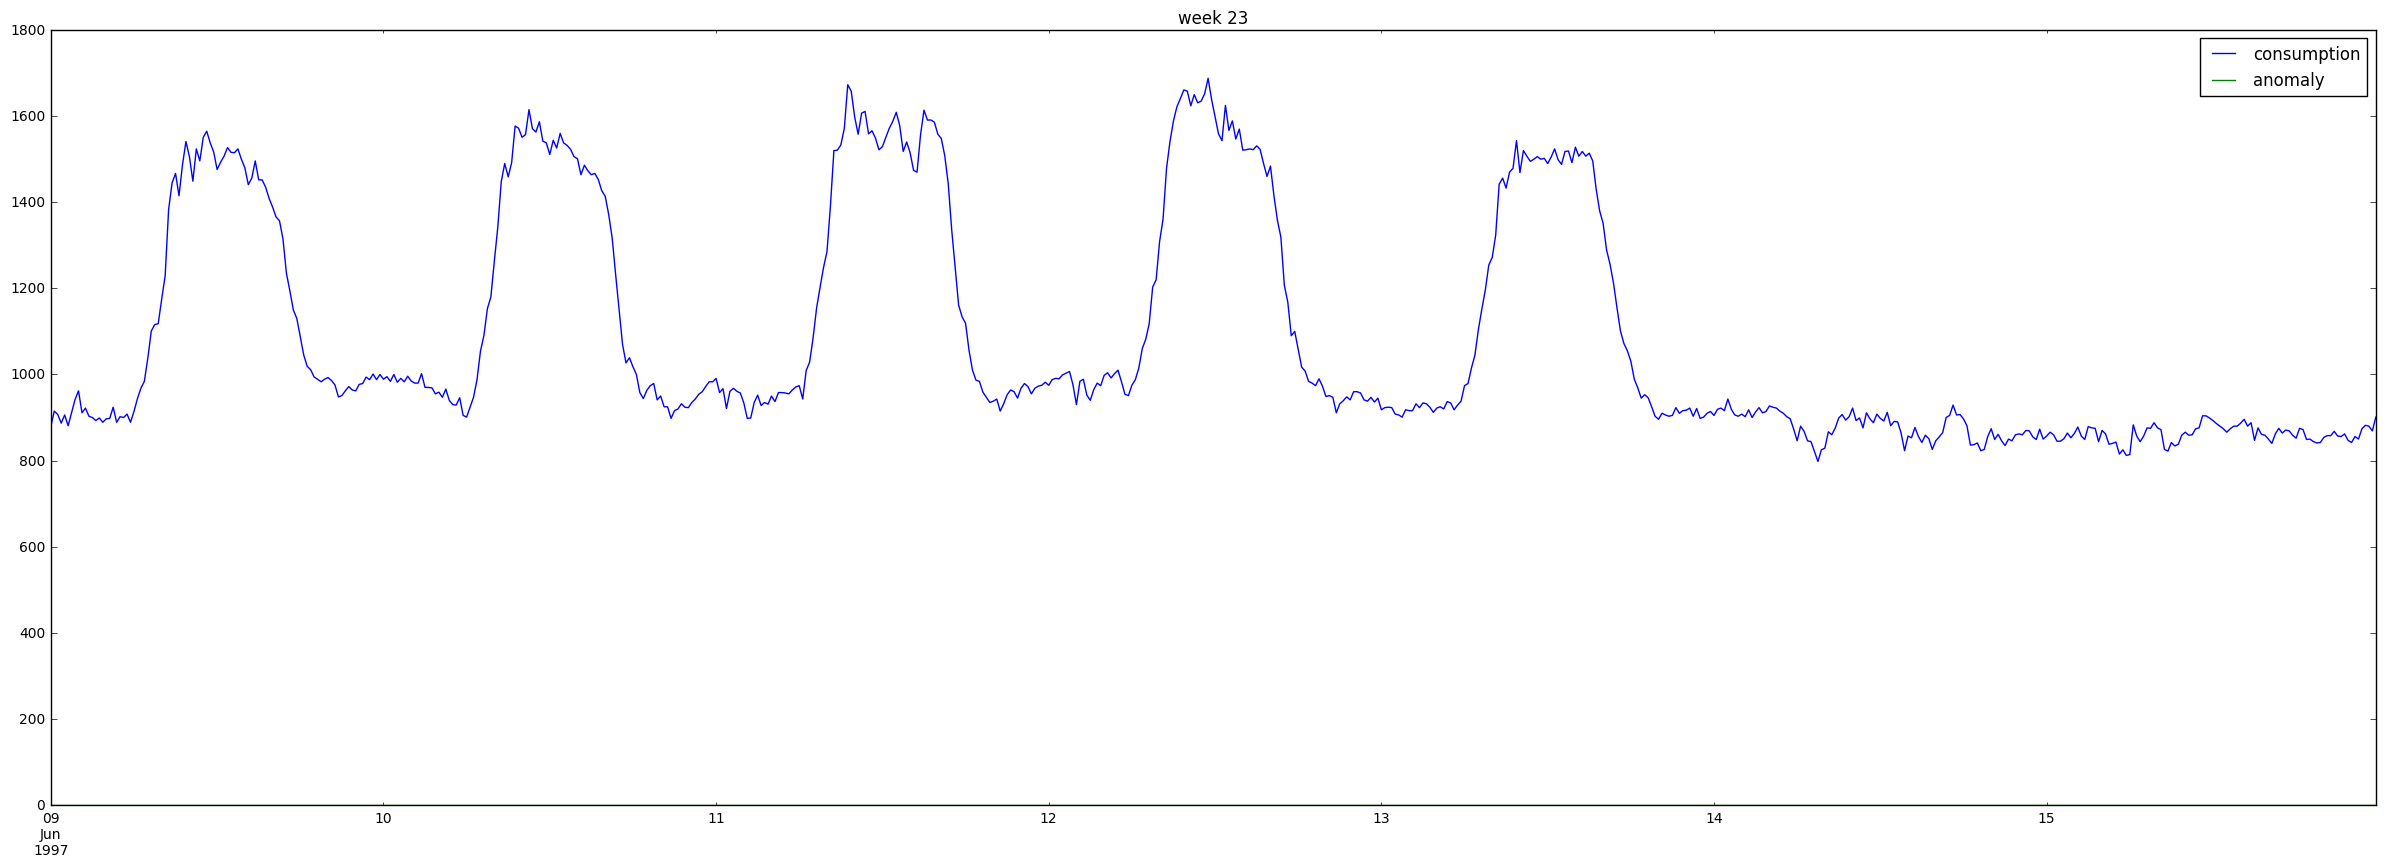

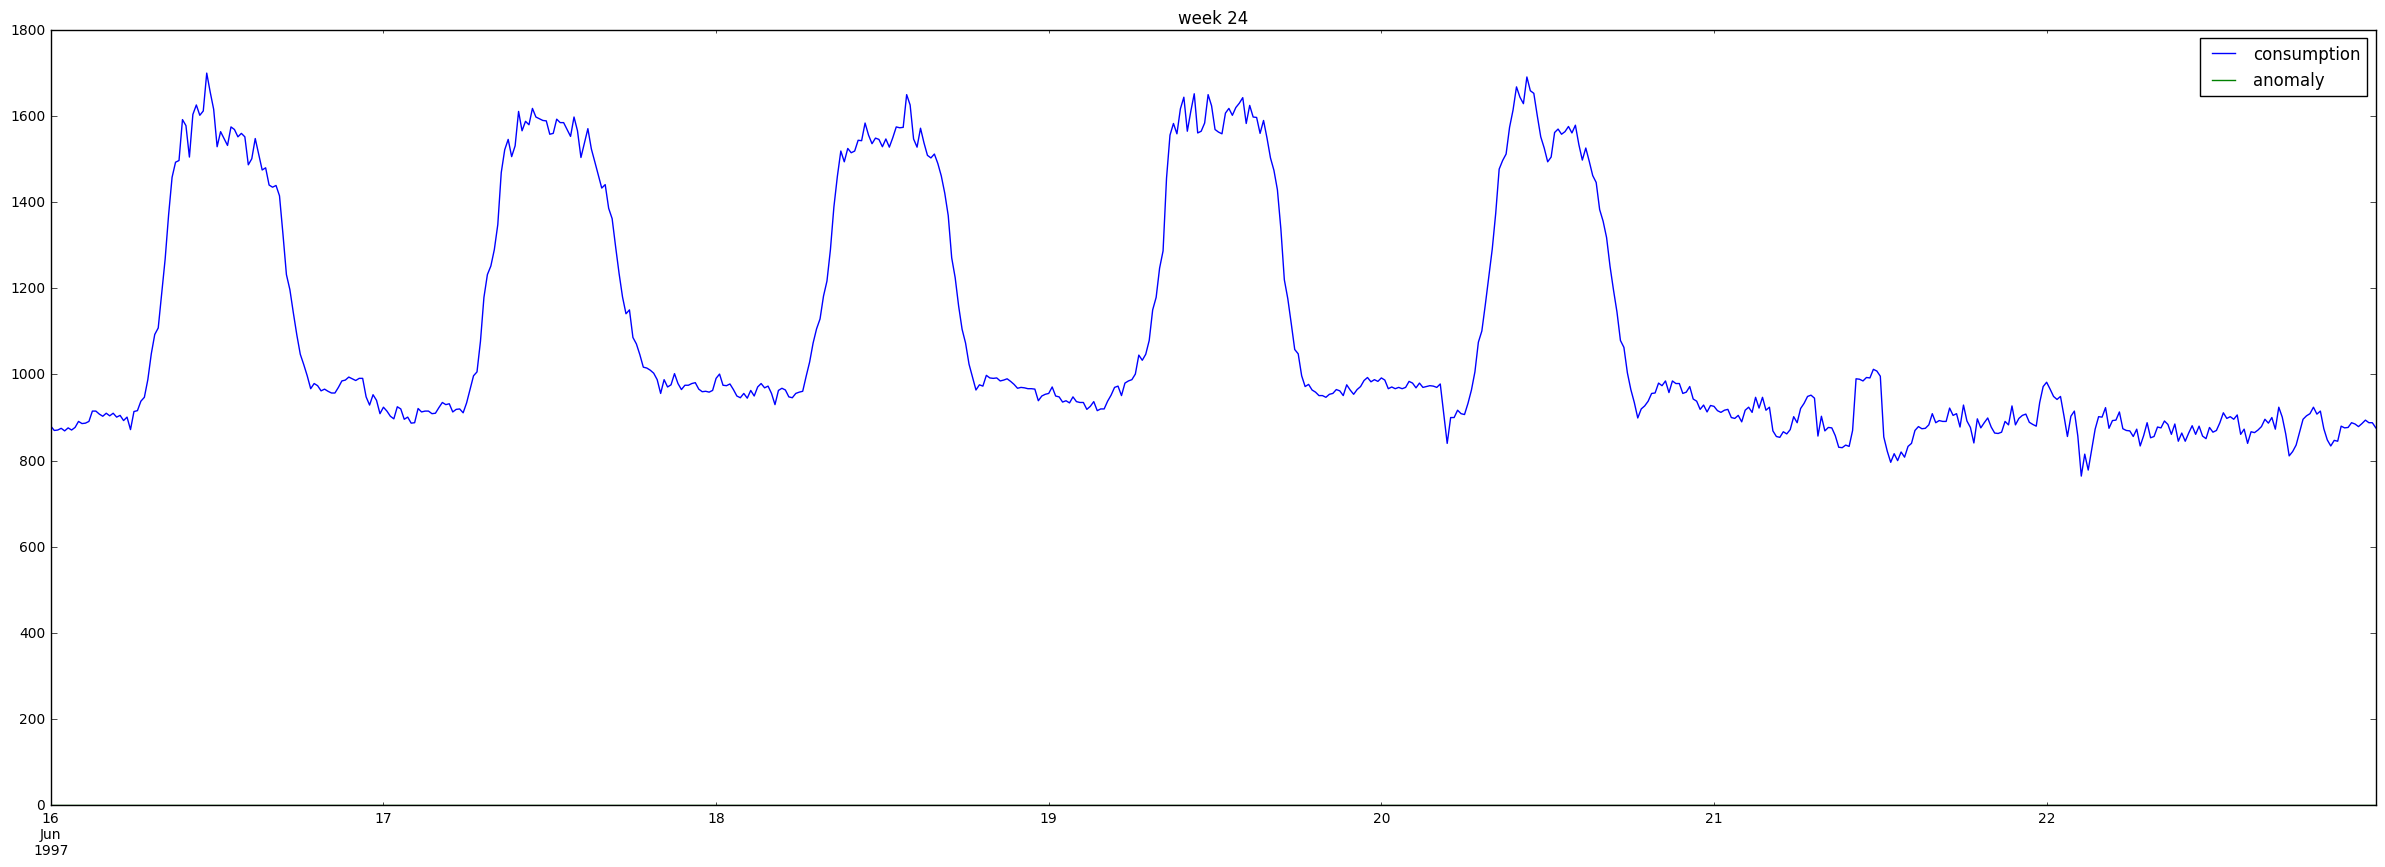

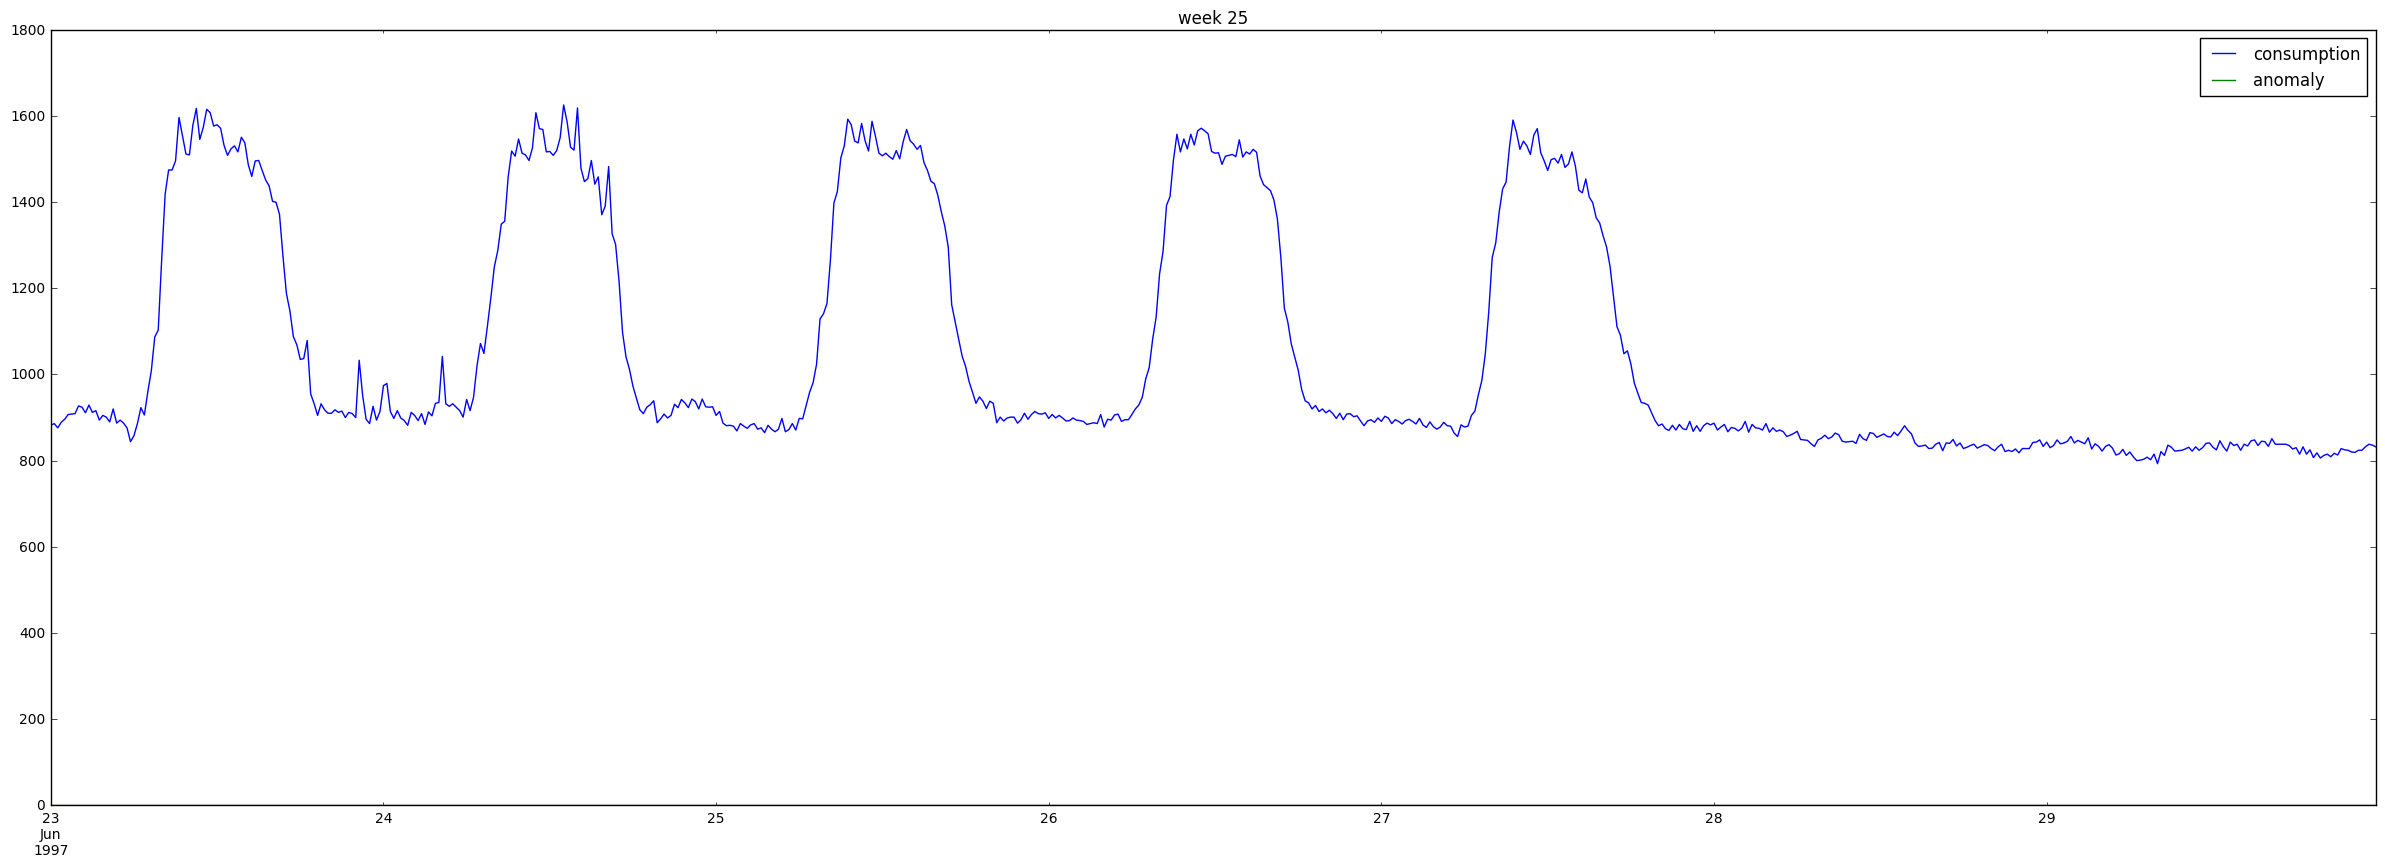

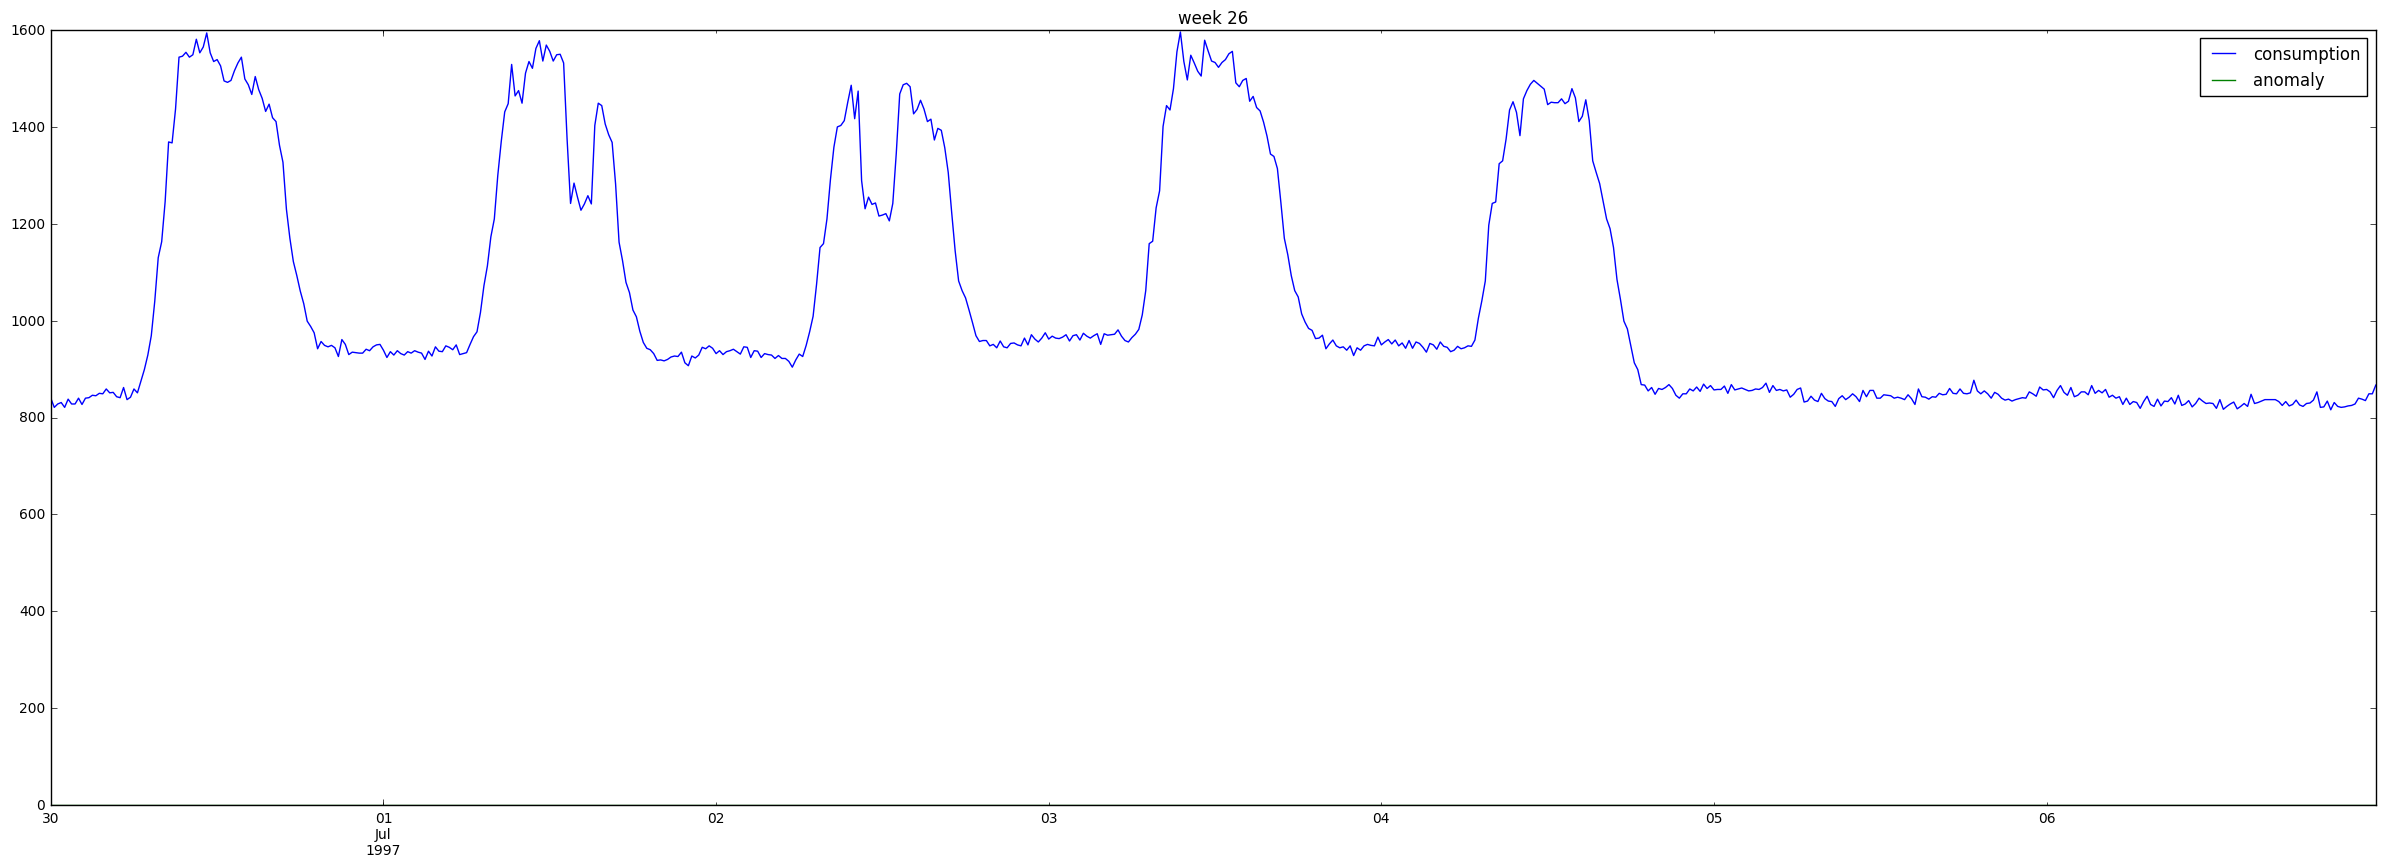

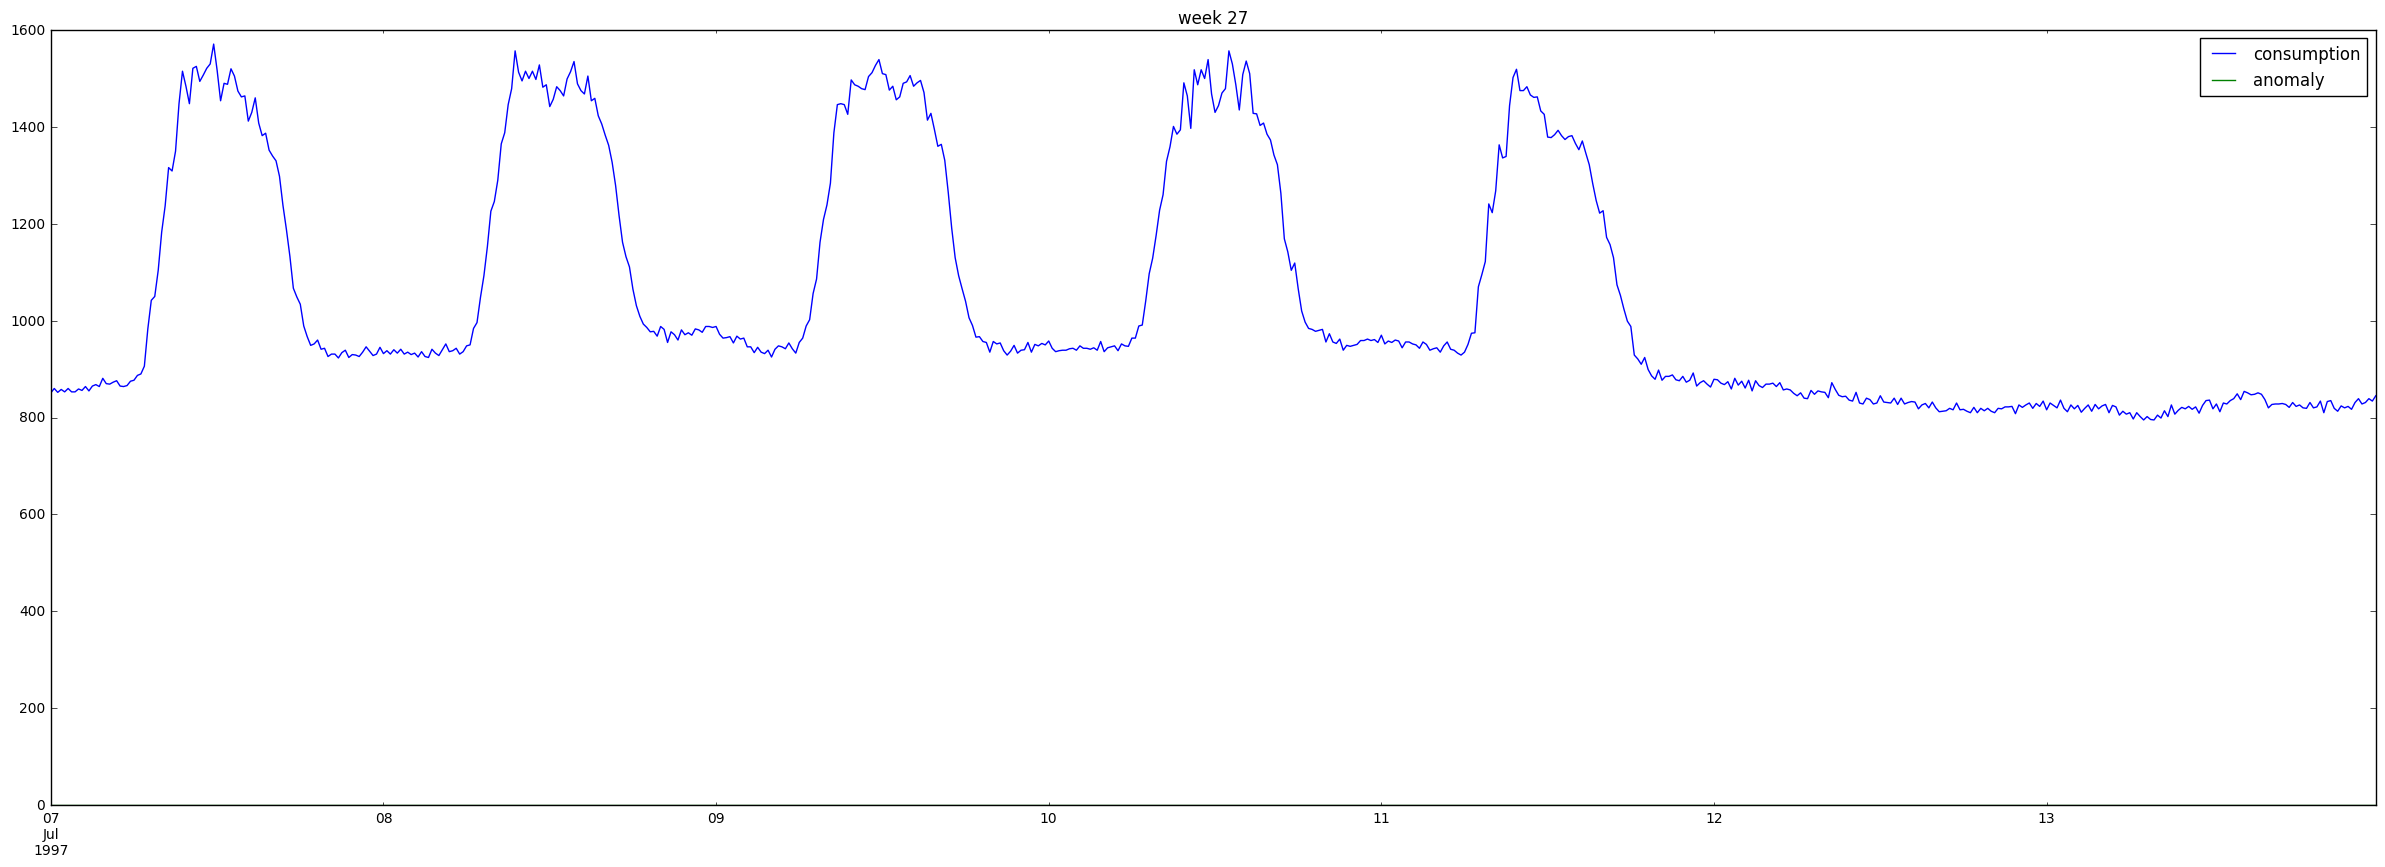

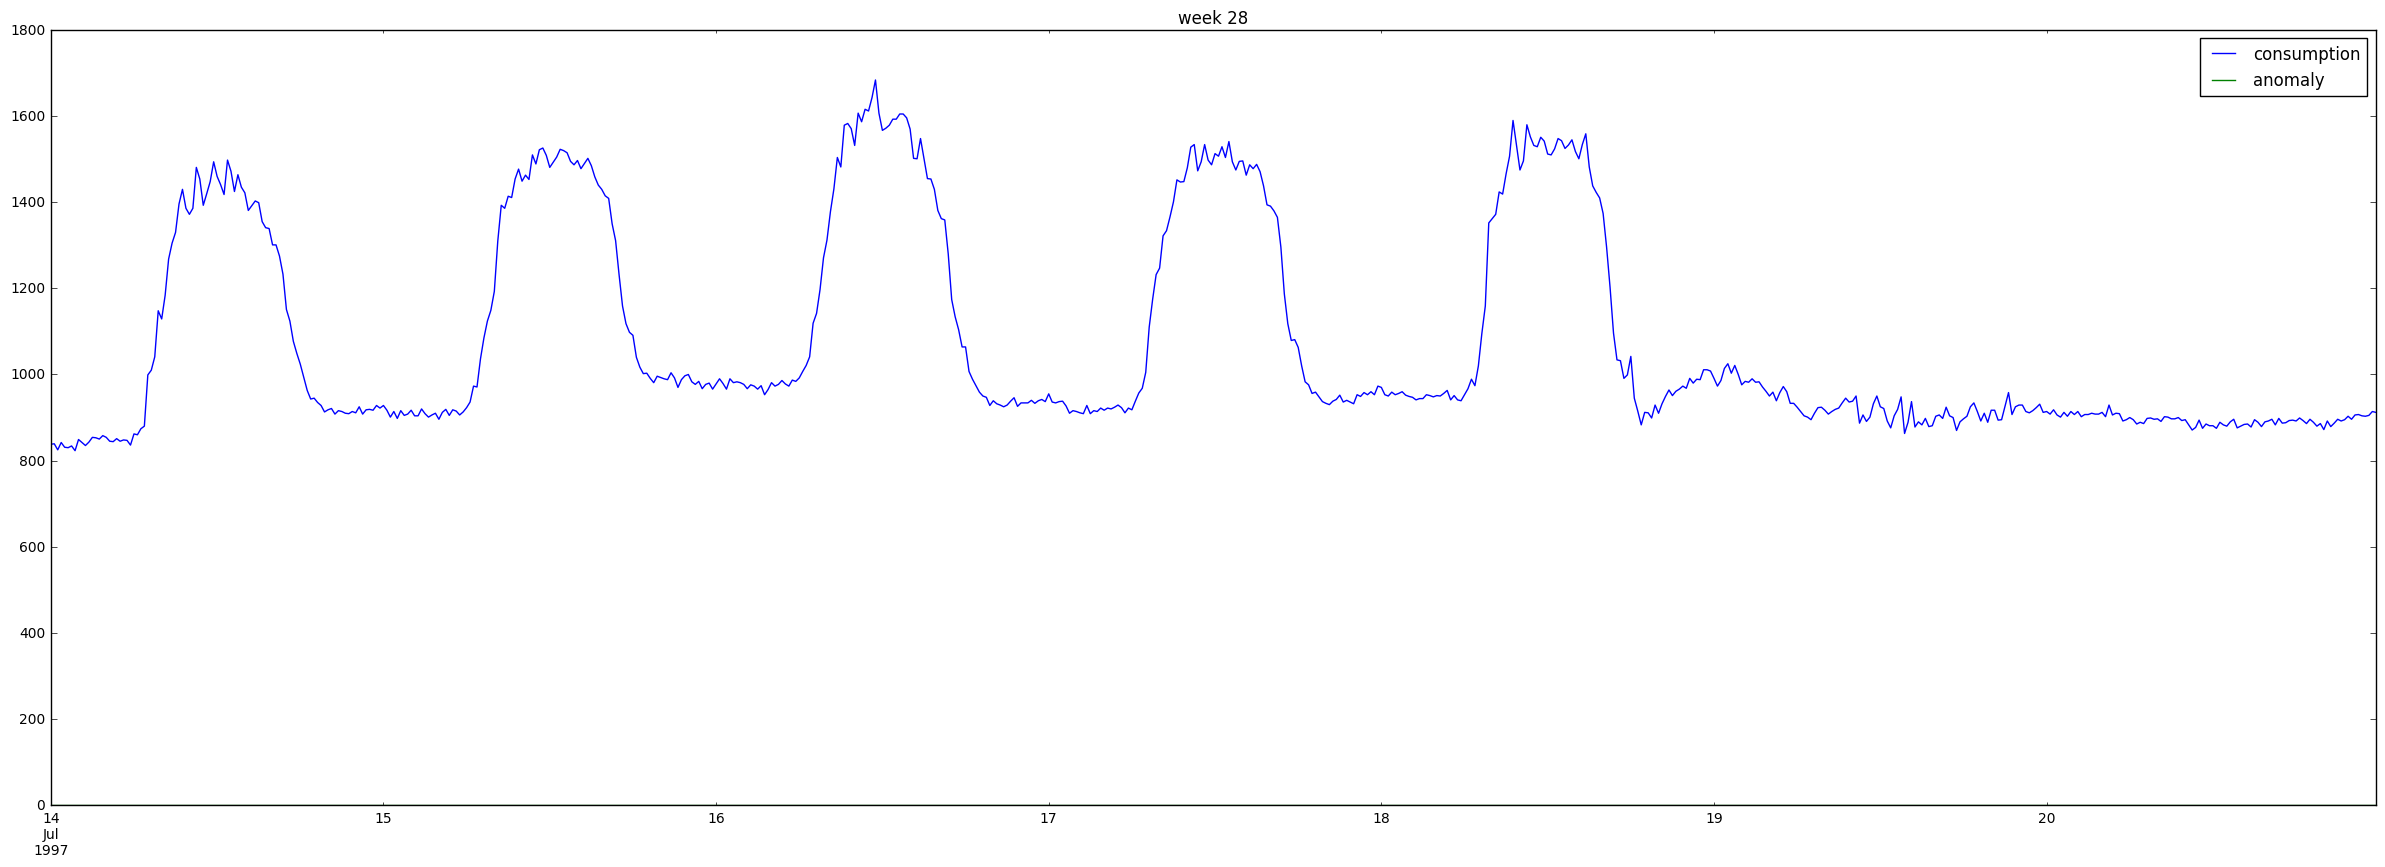

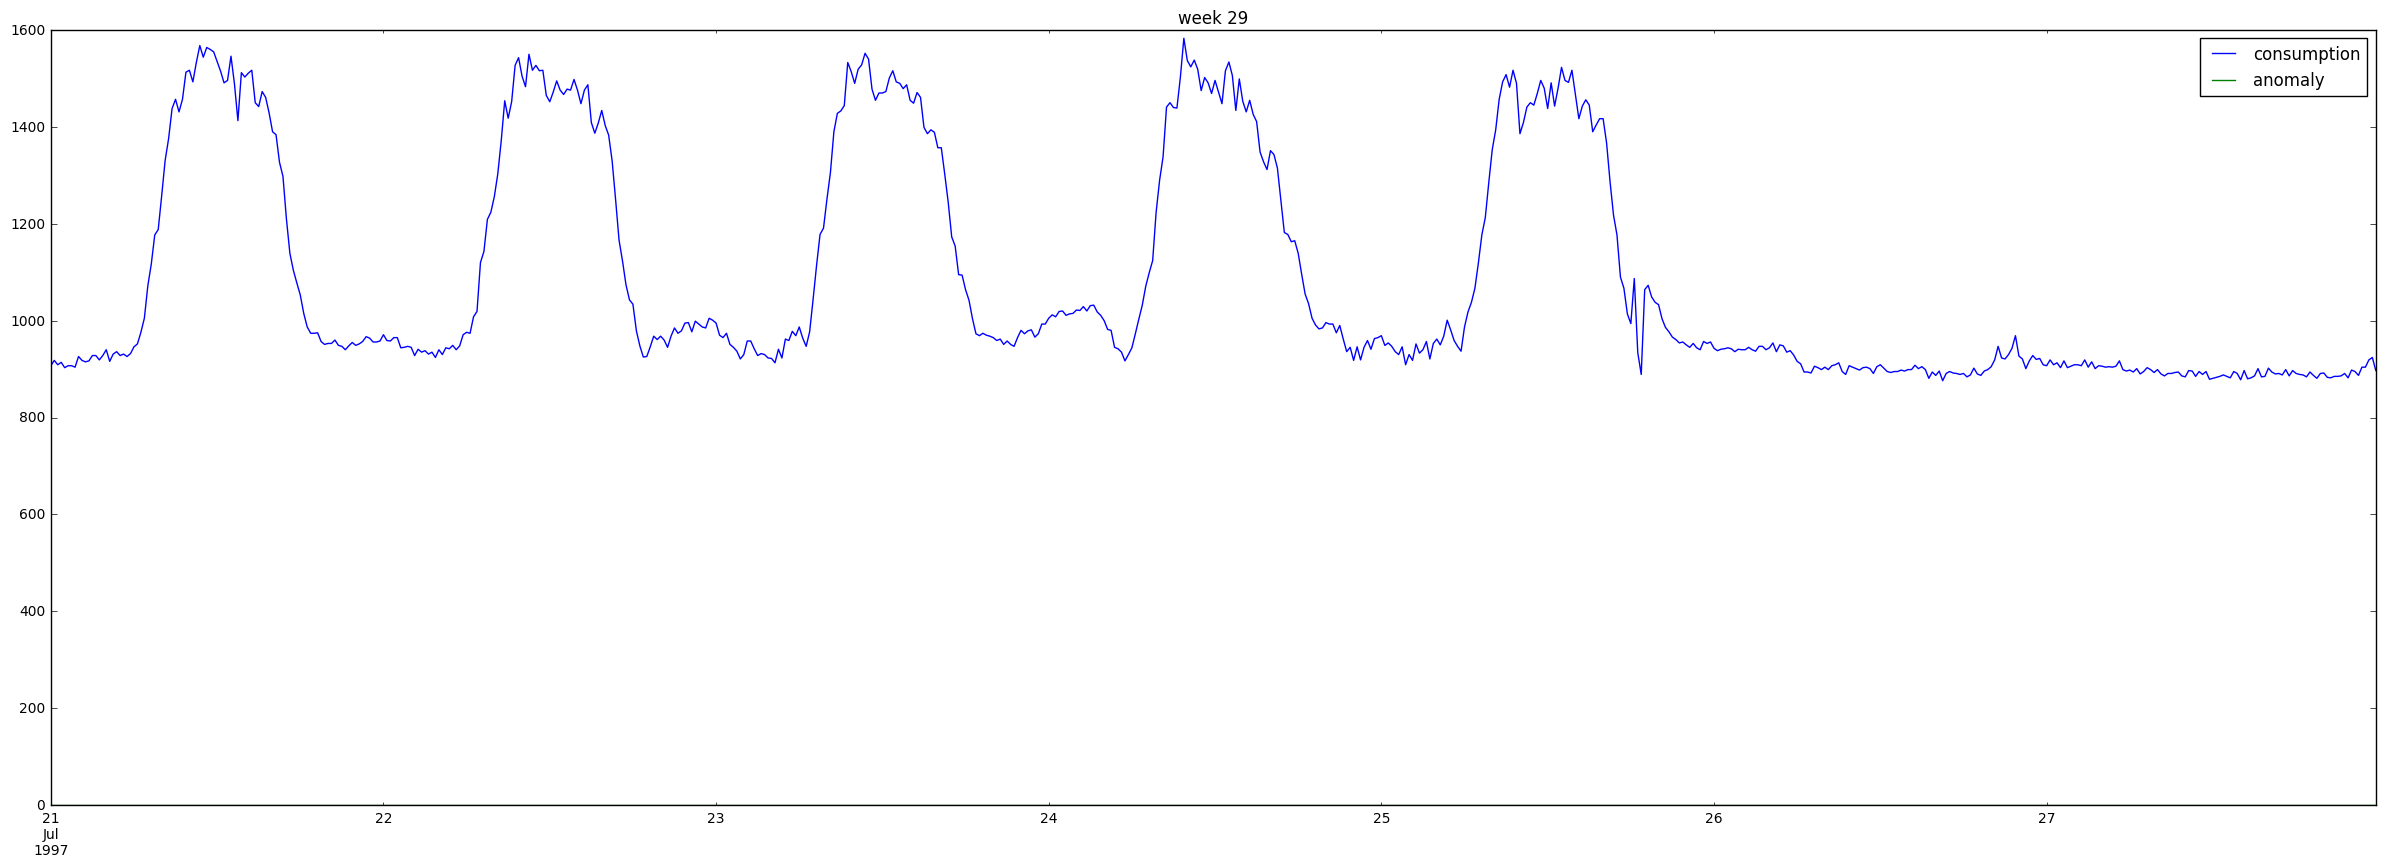

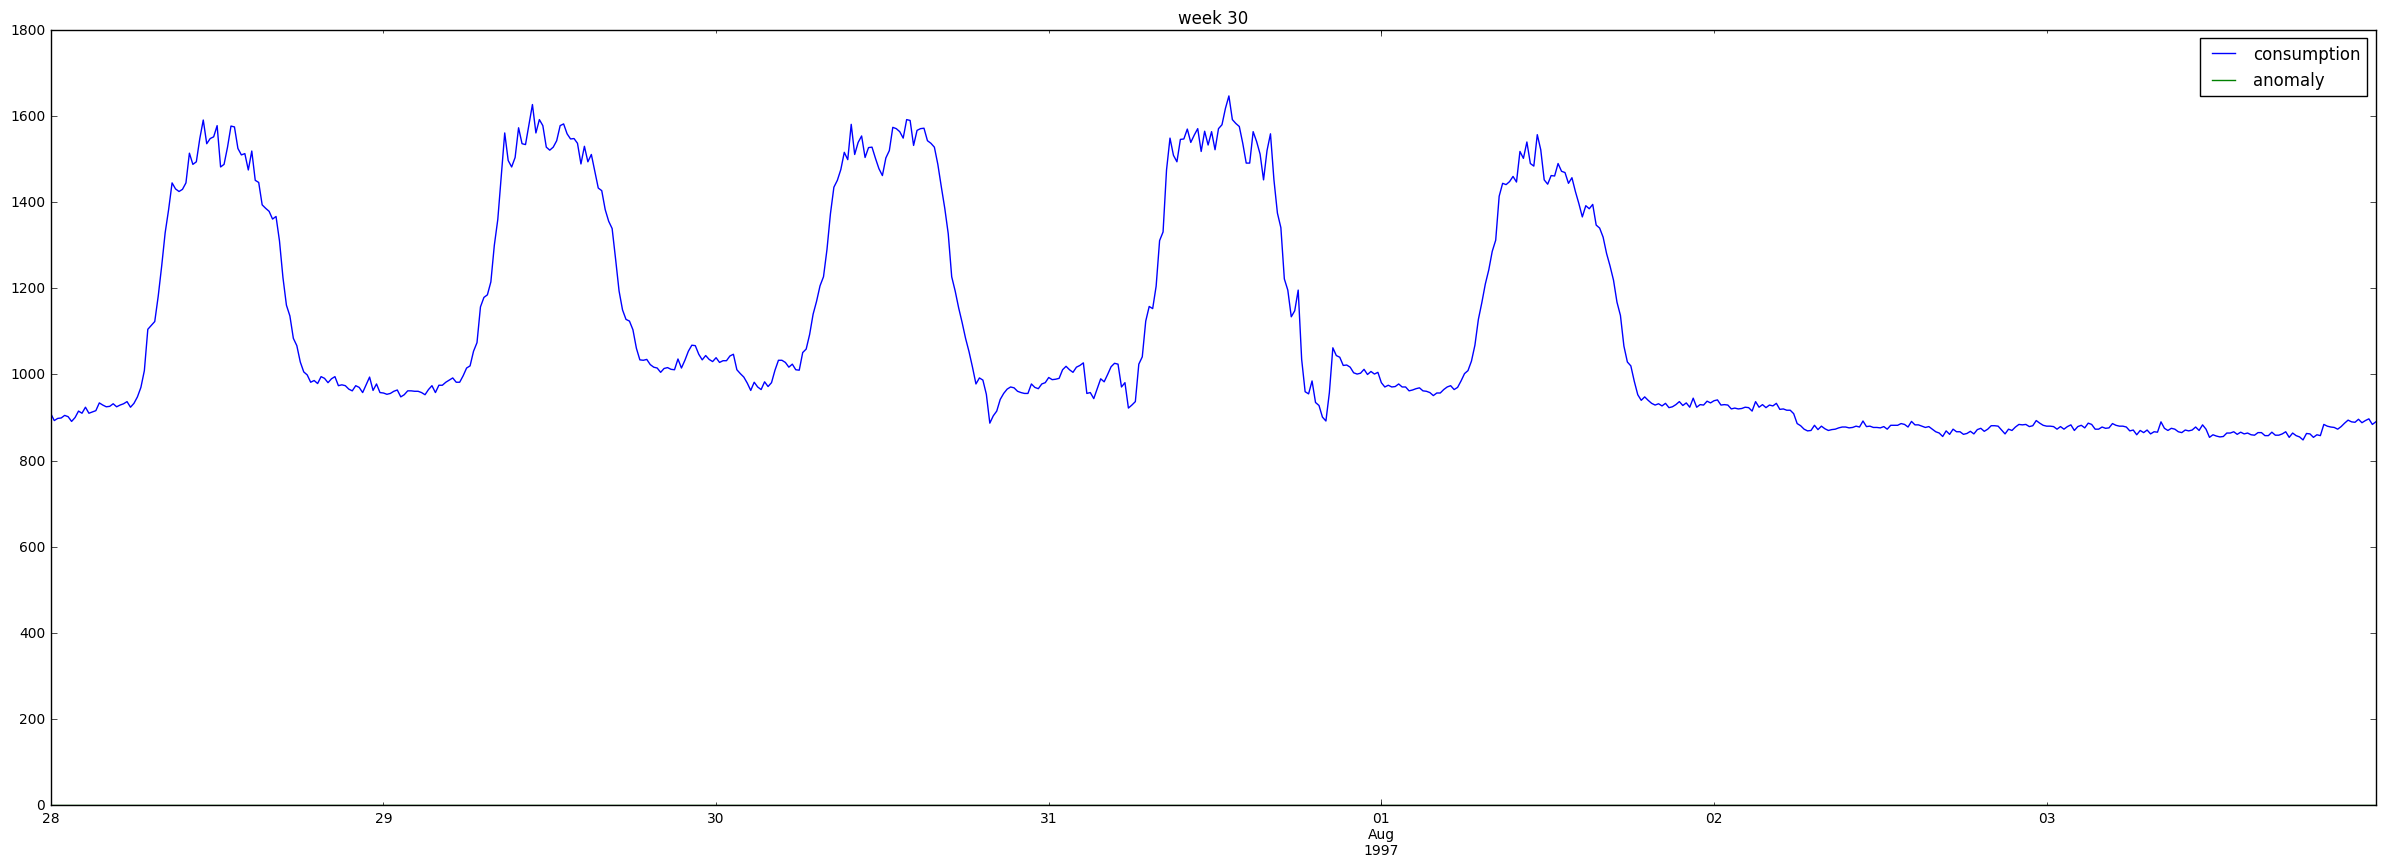

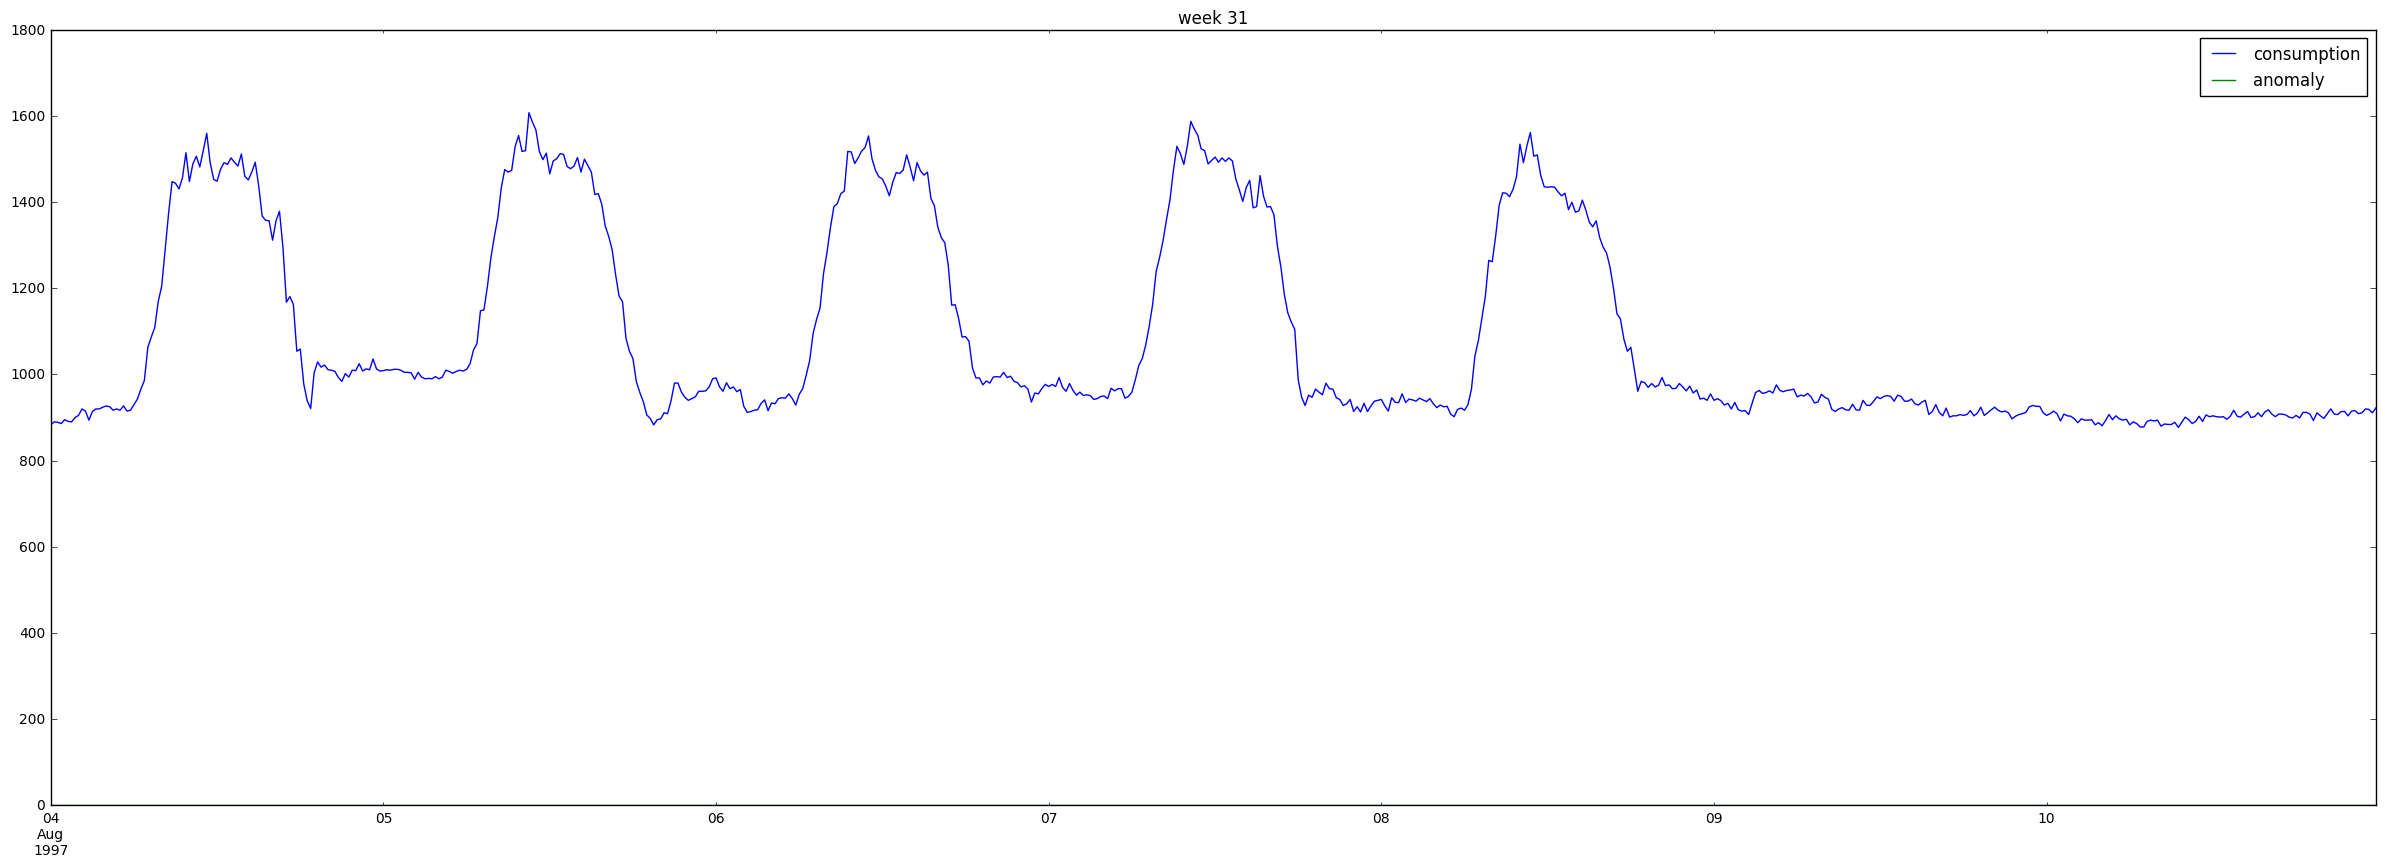

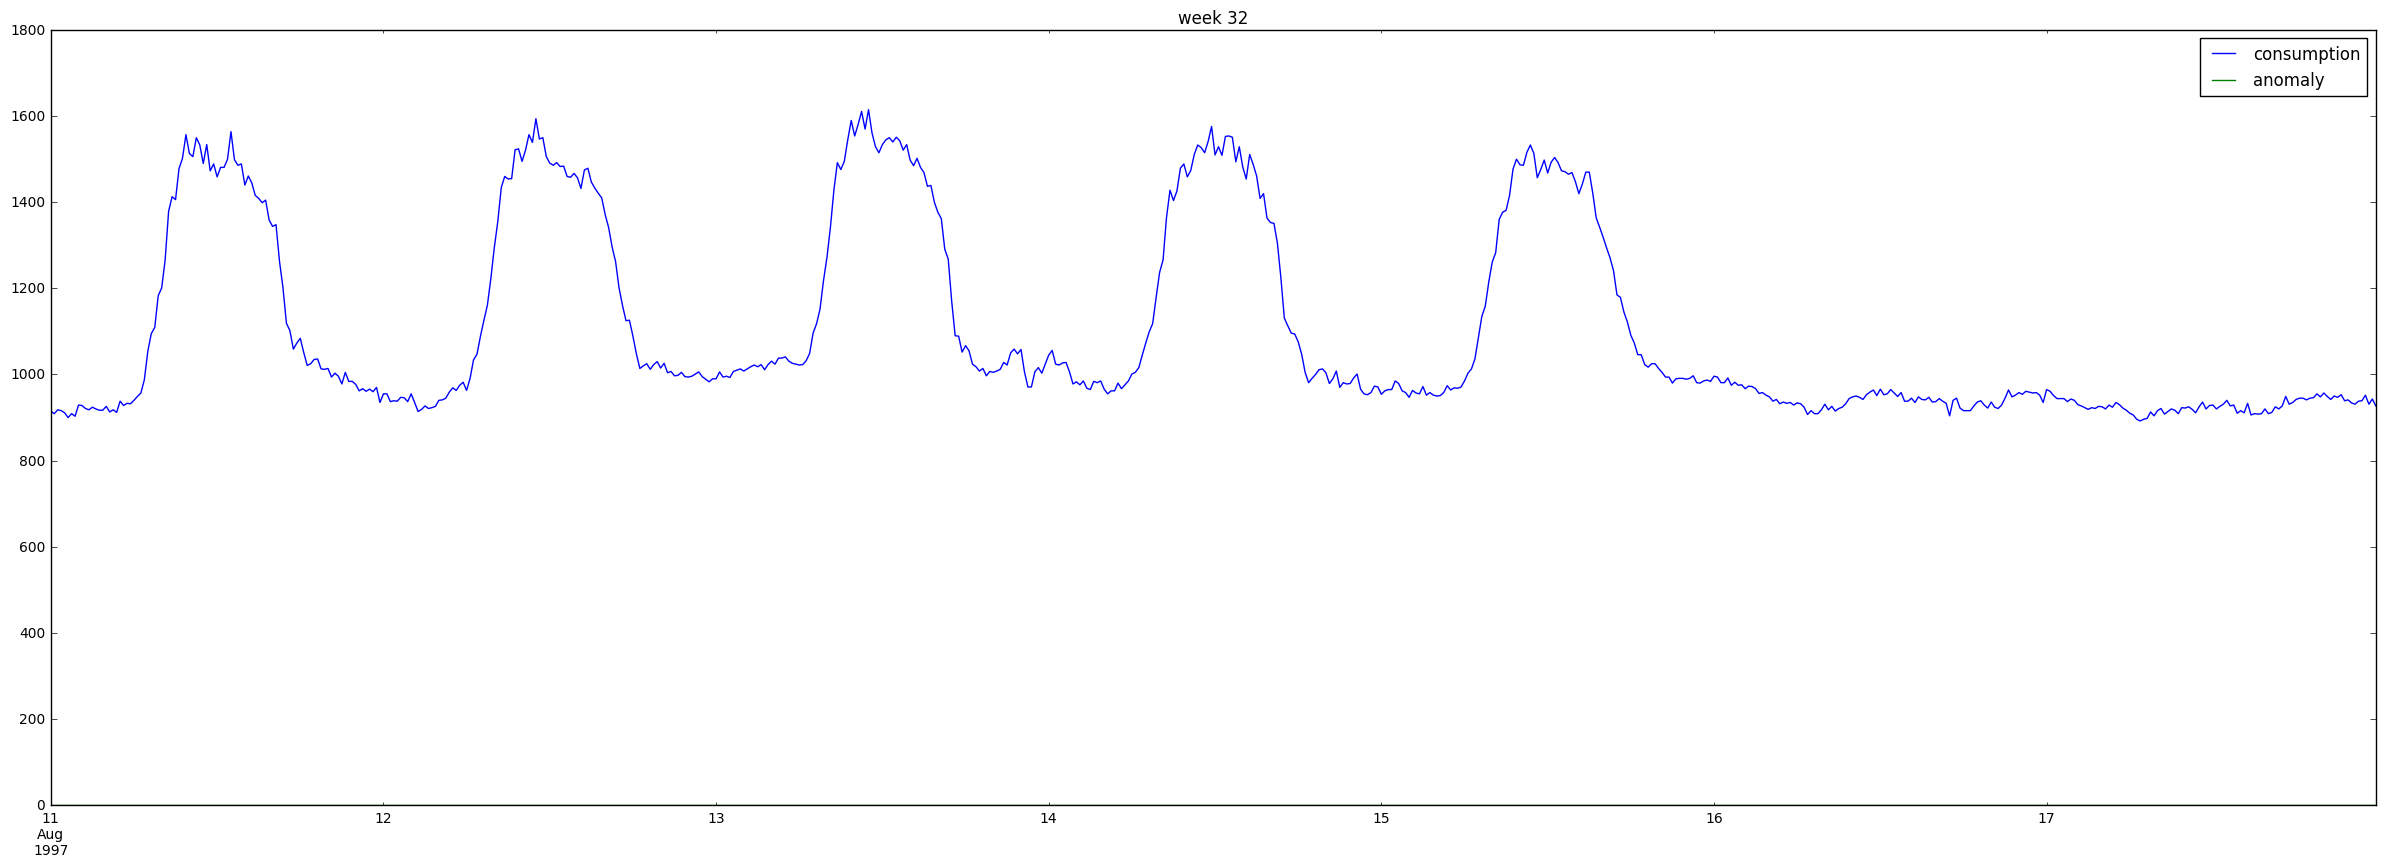

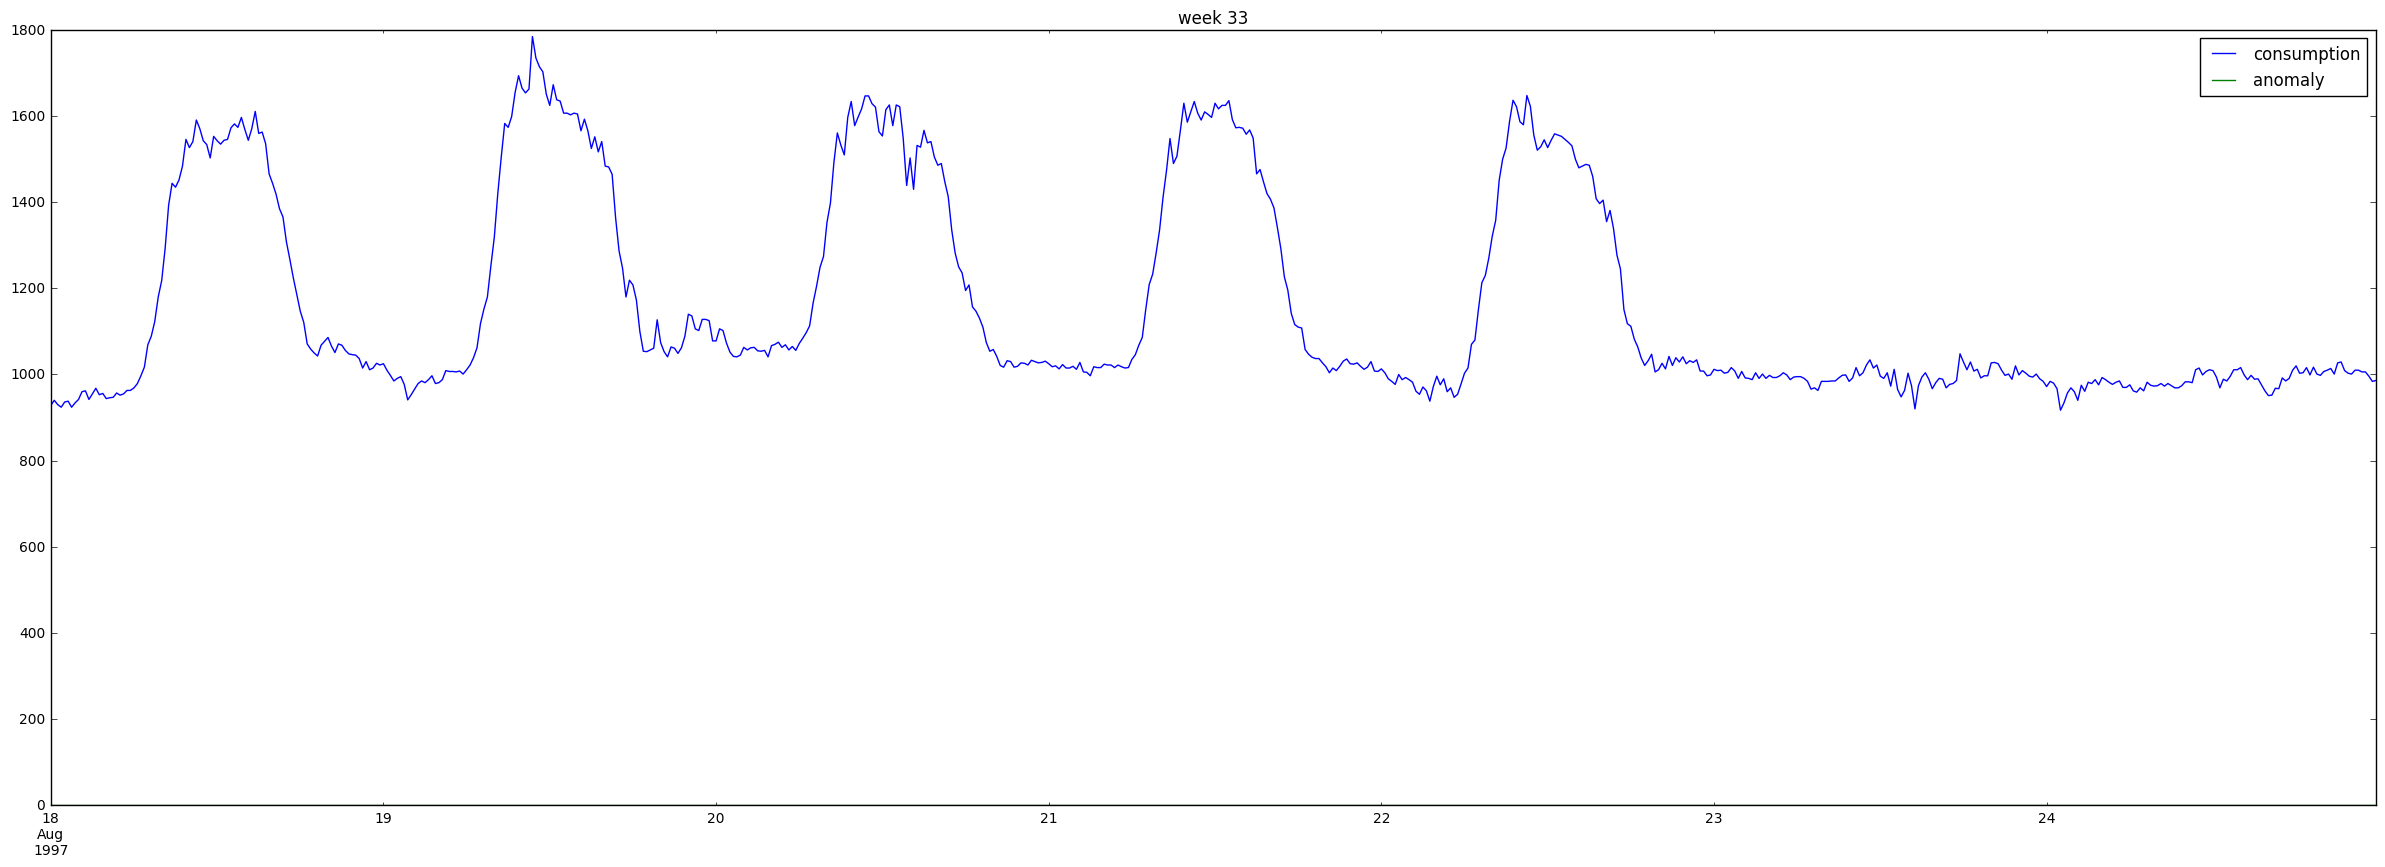

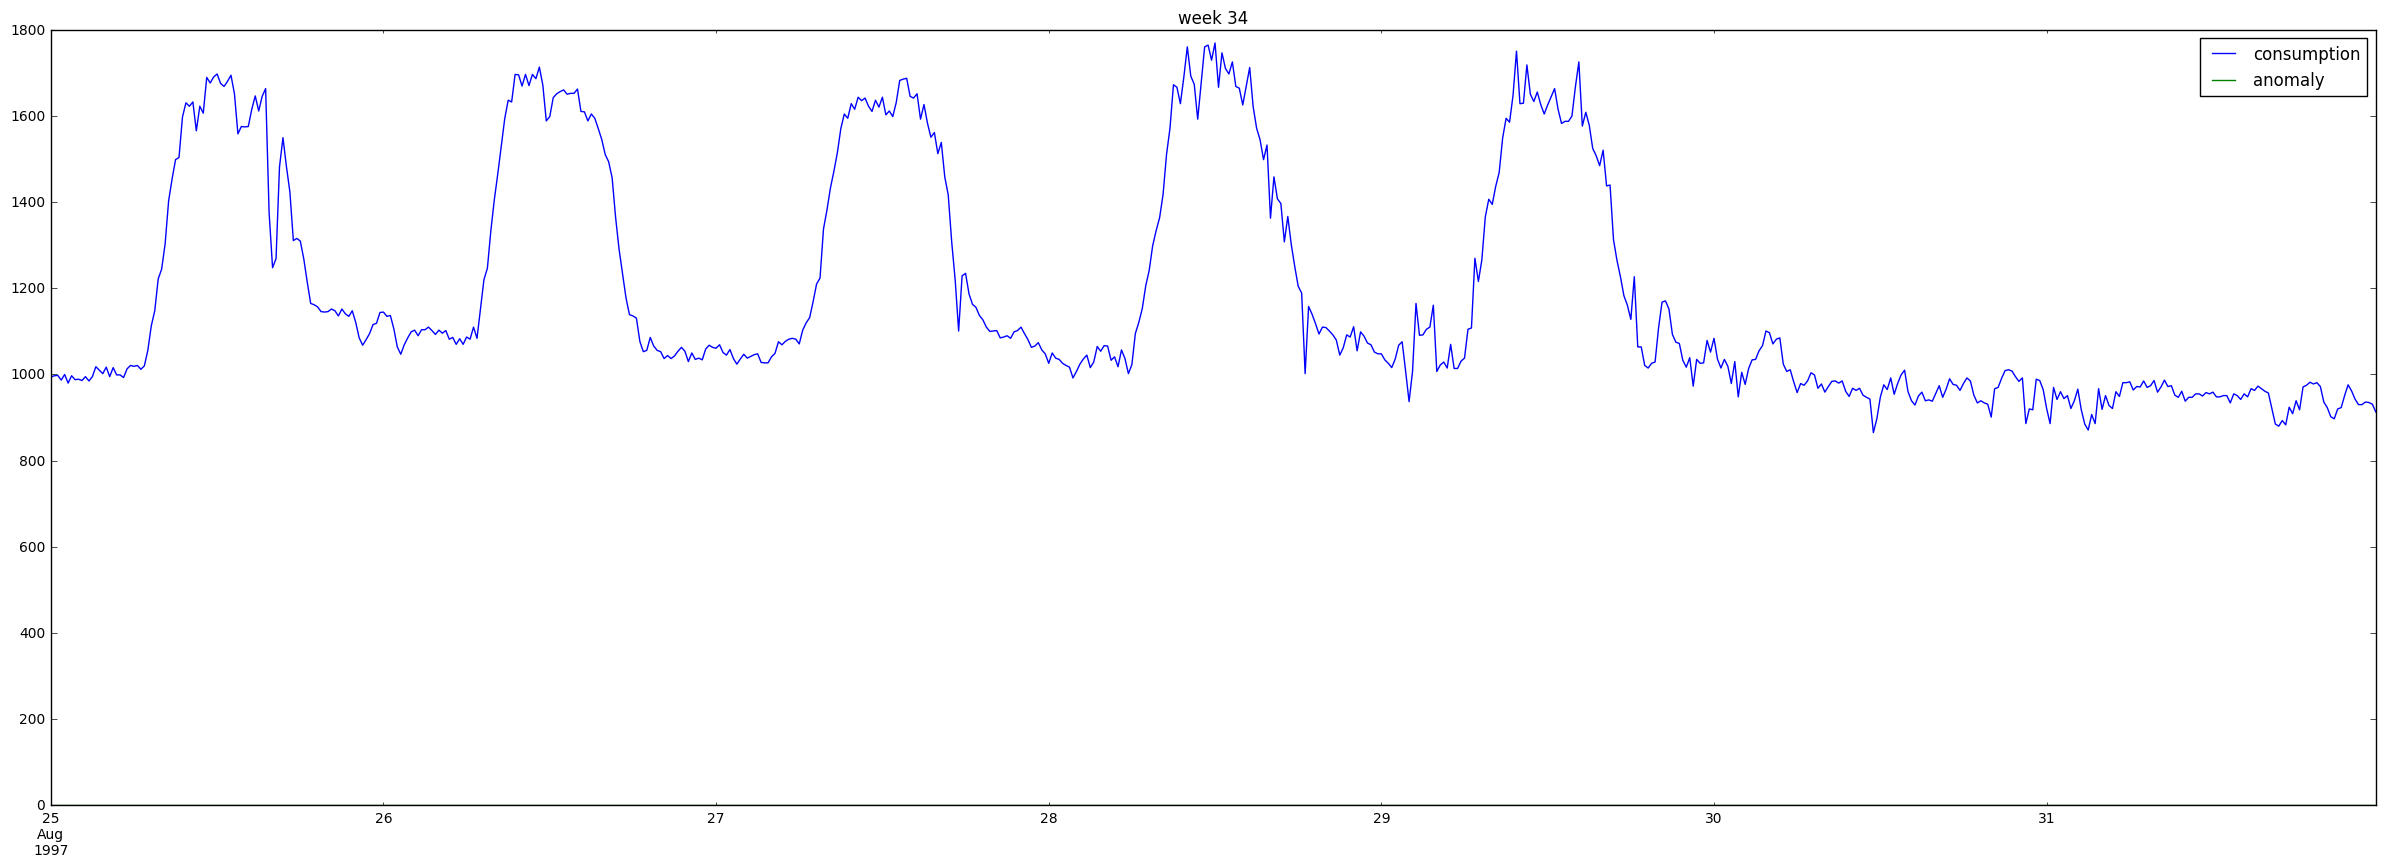

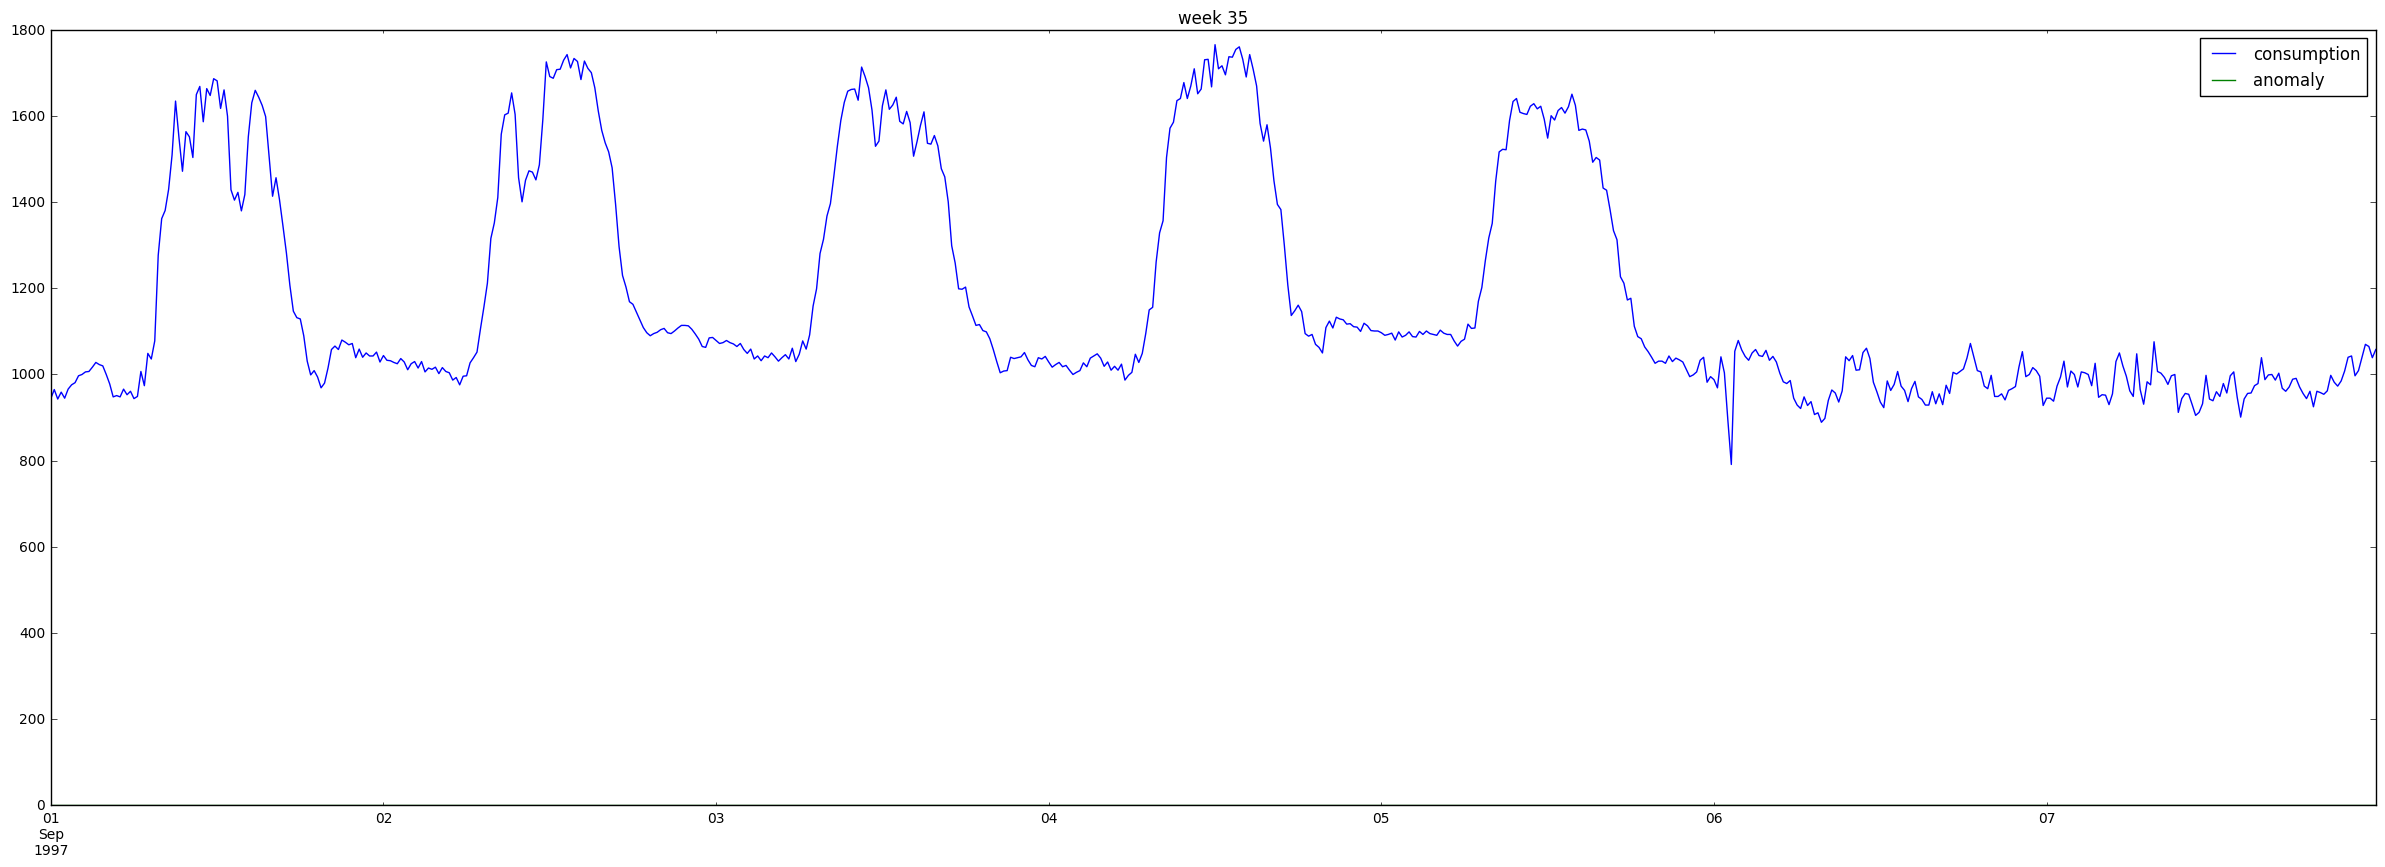

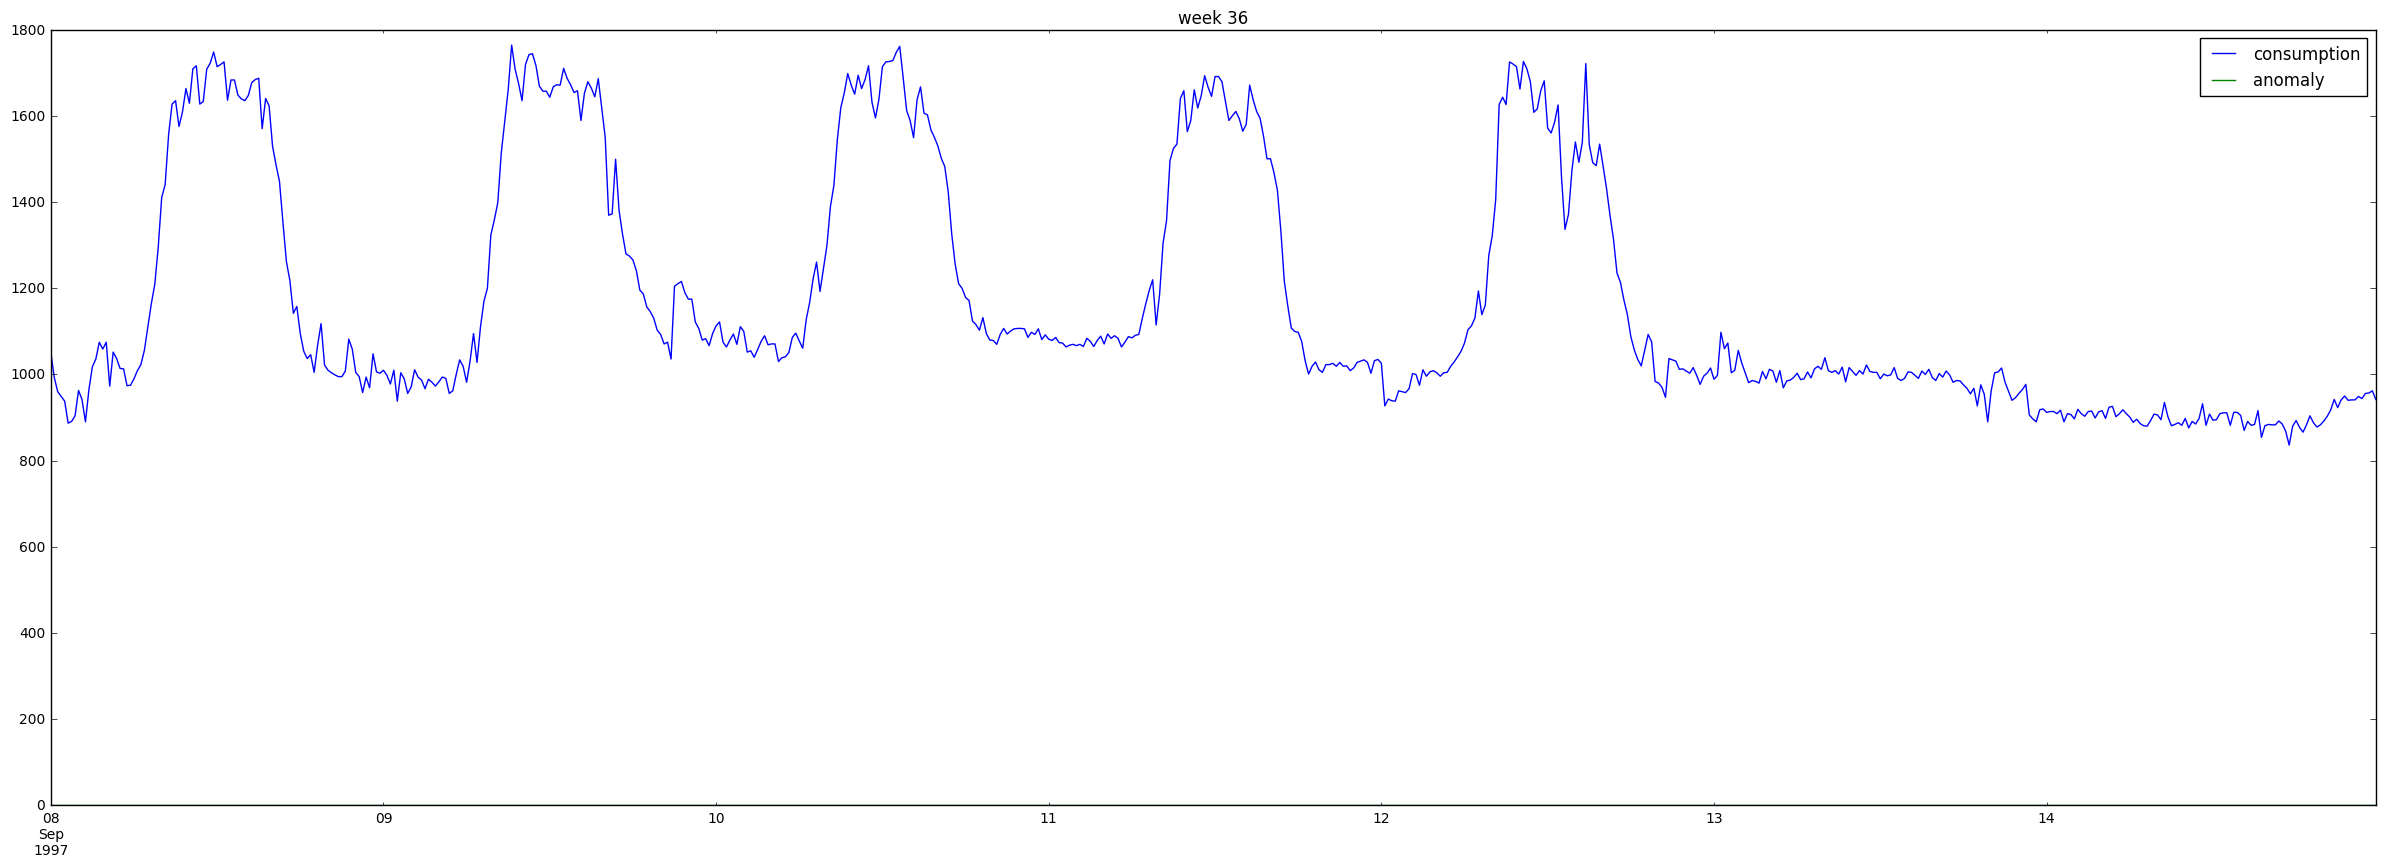

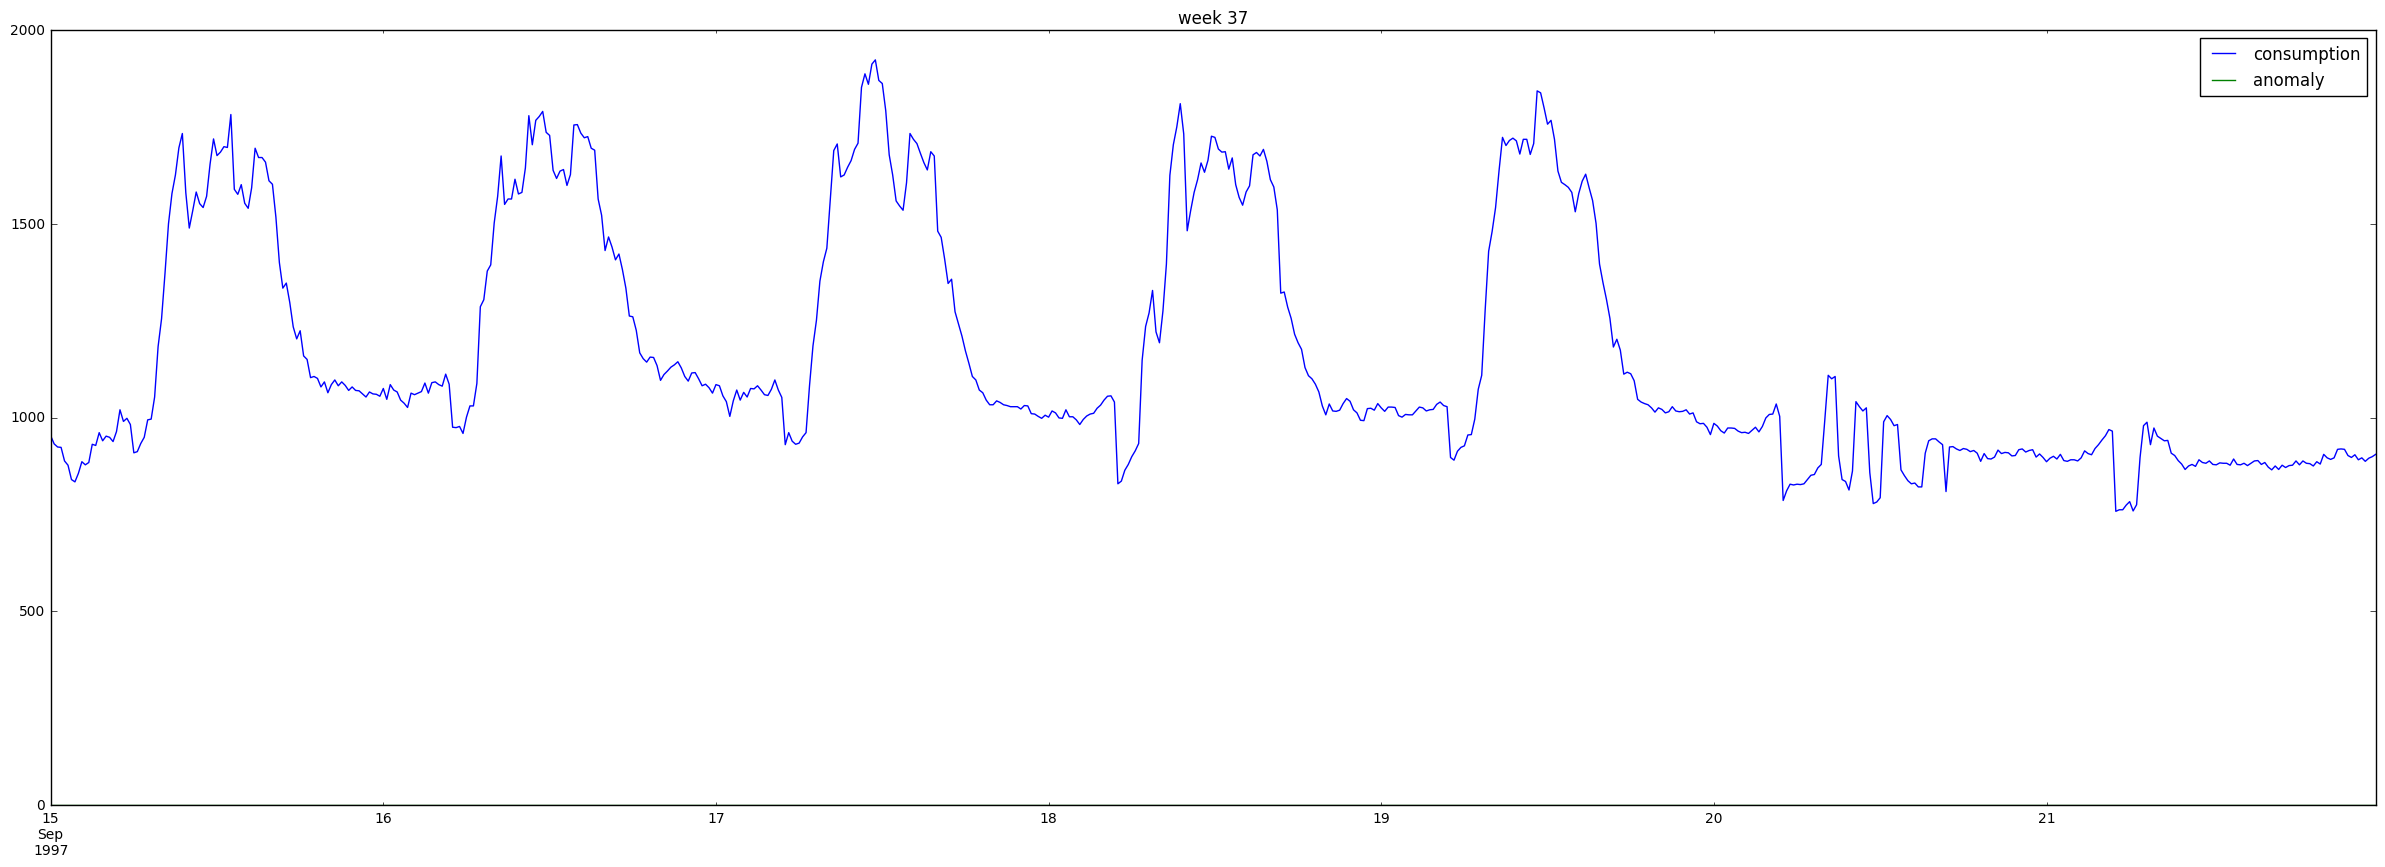

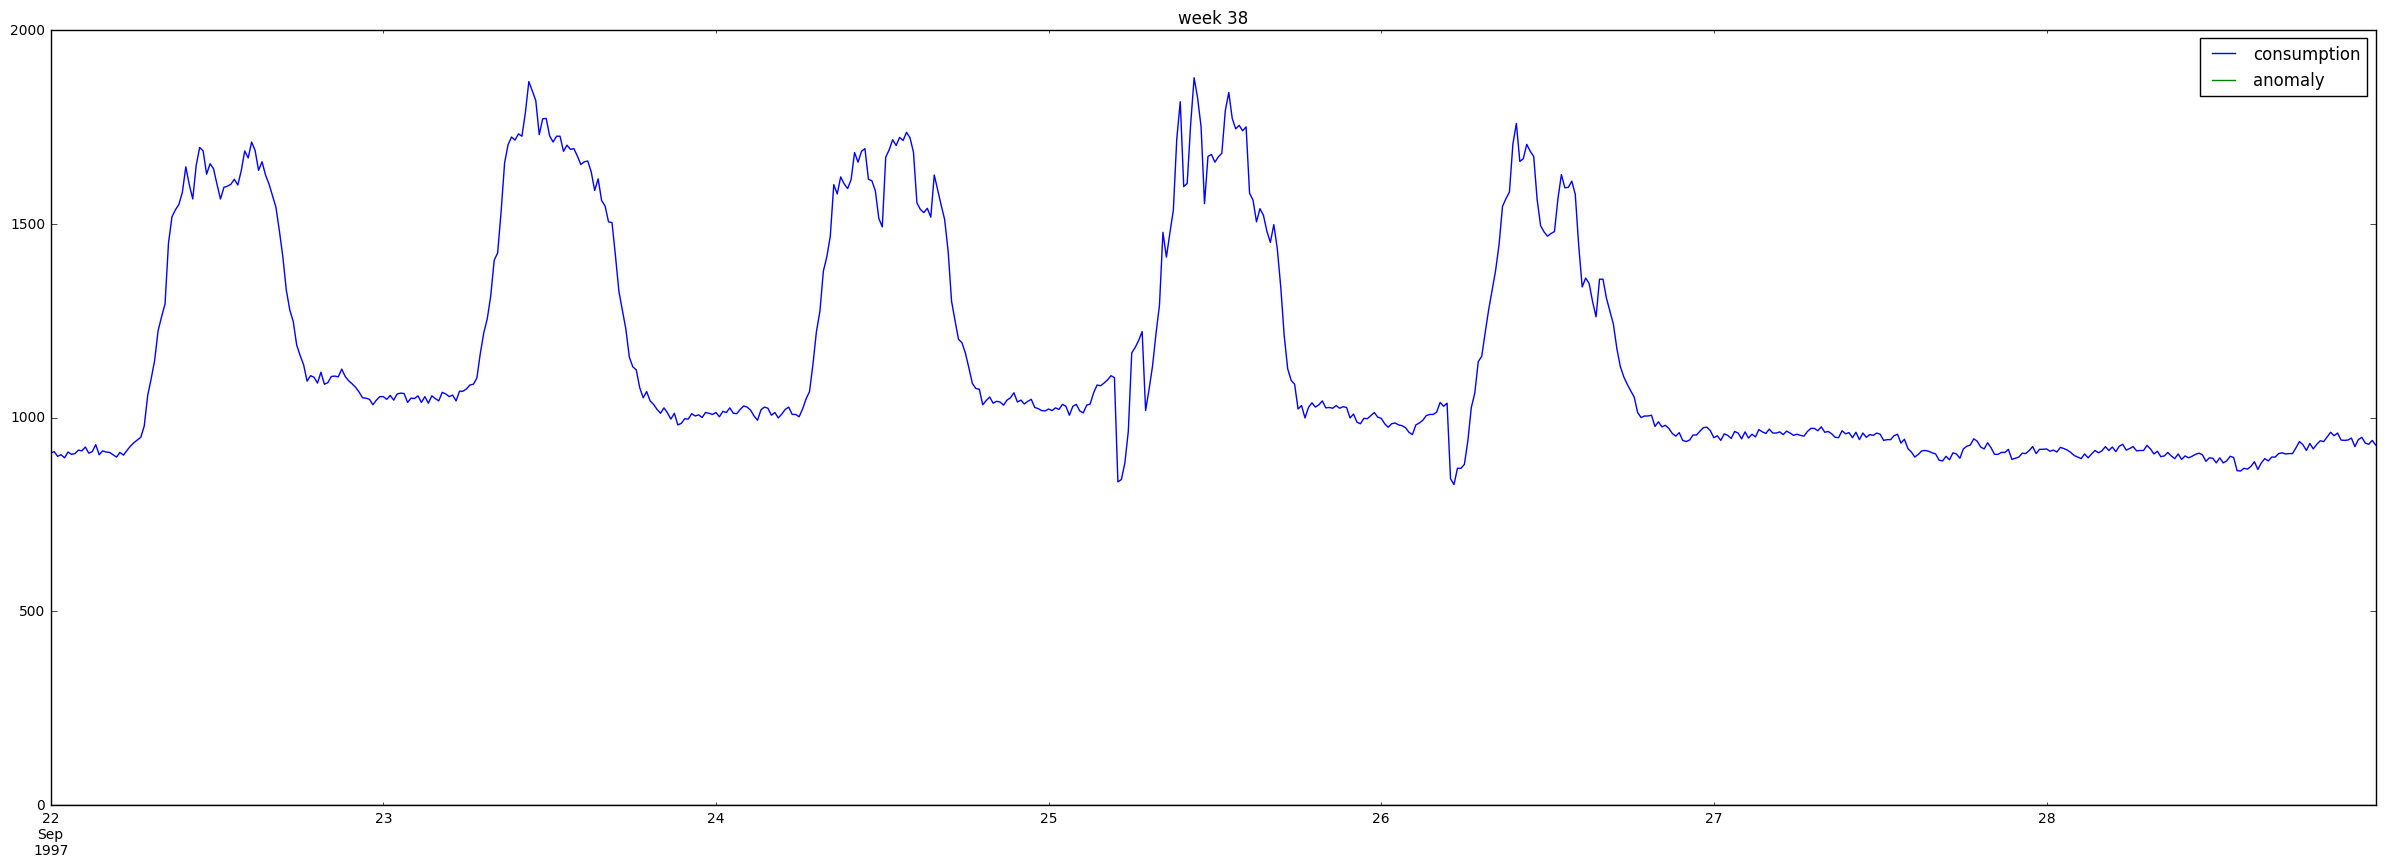

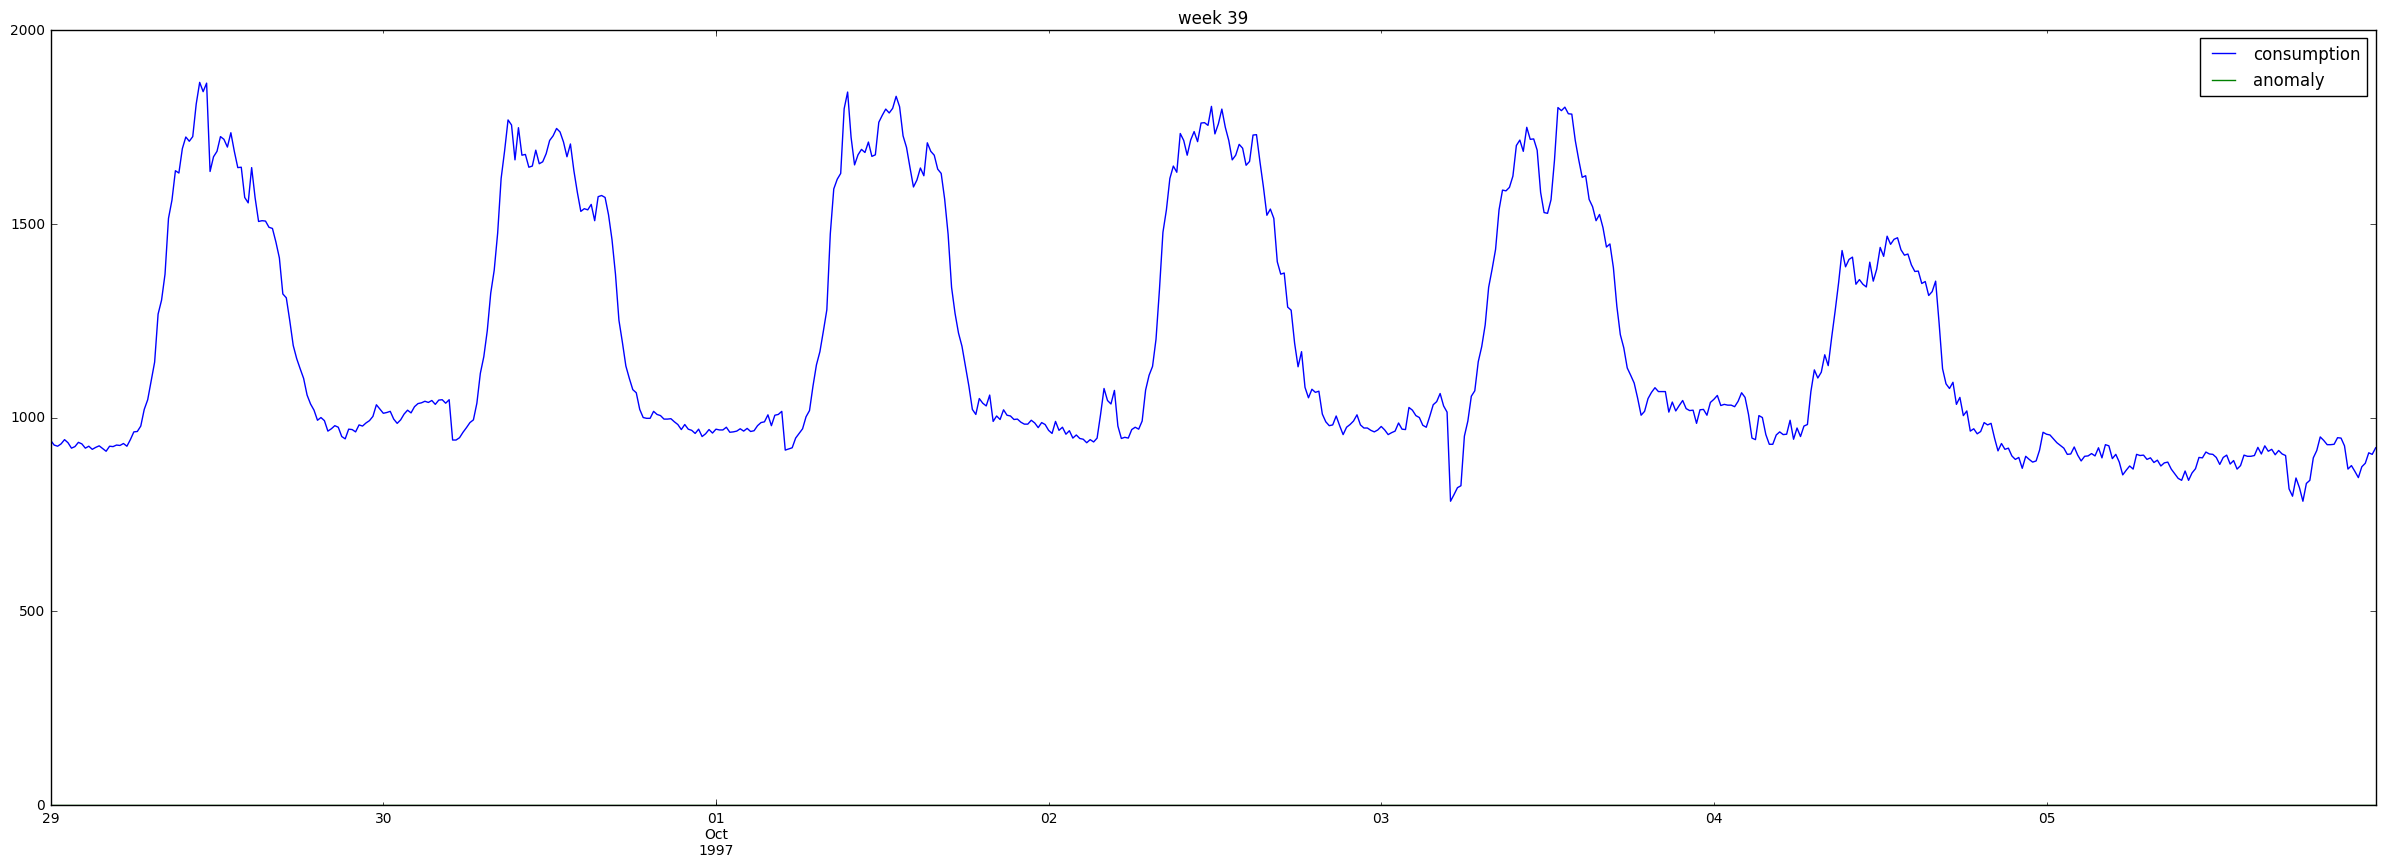

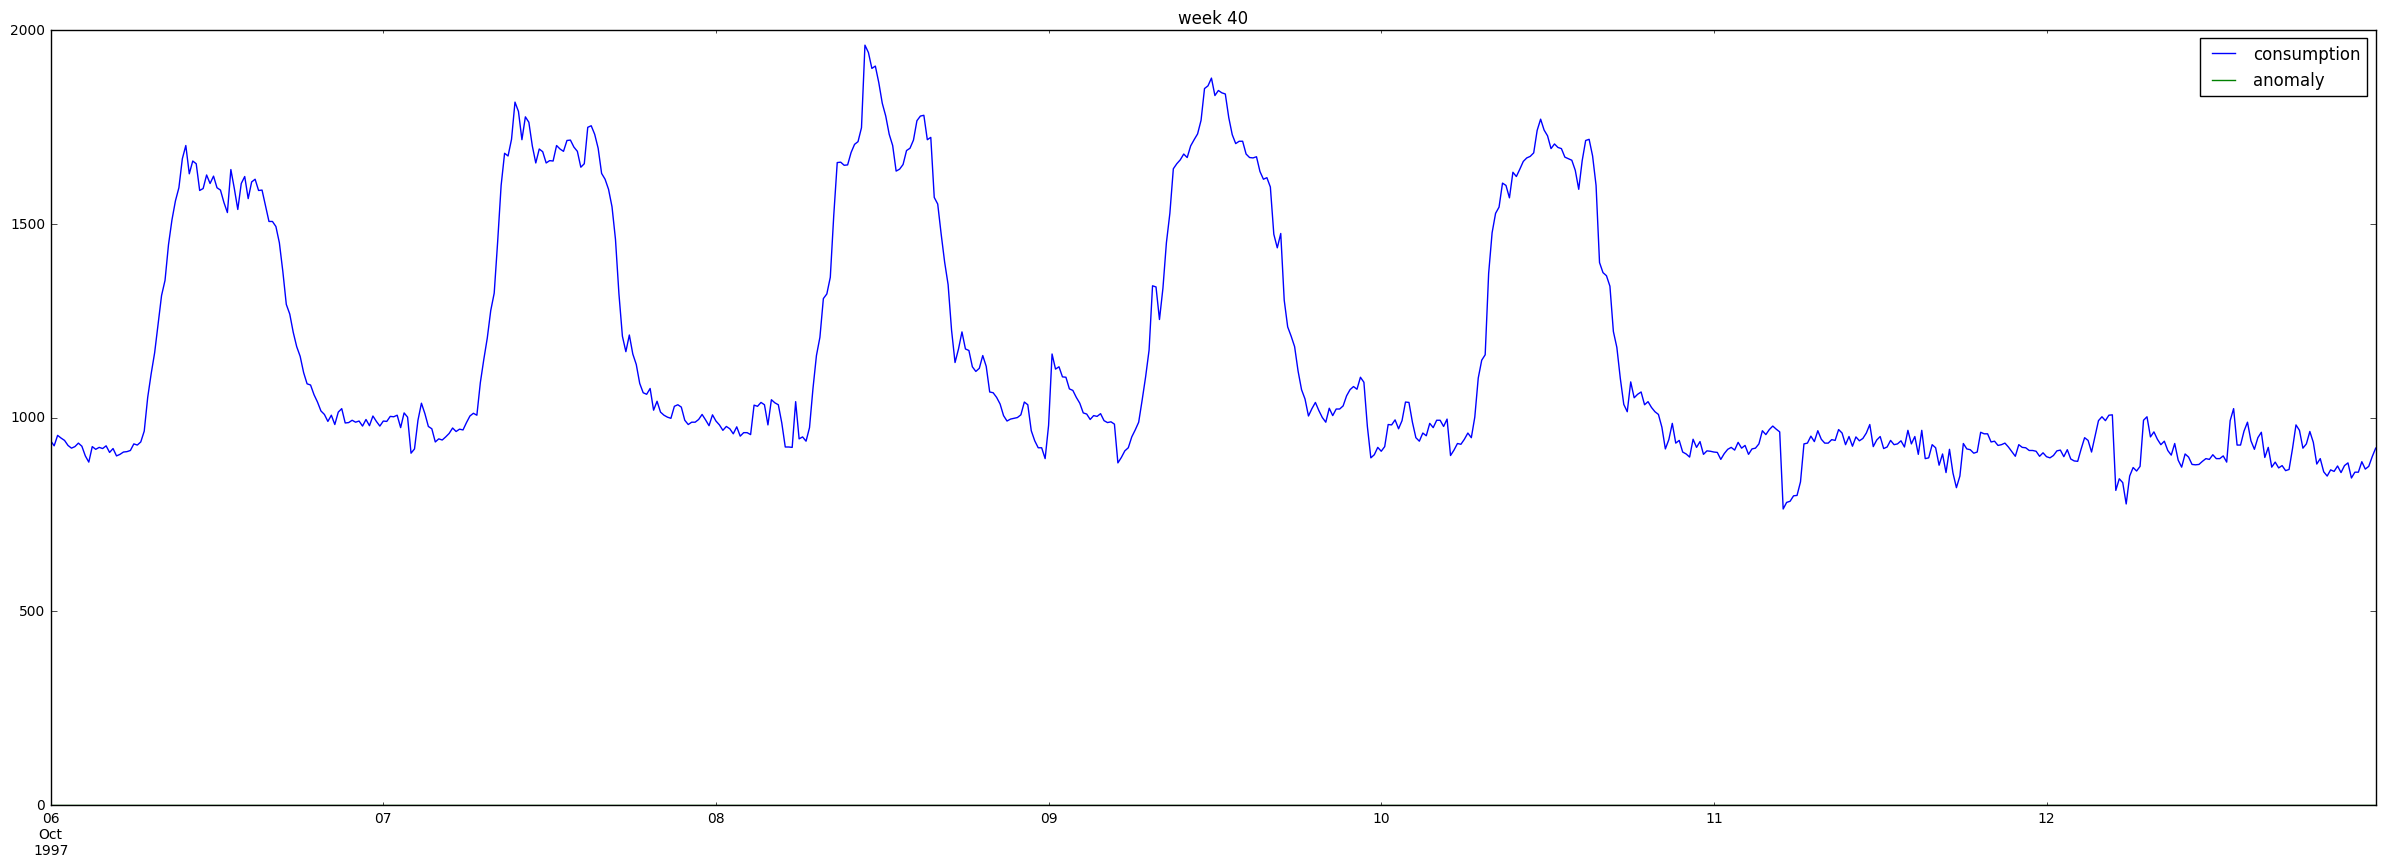

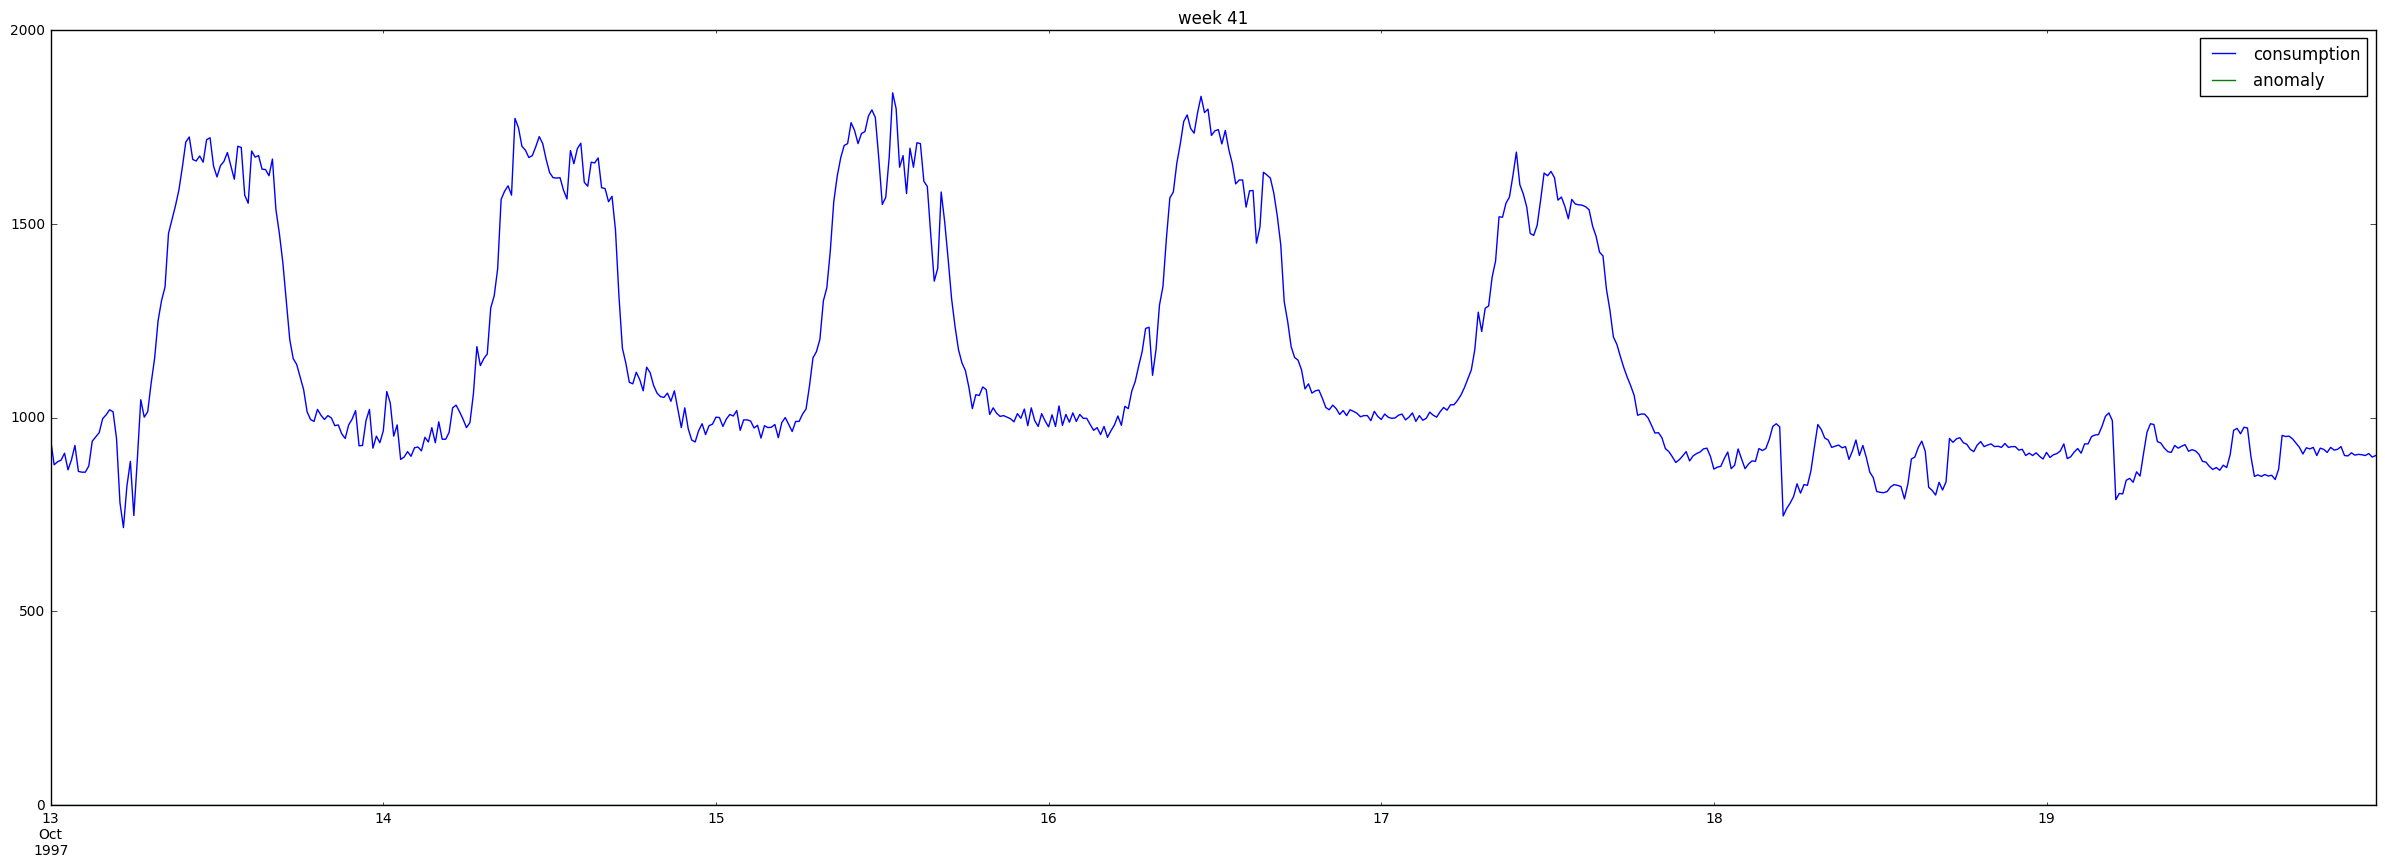

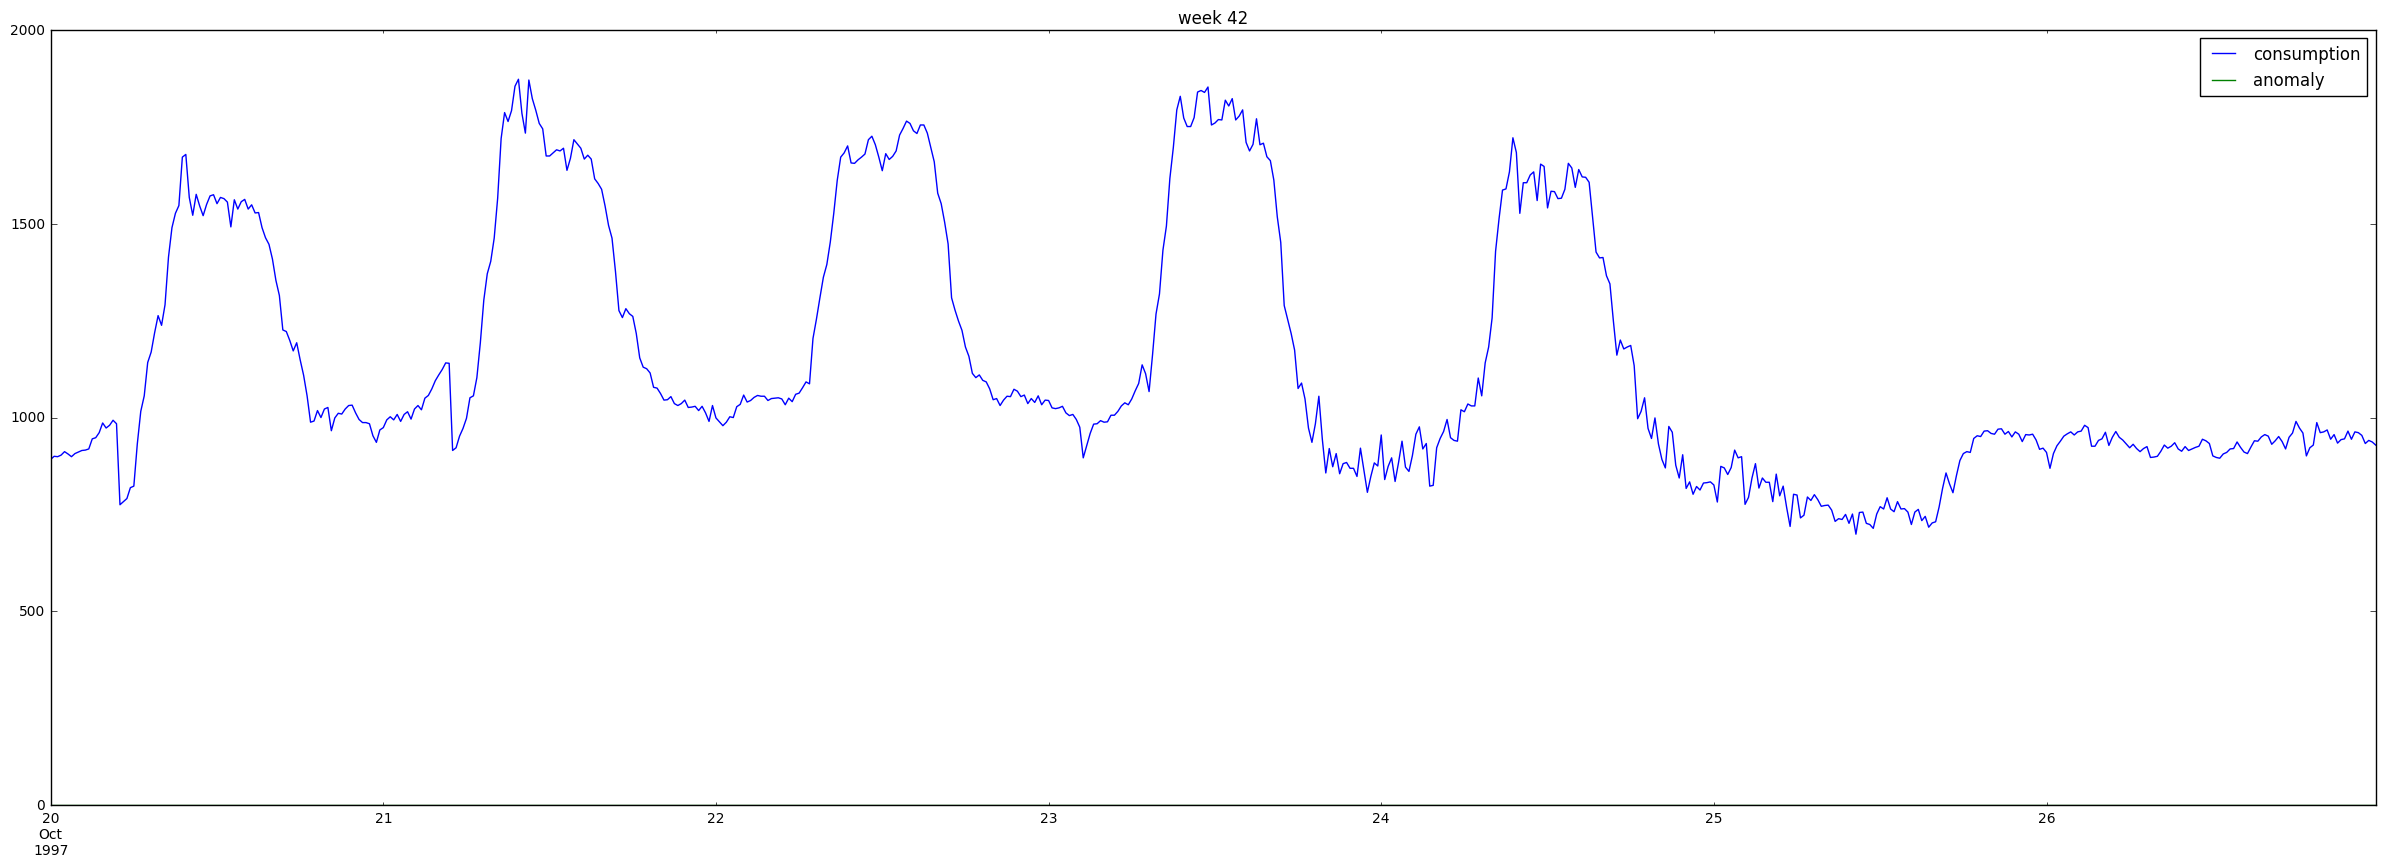

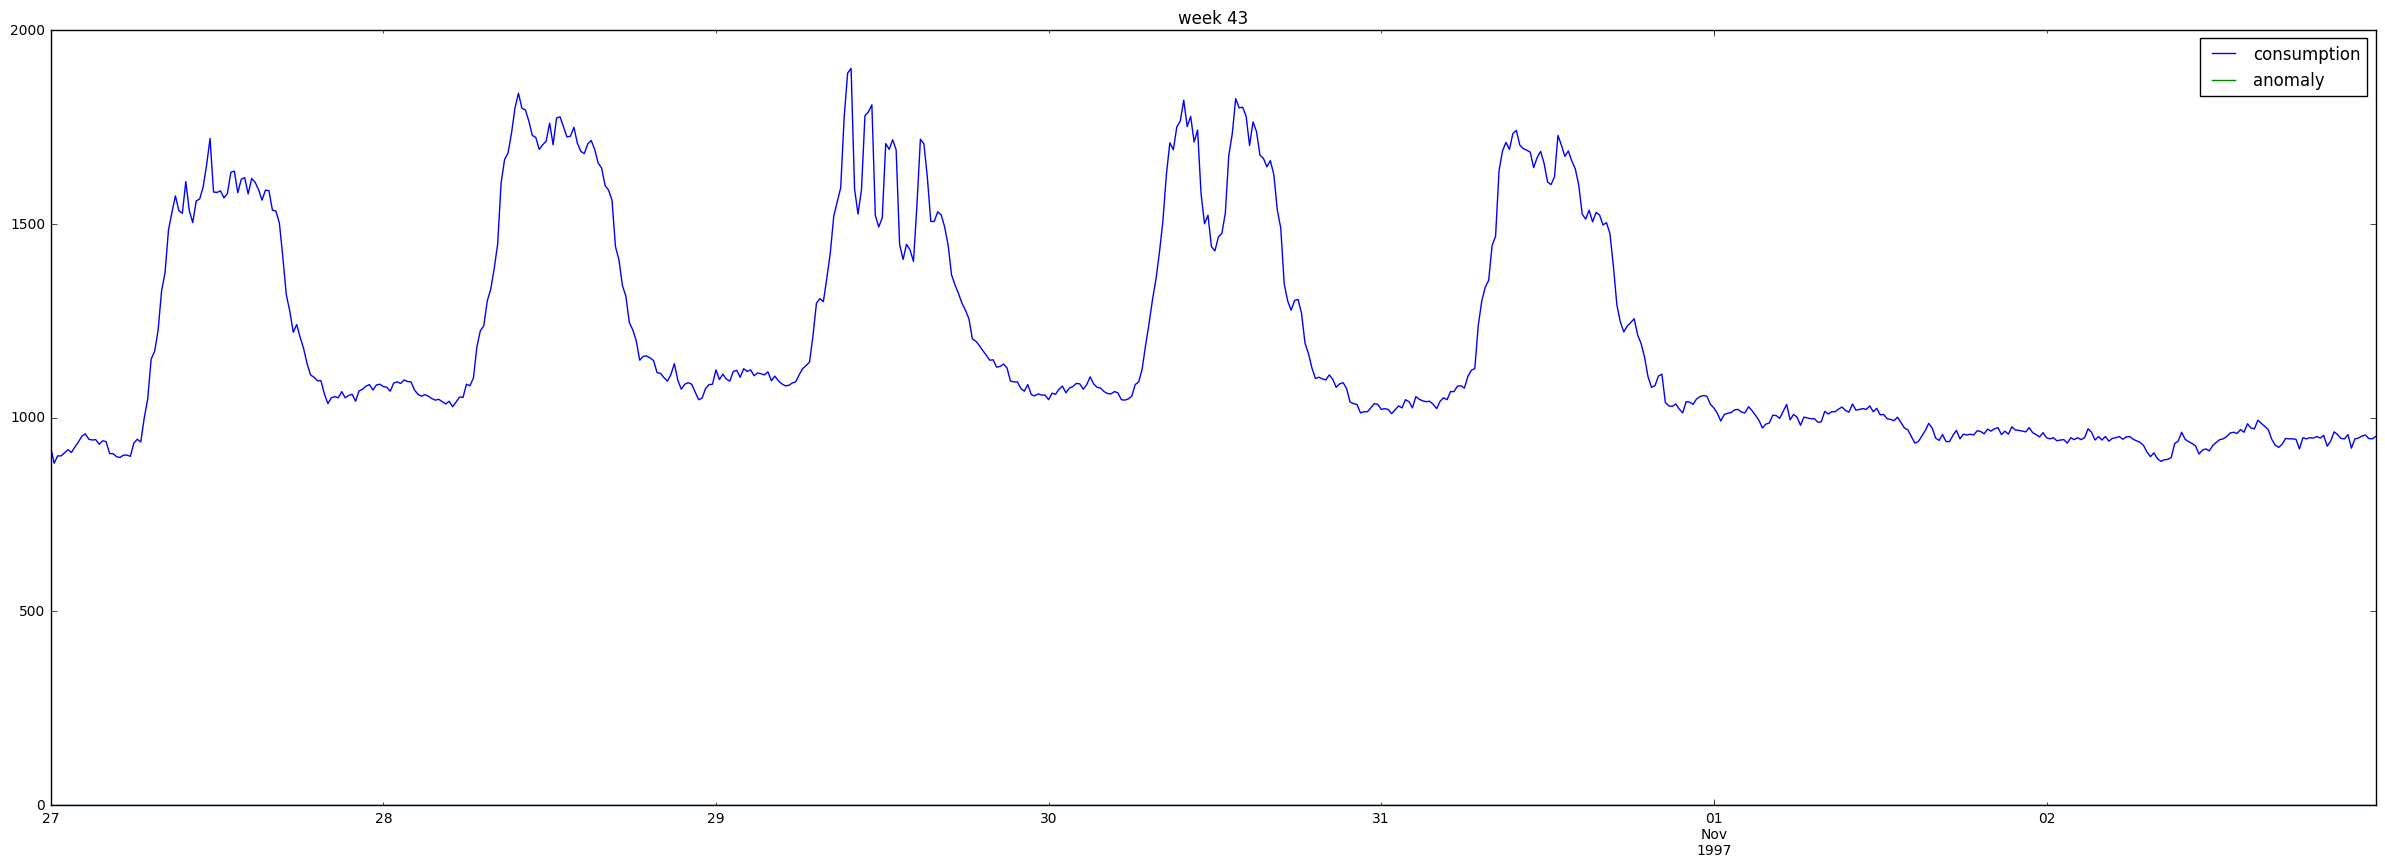

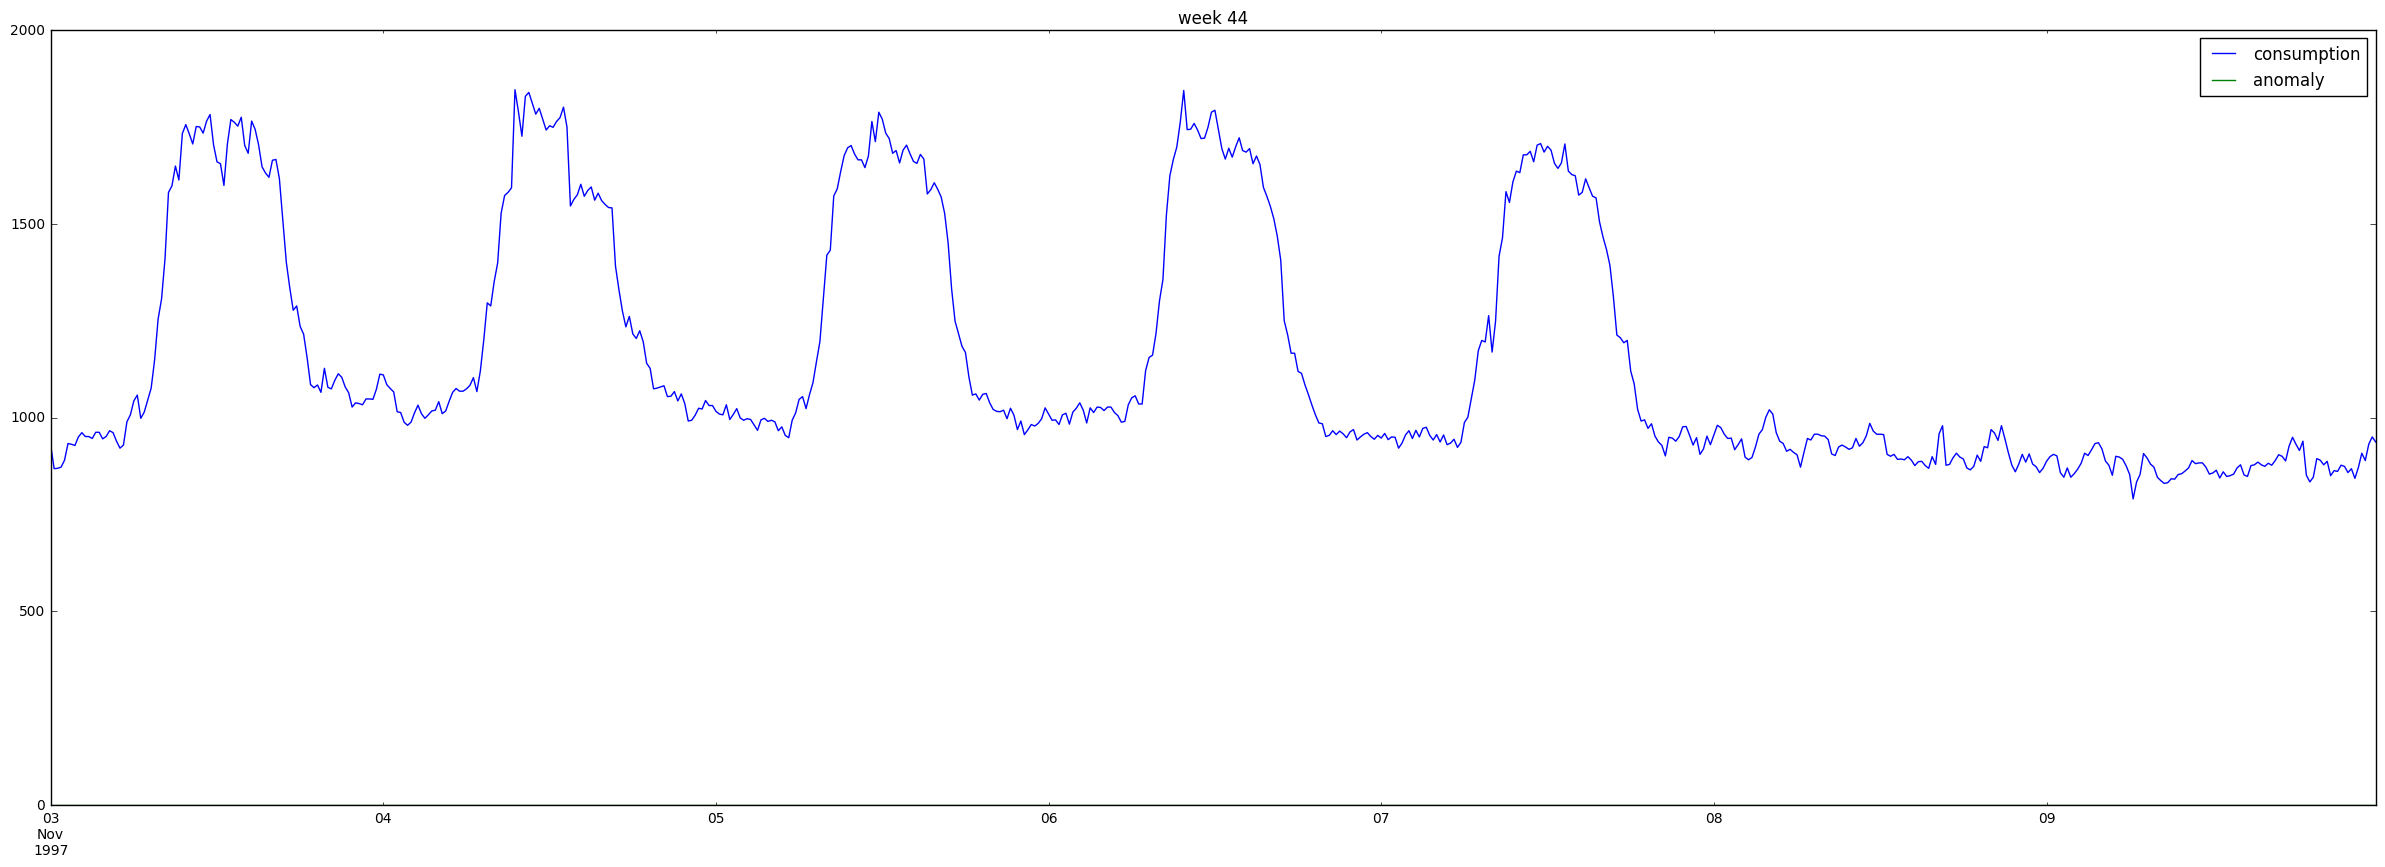

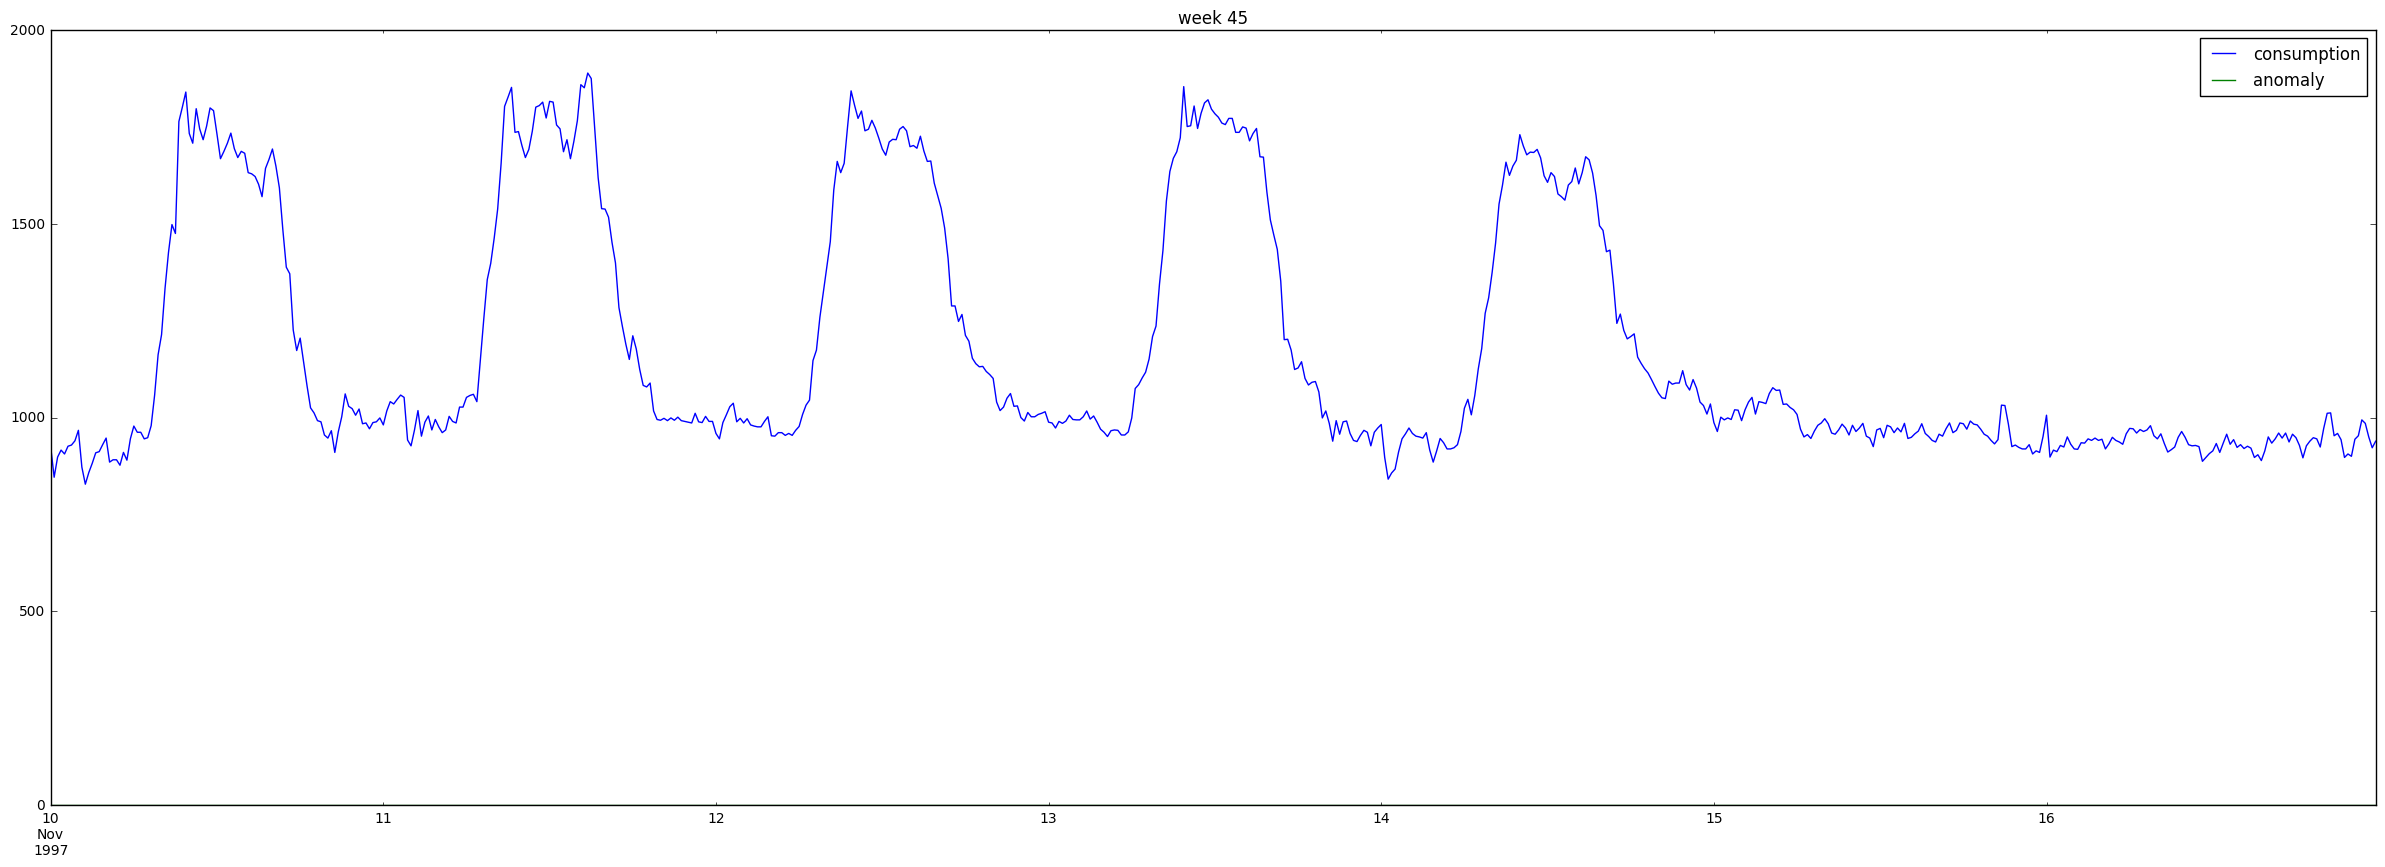

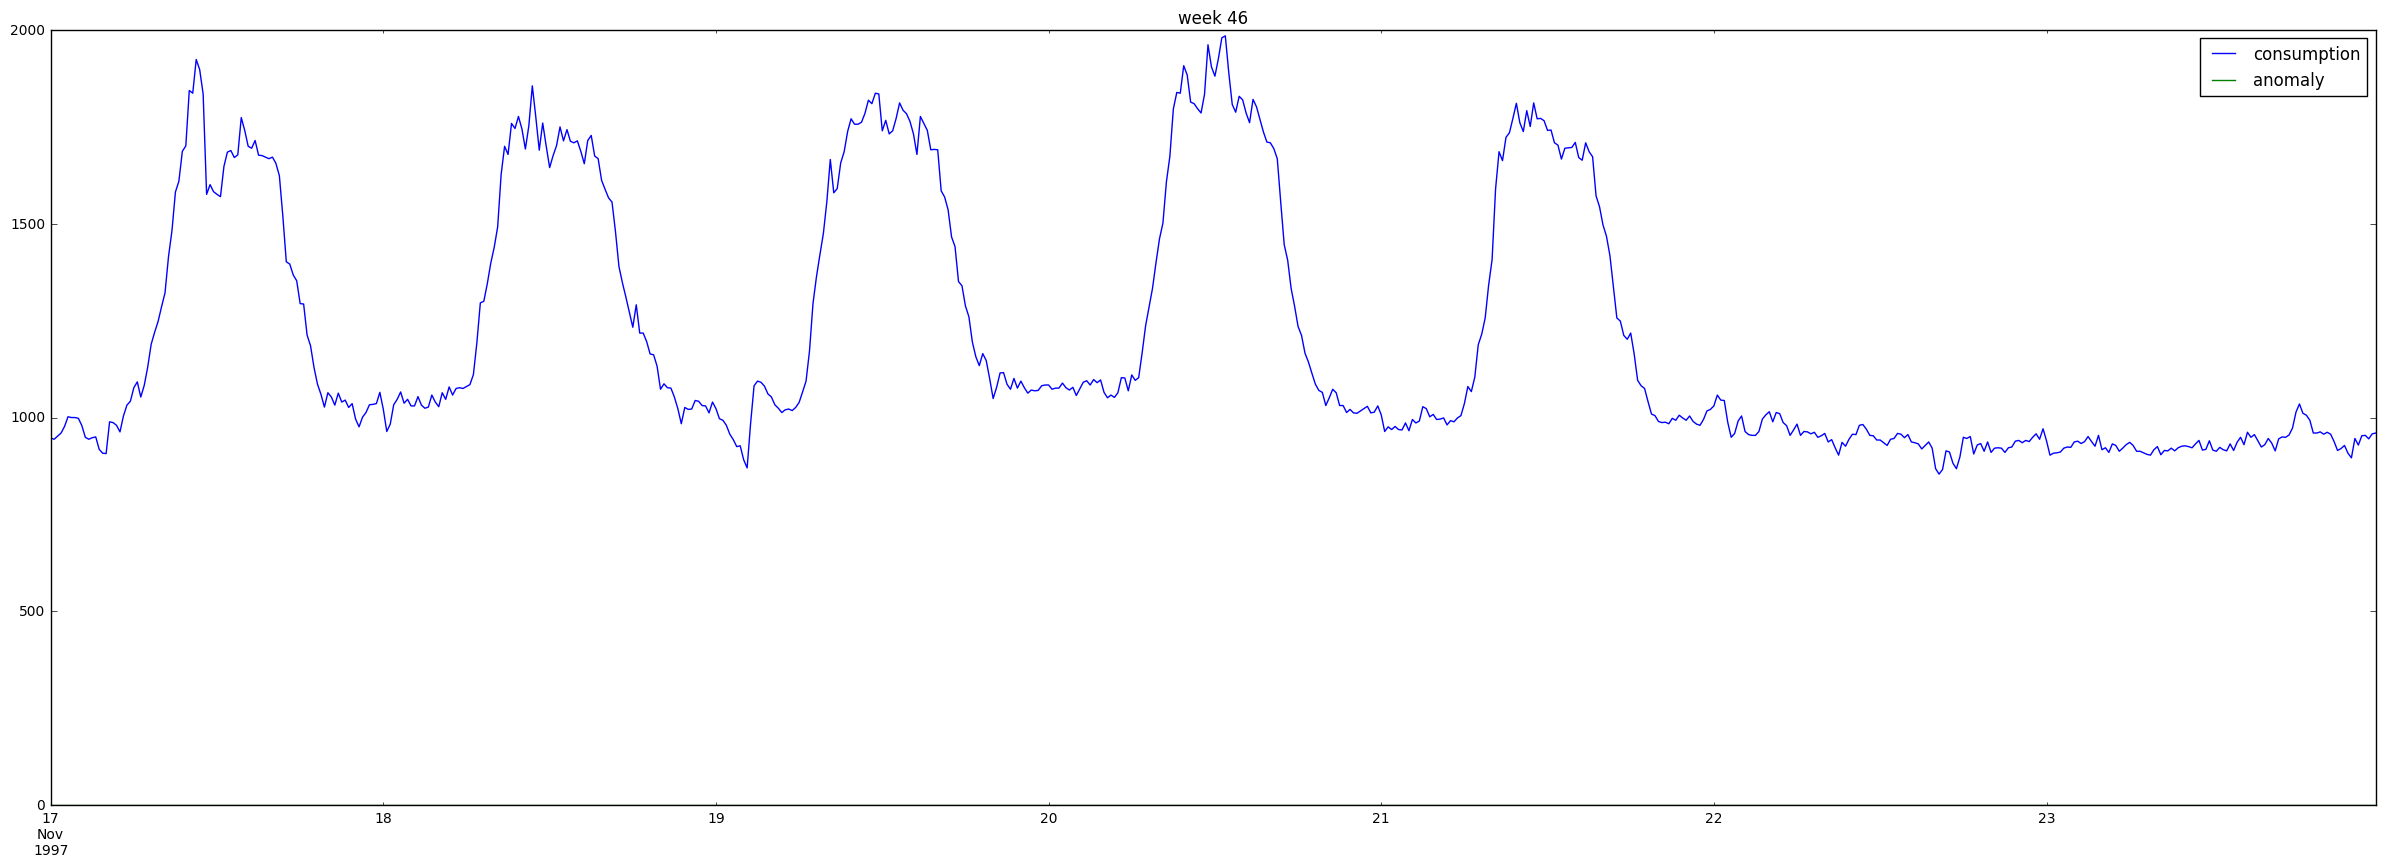

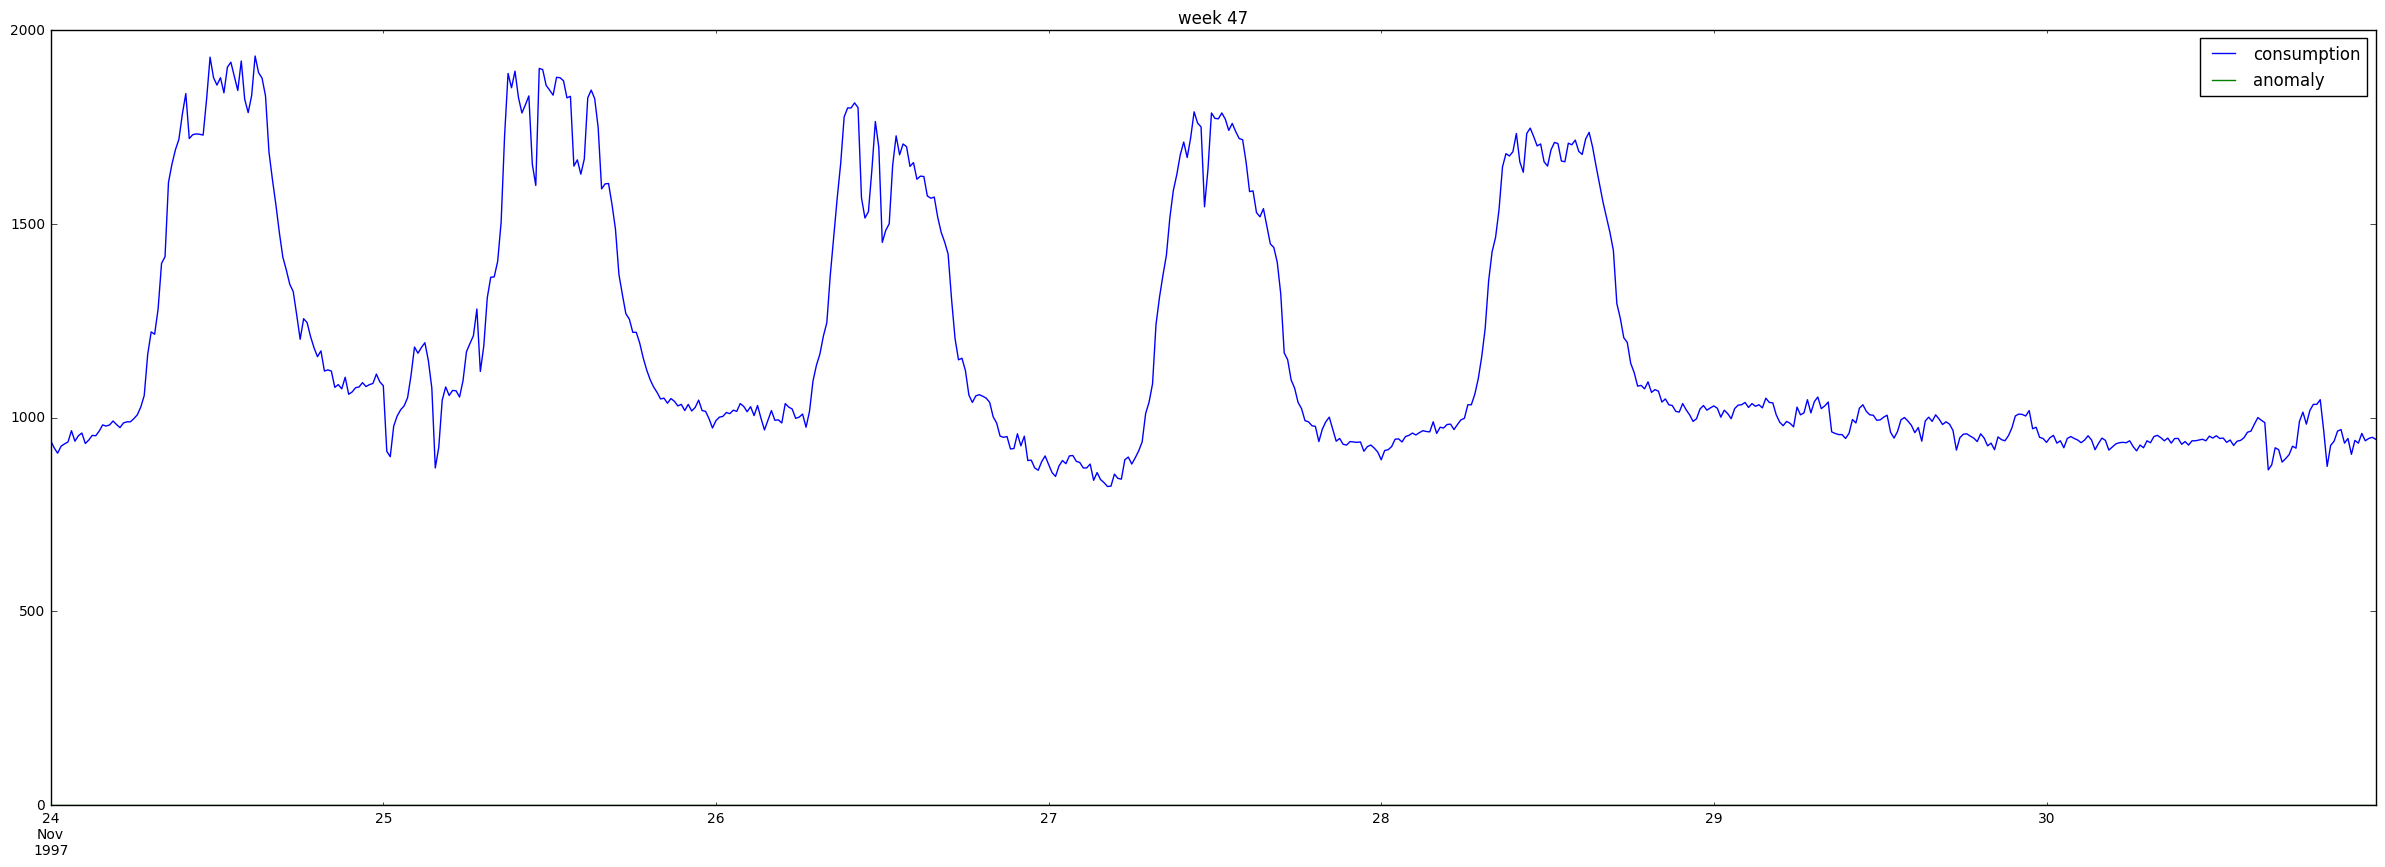

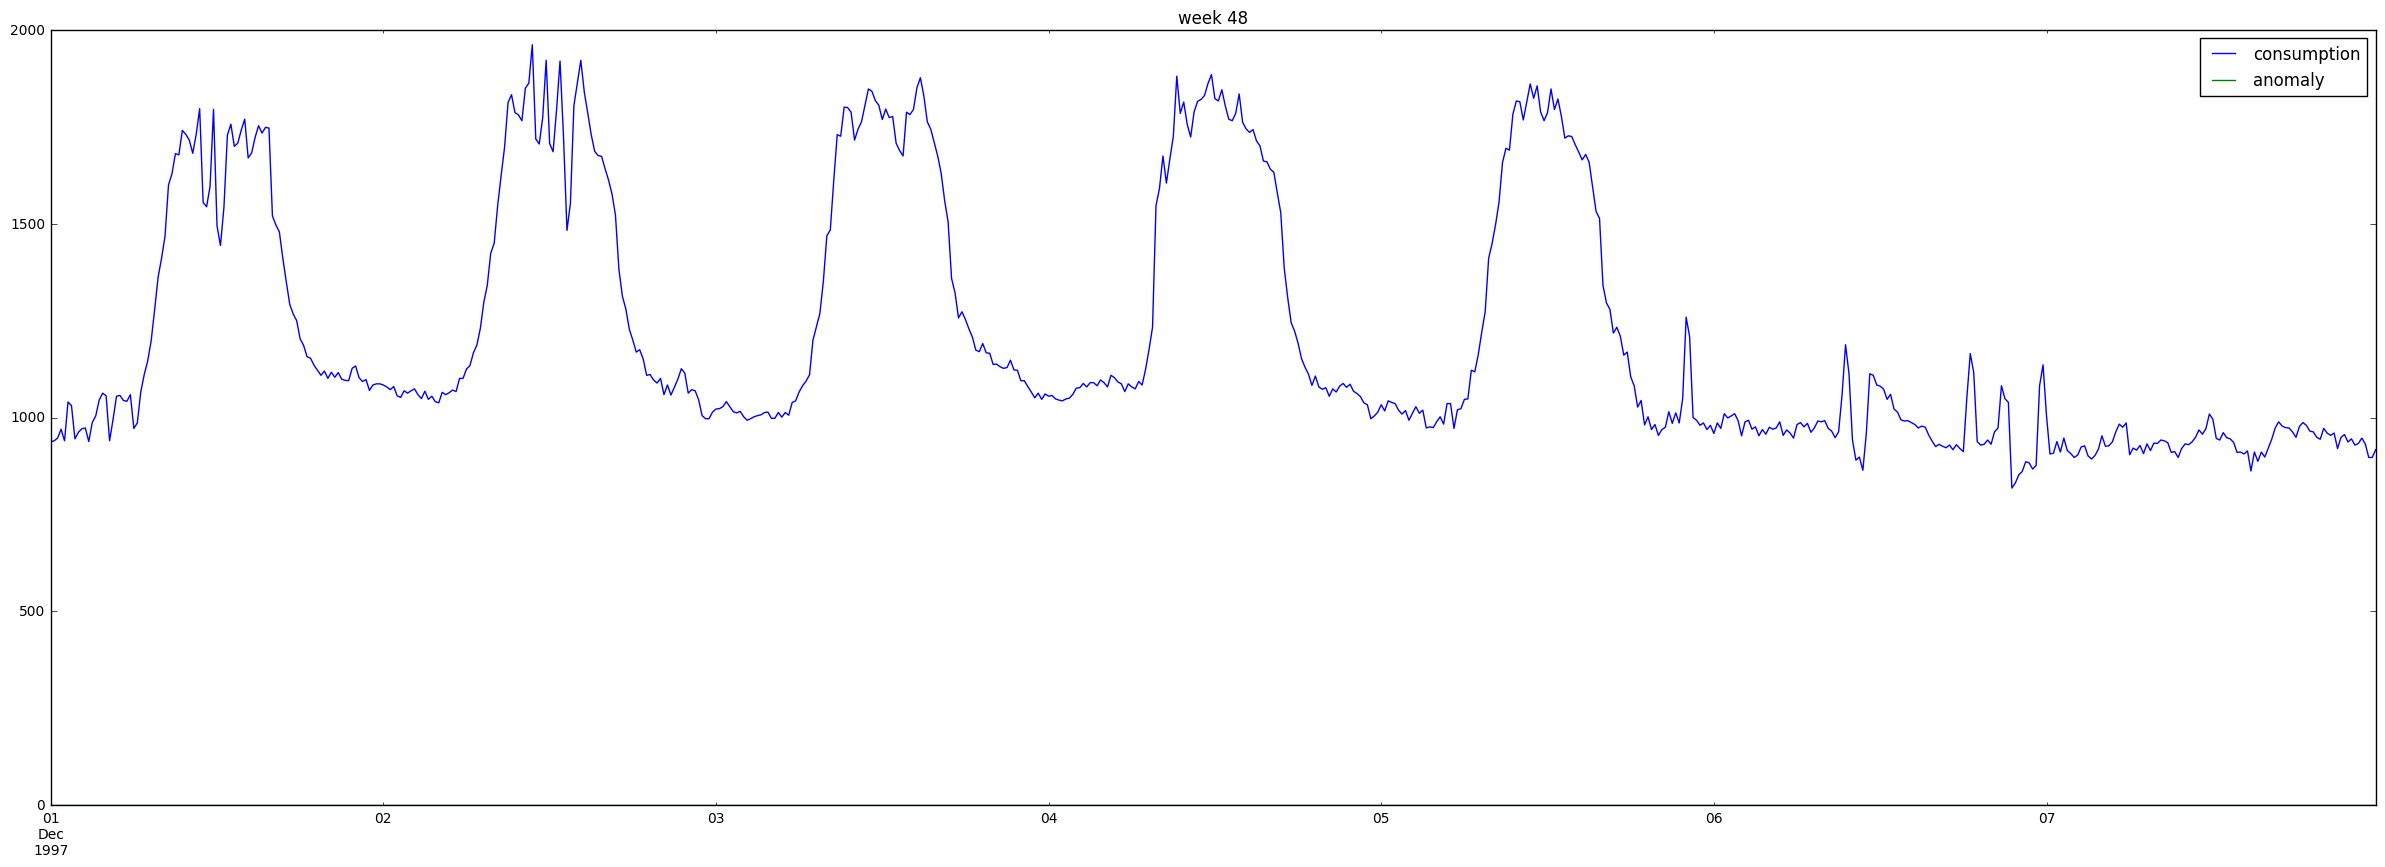

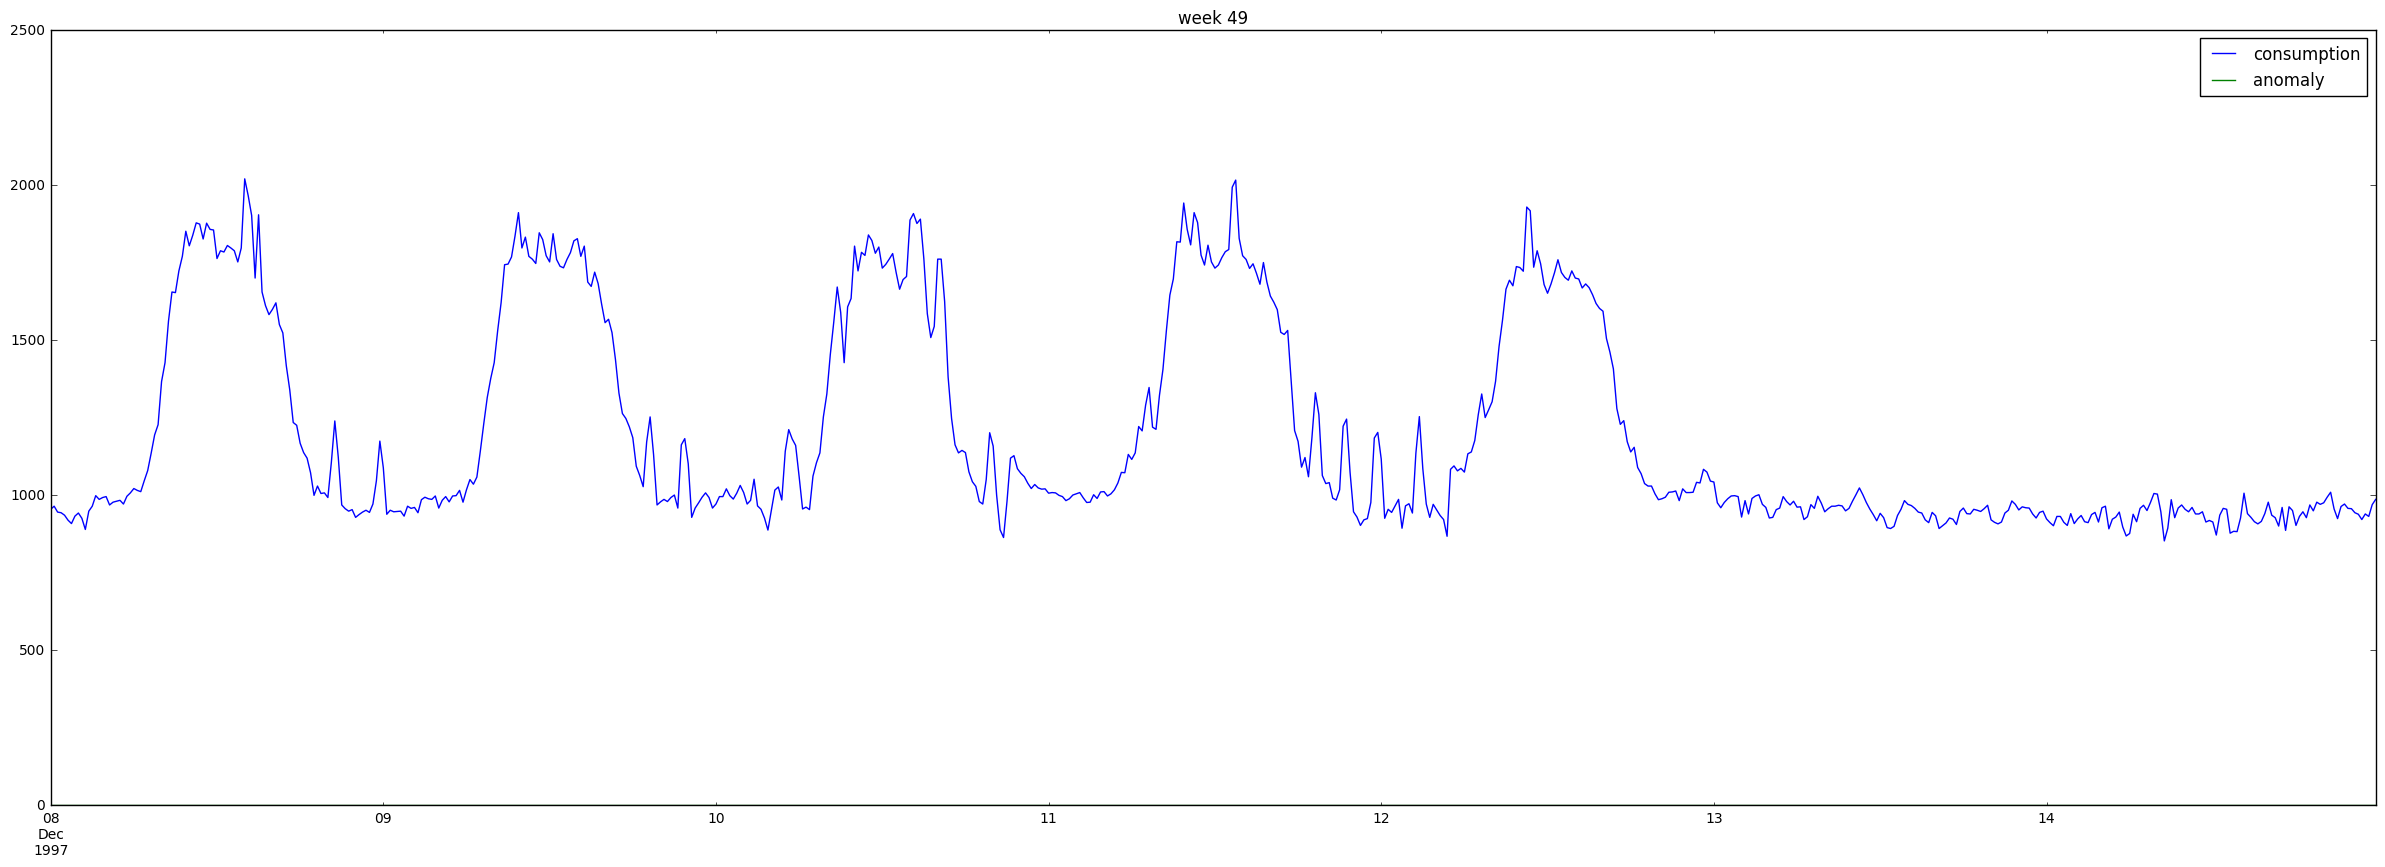

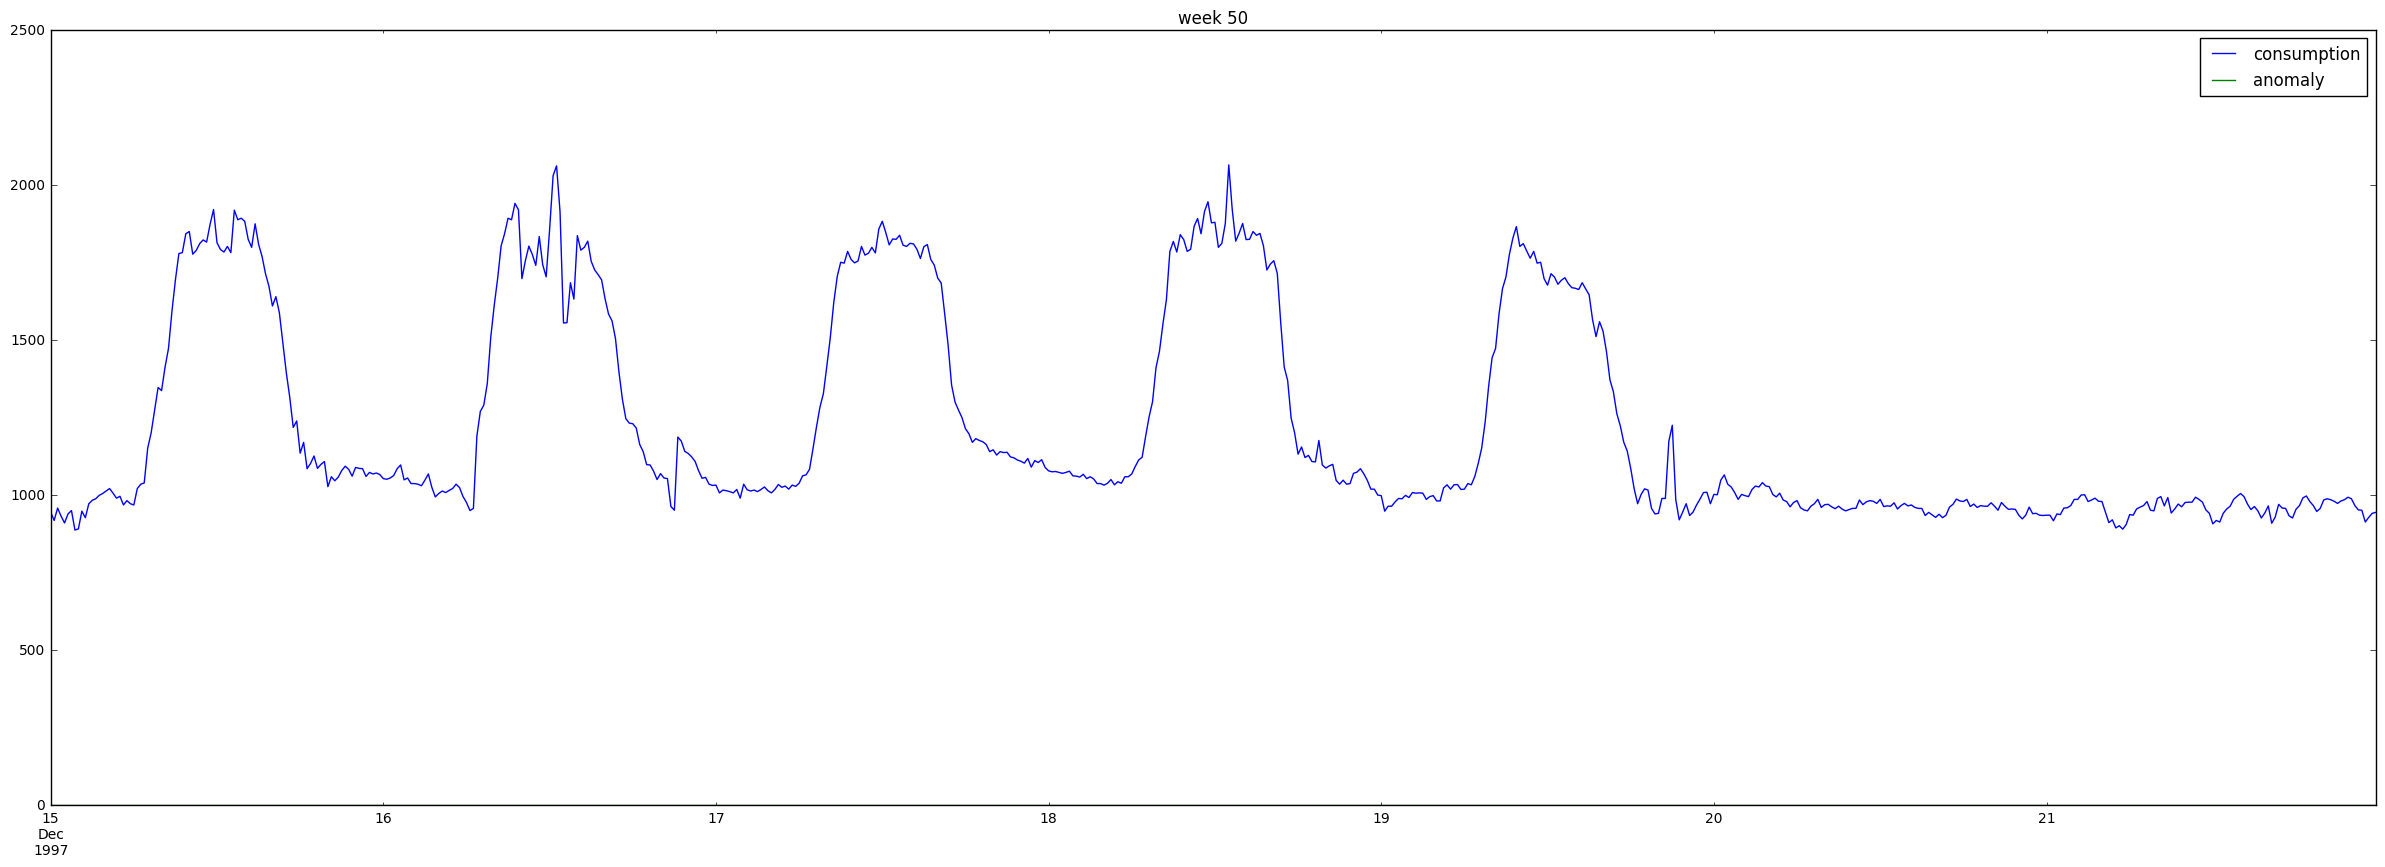

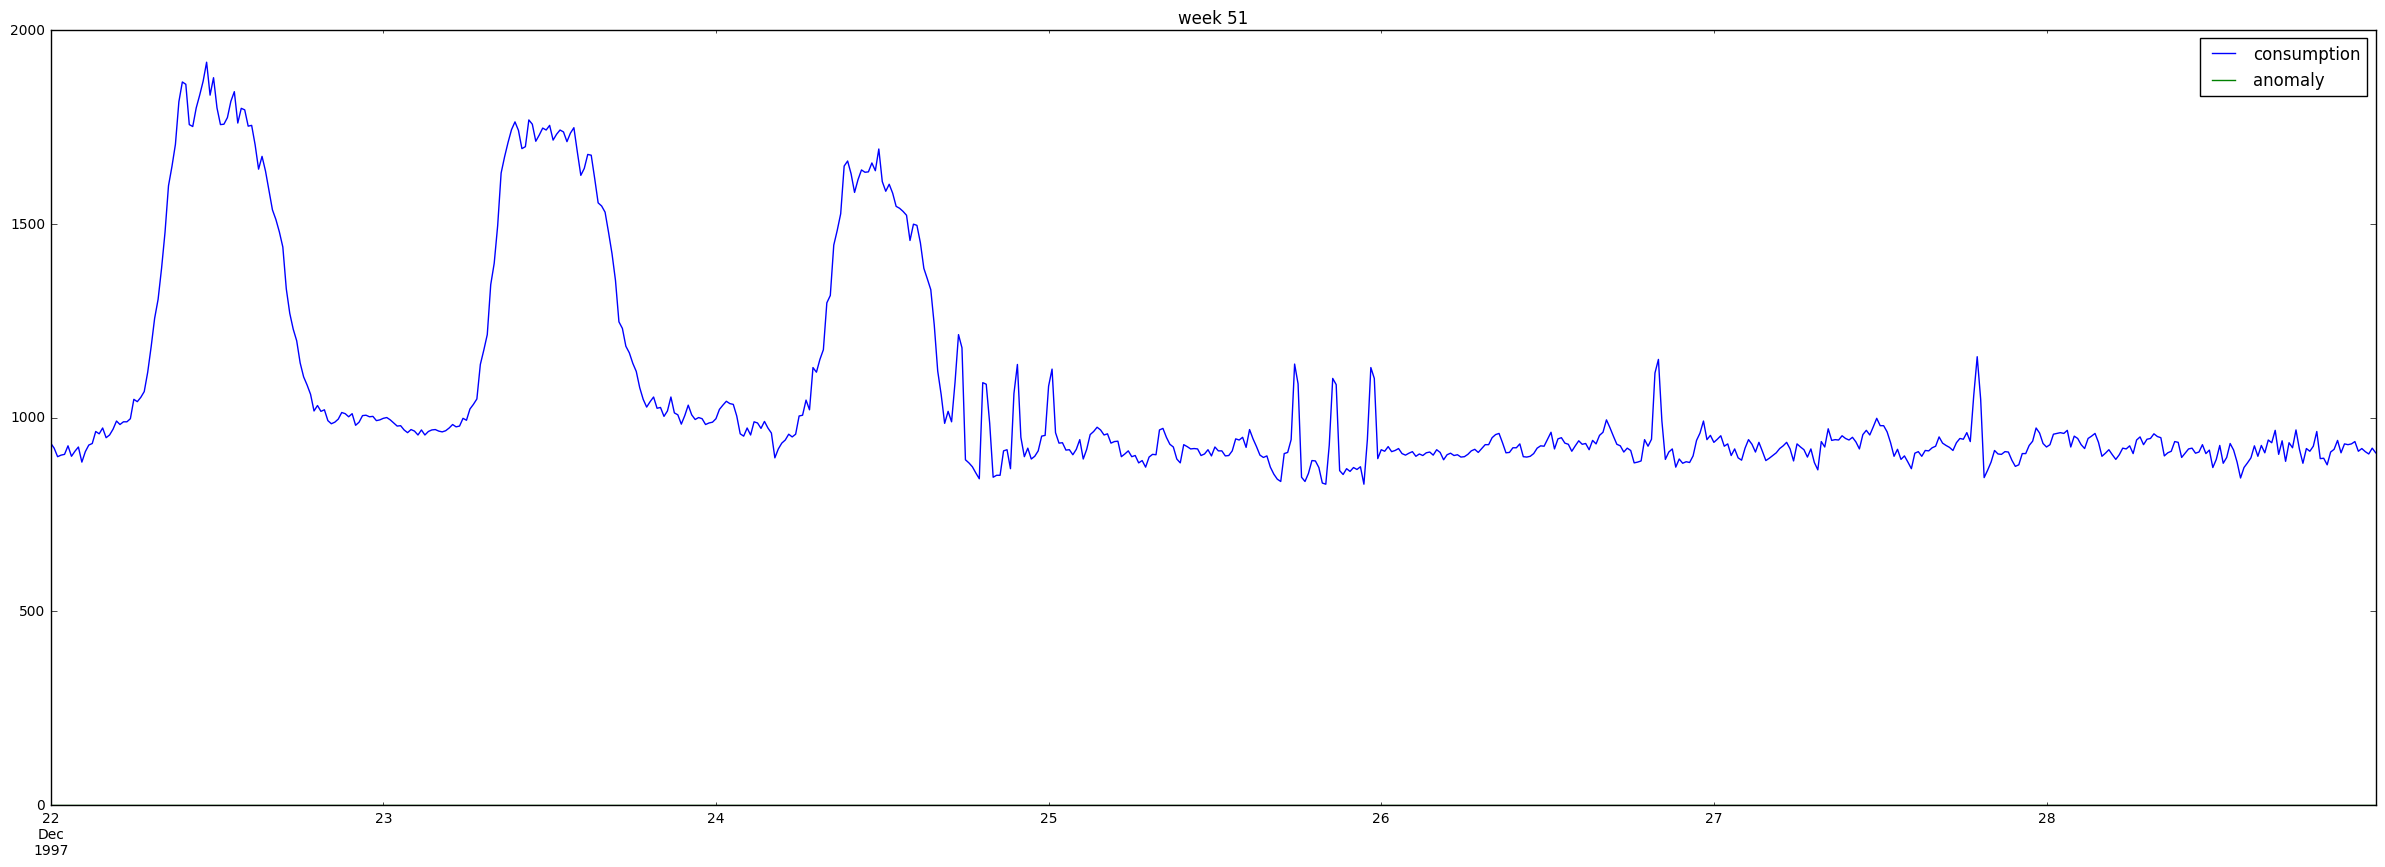

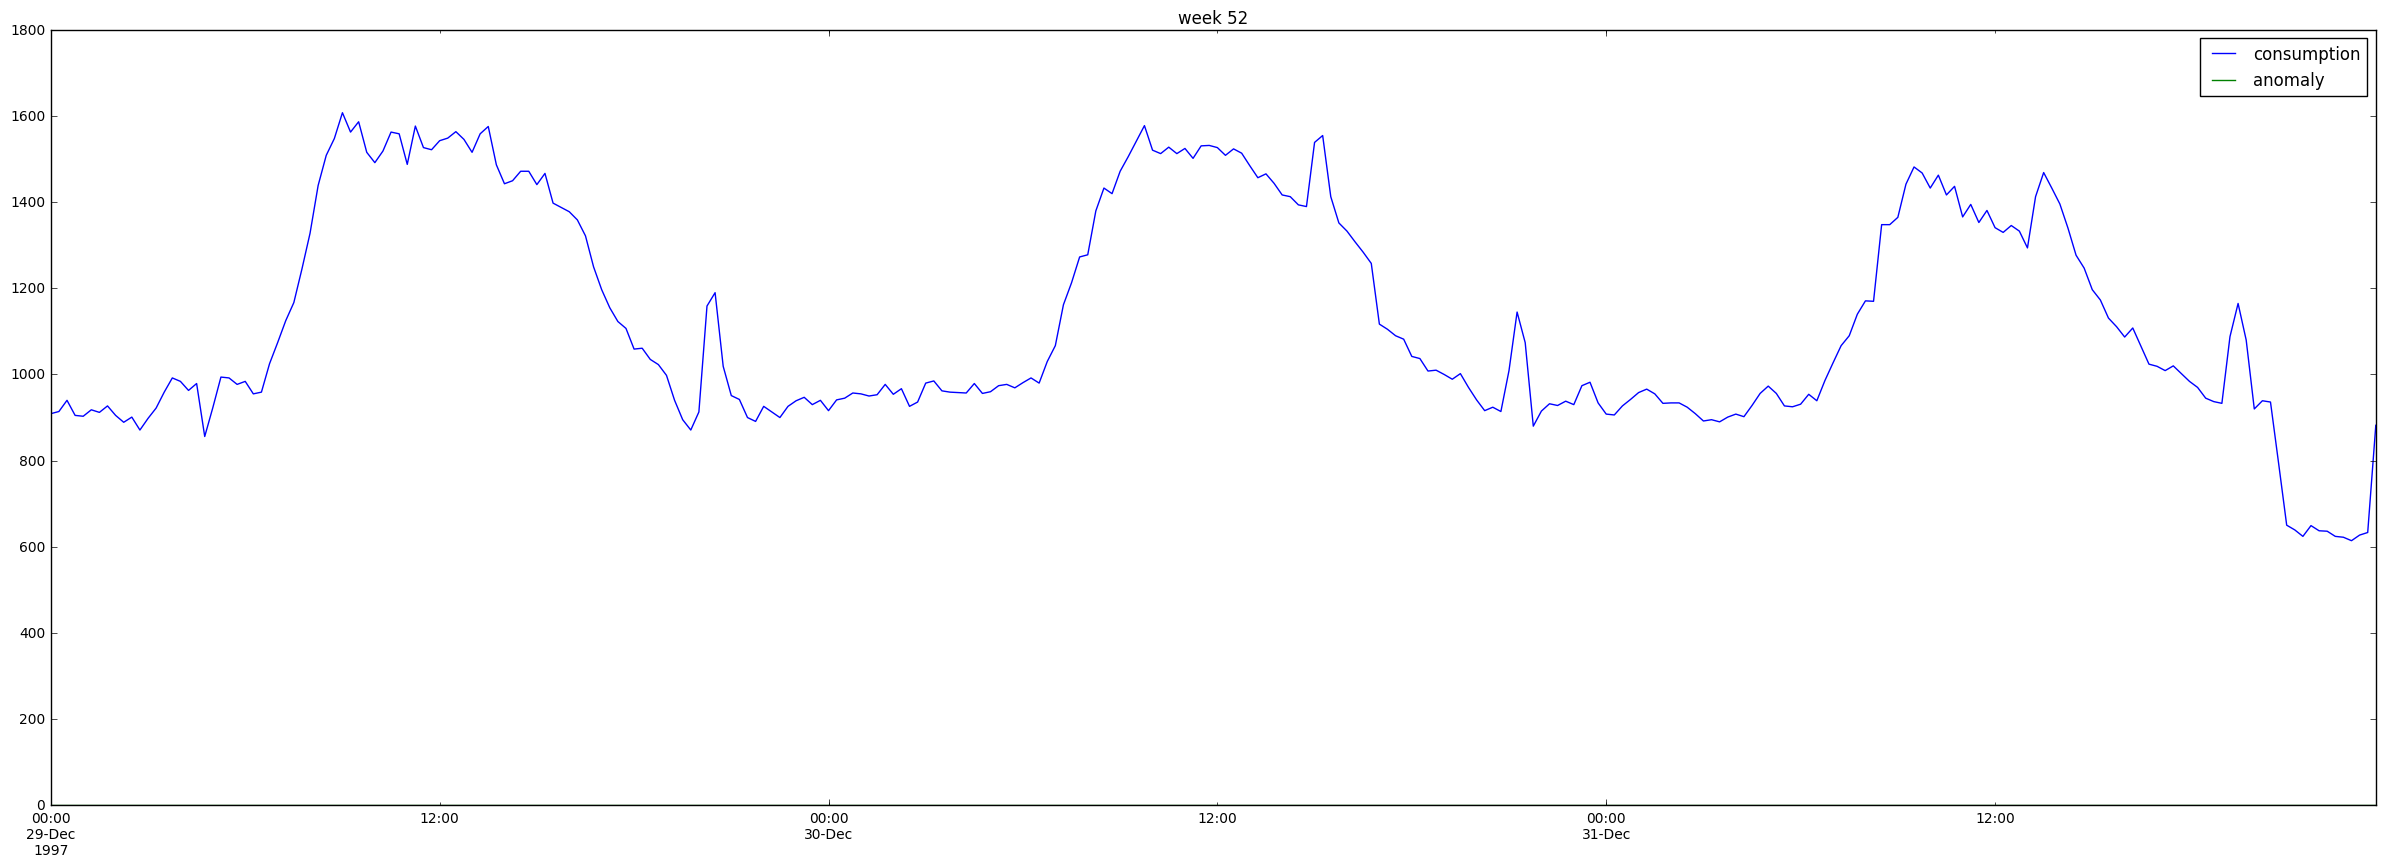

In [25]:
#iterate over a week. a week will have 672 values
step = 672
for i in range(0,df.shape[0],step):
    df[i:i+step].plot(figsize=(30,10))
    plt.title("week %s"%(i/step +1))
    plt.show()
    

In [28]:
anomaly_weeks = [12,13,17,18,20,39,51,52]
validation1_weeks = [7,8]
validation2_weeks = [10,11,12,13,19,20,38,39]
test_weeks = [15,16,17,18,50,51,52]

df_train_list = []
df_valid1_list = []
df_valid2_list = []
df_test_list = []

for i in range(0,df.shape[0],step):
    df[i:i+step].plot(figsize=(30,10))
    week = i/step +1
    if week in validation1_weeks:
        df_valid1_list.append(df[i:i+step])  
    elif week in validation2_weeks:
        if week in anomaly_weeks:
            df[i:i+step]['anomaly'] =1
        df_valid2_list.append(df[i:i+step])
    elif week in test_weeks:
        if week in anomaly_weeks:
            df[i:i+step]['anomaly'] =1
        df_test_list.append(df[i:i+step])
    else:
        df_train_list.append(df[i:i+step])

print len(df_train_list)
print len(df_valid1_list)
print len(df_valid2_list)
print len(df_test_list)
   

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


35
2
8
7


In [29]:
df_train = pd.concat(df_train_list)
df_test = pd.concat(df_test_list)
df_validation1 = pd.concat(df_valid1_list)
df_validation2 = pd.concat(df_valid2_list)
df_dict = {}
df_dict['train'] = df_train
df_dict['test'] = df_test
df_dict['validation1'] = df_validation1
df_dict['validation2'] = df_validation2

In [30]:
df_dict['test'].head(1400)

consumption  anomaly
1997-04-14 00:00:00          920        0
1997-04-14 00:15:00          925        0
1997-04-14 00:30:00          909        0
1997-04-14 00:45:00          921        0
1997-04-14 01:00:00          912        0
1997-04-14 01:15:00          920        0
1997-04-14 01:30:00          923        0
1997-04-14 01:45:00          939        0
1997-04-14 02:00:00          941        0
1997-04-14 02:15:00          957        0
1997-04-14 02:30:00          951        0
1997-04-14 02:45:00          950        0
1997-04-14 03:00:00          943        0
1997-04-14 03:15:00          947        0
1997-04-14 03:30:00          946        0
1997-04-14 03:45:00          923        0
1997-04-14 04:00:00          906        0
1997-04-14 04:15:00          916        0
1997-04-14 04:30:00          923        0
1997-04-14 04:45:00          931        0
1997-04-14 05:00:00          916        0
1997-04-14 05:15:00          925        0
1997-04-14 05:30:00          910        0
1997-04-14 05:45:00          922        0
1997-04-14 06:00:00          929        0
1997-04-14 06:15:00          952        0
1997-04-14 06:30:00         1007        0
1997-04-14 06:45:00         1021        0
1997-04-14 07:00:00         1087        0
1997-04-14 07:15:00         1136        0
...                          ...      ...
1997-04-28 06:30:00          953        1
1997-04-28 06:45:00          953        1
1997-04-28 07:00:00          963        1
1997-04-28 07:15:00         1041        1
1997-04-28 07:30:00         1108        1
1997-04-28 07:45:00         1177        1
1997-04-28 08:00:00         1313        1
1997-04-28 08:15:00         1353        1
1997-04-28 08:30:00         1466        1
1997-04-28 08:45:00         1596        1
1997-04-28 09:00:00         1570        1
1997-04-28 09:15:00         1571        1
1997-04-28 09:30:00         1600        1
1997-04-28 09:45:00         1716        1
1997-04-28 10:00:00         1670        1
1997-04-28 10:15:00         1643        1
1997-04-28 10:30:00         1706        1
1997-04-28 10:45:00         1721        1
1997-04-28 11:00:00         1721        1
1997-04-28 11:15:00         1726        1
1997-04-28 11:30:00         1724        1
1997-04-28 11:45:00         1641        1
1997-04-28 12:00:00         1625        1
1997-04-28 12:15:00         1614        1
1997-04-28 12:30:00         1602        1
1997-04-28 12:45:00         1575        1
1997-04-28 13:00:00         1579        1
1997-04-28 13:15:00         1667        1
1997-04-28 13:30:00         1682        1
1997-04-28 13:45:00         1679        1

[1400 rows x 2 columns]

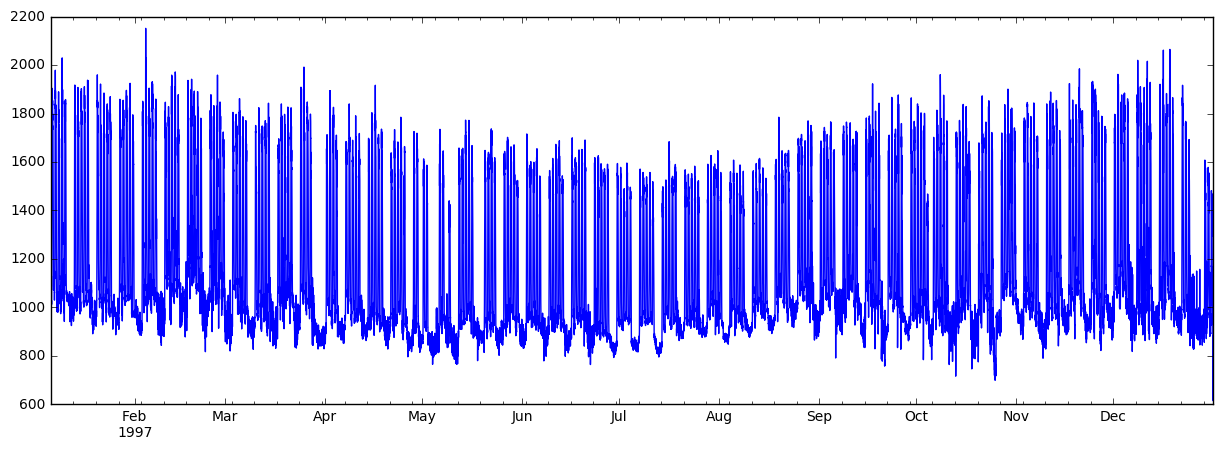

In [33]:
plt.figure()
df['consumption'].plot(figsize=(15,5))
rows = df[df.anomaly.isin([1])].itertuples()
for row in rows:
    plt.plot(row[0], row[1], 'r.', markersize=5.0)
plt.show()

Size of test: 4320
Size of validation1: 1344
Size of validation2: 5376
Size of train: 23520
Total: 34560
Ratio of test: 0.125000
Ratio of validation1: 0.038889
Ratio of validation2: 0.155556
Ratio of train: 0.680556


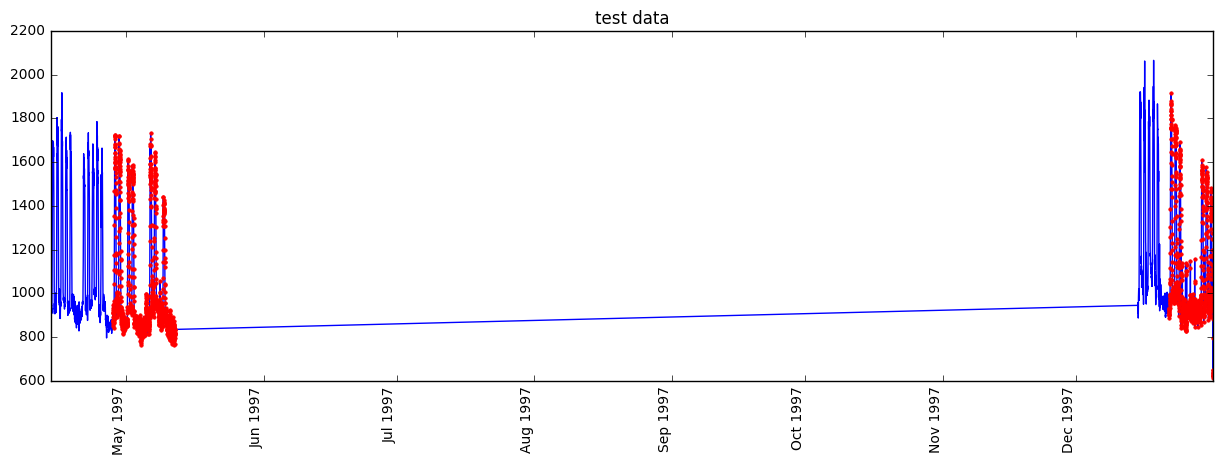

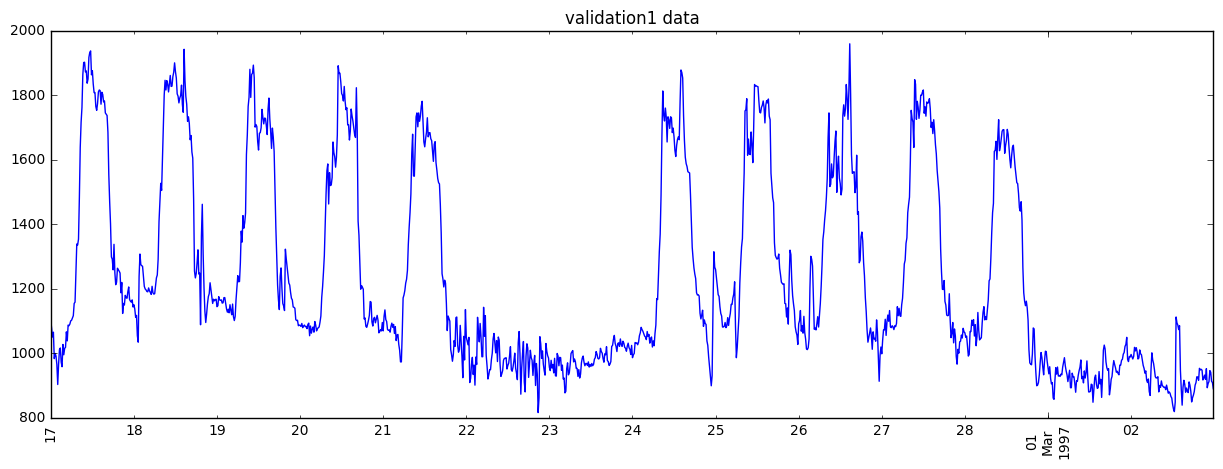

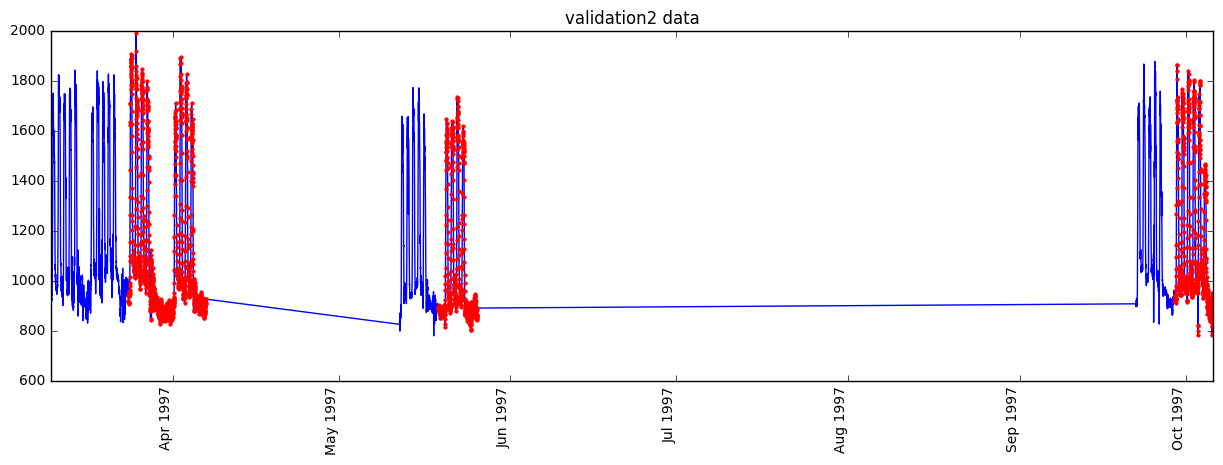

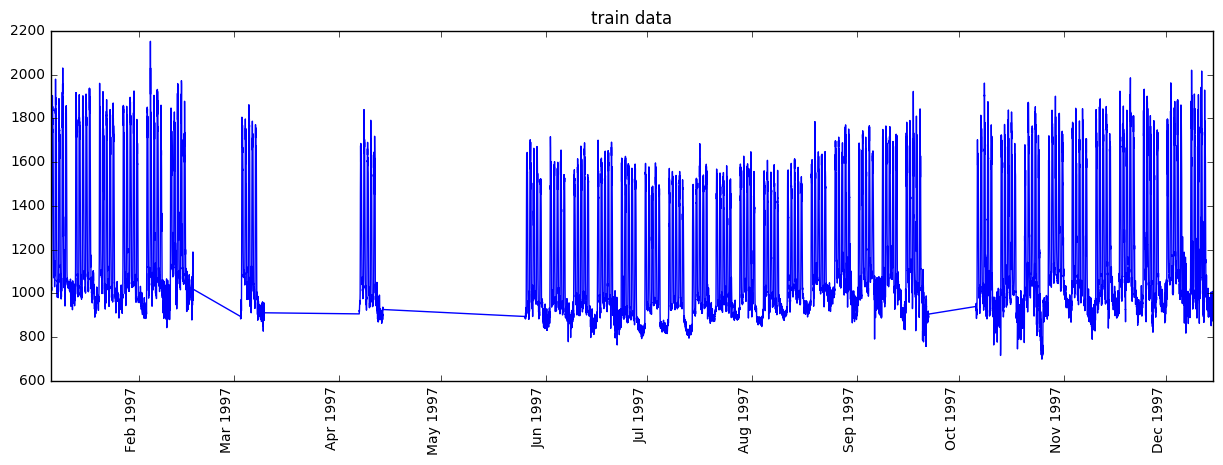

In [34]:
count = 0
for key in df_dict:
    print "Size of %s: %d"%(key,df_dict[key].shape[0])
    count += df_dict[key].shape[0]
print "Total: %d"%(count)

for key in df_dict:
    print "Ratio of %s: %f"%(key,float(df_dict[key].shape[0])/count)

for key in df_dict:
    plt.figure()
    df_tmp = df_dict[key]
    df_tmp['consumption'].plot(figsize=(15,5))
    rows = df_tmp[df_tmp.anomaly.isin([1])].itertuples()
    for row in rows:
        plt.plot(row[0], row[1], 'r.', markersize=5.0)
    plt.xticks(rotation='vertical')
    plt.title("%s data"%(key))
    plt.show()

In [35]:
for key in df_dict:
    np.save("../resources/data/discords/dutch_power/%s"%(key),df_dict[key])

In [158]:
#Detection code starts here
#Detection code starts here
#Detection code starts here
#Detection code starts here

In [159]:
data_folder = "../resources/data/discords/dutch_power/"

In [160]:
#load training data
train_predictions = np.load(data_folder+"train_predictions.npy")
train_true = np.load(data_folder+"train_true.npy")
print train_predictions.shape
print train_true.shape


(5880, 1)
(5880,)


In [161]:
#load validation2 data
validation2_predictions = np.load(data_folder+"validation2_predictions.npy")
validation2_true = np.load(data_folder+"validation2_true.npy")
validation2_labels = np.load(data_folder+"validation2_labels.npy")
print np.shape(validation2_predictions)
print np.shape(validation2_true)
print np.shape(validation2_labels)
validation2_labels = np.reshape(validation2_labels,[len(validation2_labels),np.shape(validation2_labels)[1]])
print np.shape(validation2_labels)


(1176, 1)
(1176,)
(5358, 6, 1)
(5358, 6)


In [162]:
# load test data
test_predictions = np.load(data_folder+"test_predictions.npy")
test_true = np.load(data_folder+"test_true.npy")
test_labels = np.load(data_folder+"test_labels.npy")
print np.shape(test_predictions)
print np.shape(test_true)
test_labels = np.reshape(test_labels,[len(test_labels),np.shape(test_labels)[1]])
print np.shape(test_labels)

(840, 1)
(840,)
(1006, 1)


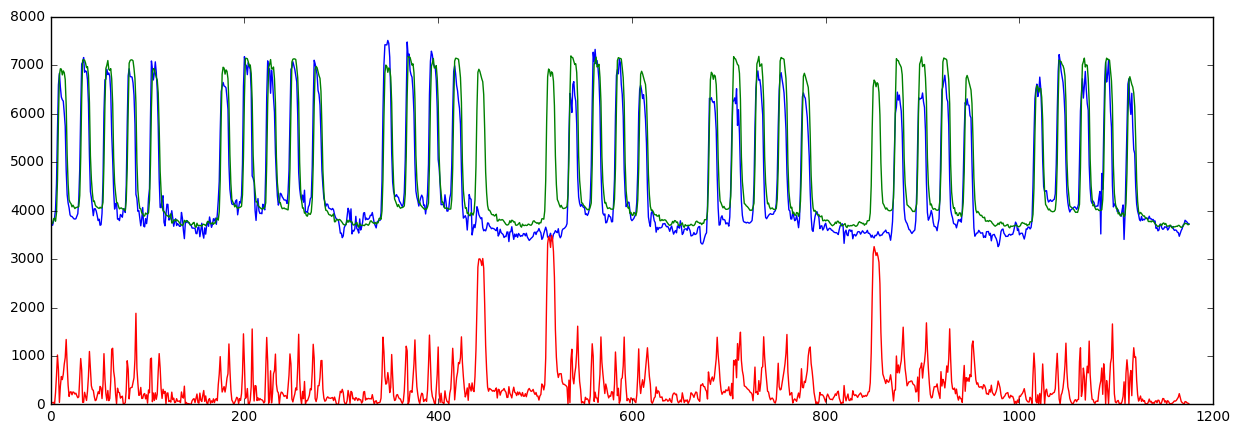

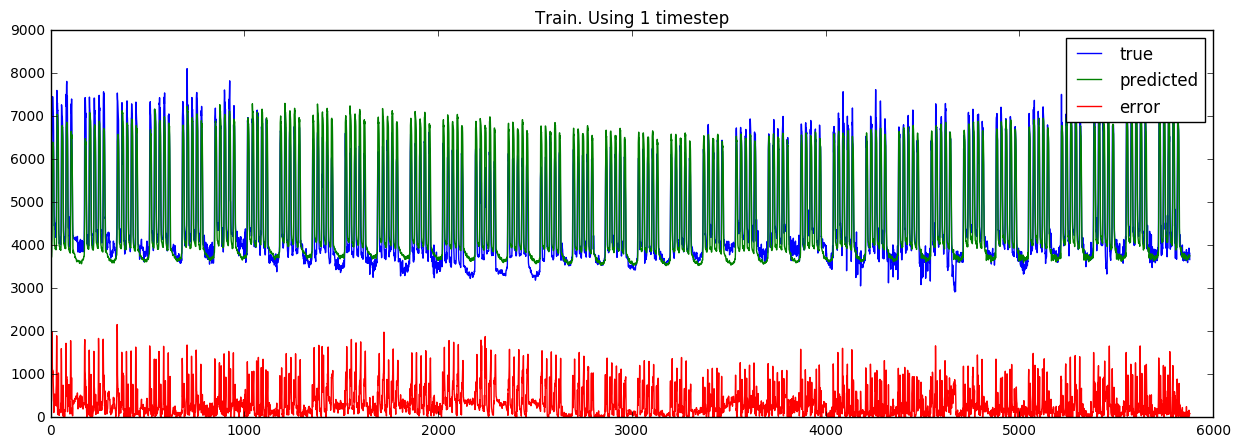

In [163]:
plt.figure(figsize=(15,5))
plt.plot(train_true,label='true')
plt.plot(train_predictions[:,0],label='predicted')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.legend()
plt.title("Train. Using 1 timestep")
plt.show()

[-26.19969848]
225707.134446


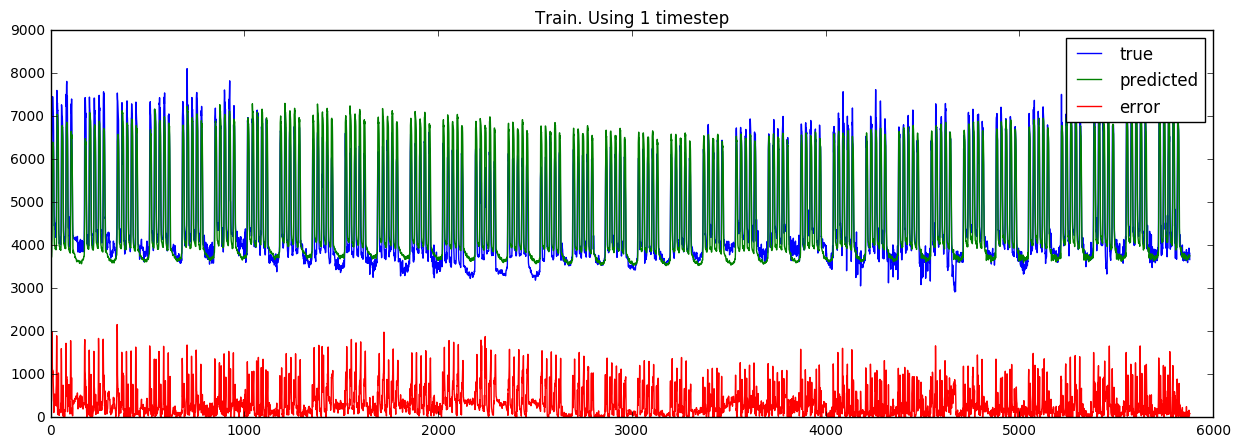

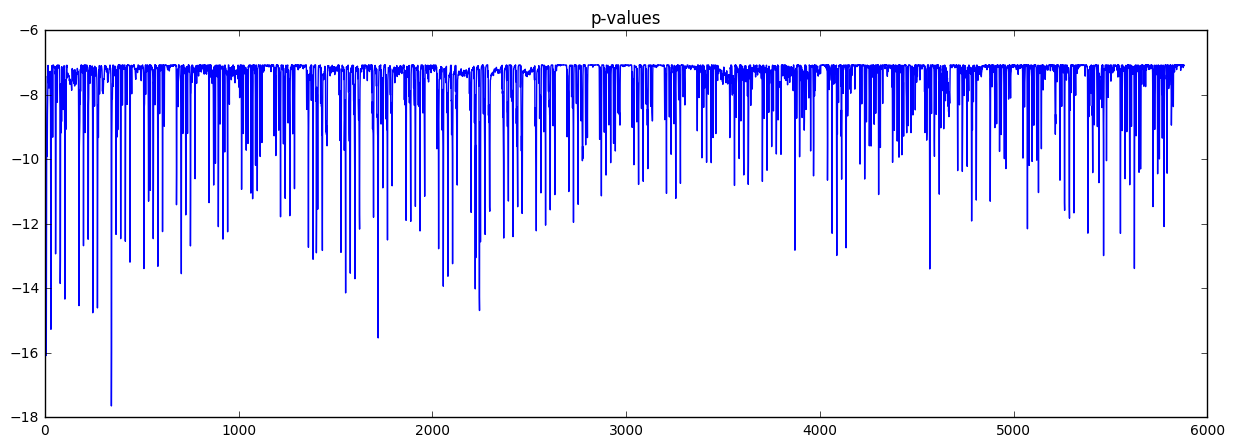

In [164]:
#error vectors
from scipy.stats import norm
from scipy.stats import multivariate_normal

train_error_vectors = np.zeros(np.shape(train_predictions))
n_cols = np.shape(train_predictions)[1]
for i in range(n_cols):
    train_error_vectors[:,i] =  train_true -train_predictions[:,i]

mean = np.mean(train_error_vectors, axis=0)
cov = np.cov(train_error_vectors,rowvar=False)
print mean
print cov
p_values= multivariate_normal.logpdf(train_error_vectors,mean,cov)

plt.figure(figsize=(15,5))
plt.plot(train_true,label='true')
plt.plot(train_predictions[:,0],label='predicted')
plt.plot(abs(train_true - train_predictions[:,0]),label='error')
plt.title("Train. Using 1 timestep")
plt.legend()

# plt.figure(figsize=(15,5))
# plt.plot(train_true,label='true')
# plt.plot(train_predictions[:,5],label='predicted')
# plt.plot(abs(train_true - train_predictions[:,5]),label='error')
# plt.title("Train. Using 6 timestep")
# plt.legend()

plt.figure(figsize=(15,5))
plt.plot(p_values)
plt.title("p-values")
plt.show()

train_errors_1 = train_true - train_predictions[:,0]

In [165]:
v2_error_vectors = np.zeros(np.shape(validation2_predictions))
for i in range(n_cols):
    v2_error_vectors[:,i] =  validation2_true -validation2_predictions[:,i]
v2_p_values= multivariate_normal.logpdf( v2_error_vectors,mean,cov)
# v2_true_anomalies = np.where(validation2_labels[:,0]==1)
# print "Validation2. Number True Anomalies: %d"%(np.shape(v2_true_anomalies)[1])
# print "Validation2. Location of anomalies: %s"%(v2_true_anomalies)
# print "validation2. True anomalies: %s"%(validation2_true[v2_true_anomalies])
# v2_thresholds =v2_p_values[v2_true_anomalies]
# print "validation2. p-values at true anomalies: %s"%(v2_thresholds)

print 
test_error_vectors = np.zeros(np.shape(test_predictions))
for i in range(n_cols):
    test_error_vectors[:,i] =  test_true -test_predictions[:,i]
test_p_values= multivariate_normal.logpdf( test_error_vectors,mean,cov)
test_true_anomalies = np.where(test_labels[:,0]==1)
# print "Test. Number True Anomalies in: %d"%(np.shape(test_true_anomalies)[1])
# print "Test. Location of anomalies: %s"%(test_true_anomalies)
# print "Test. True anomalies: %s"%(test_true[test_true_anomalies])
# test_thresholds = test_p_values[test_true_anomalies]
# print "Test. p-values at true anomalies: %s"%(test_thresholds)




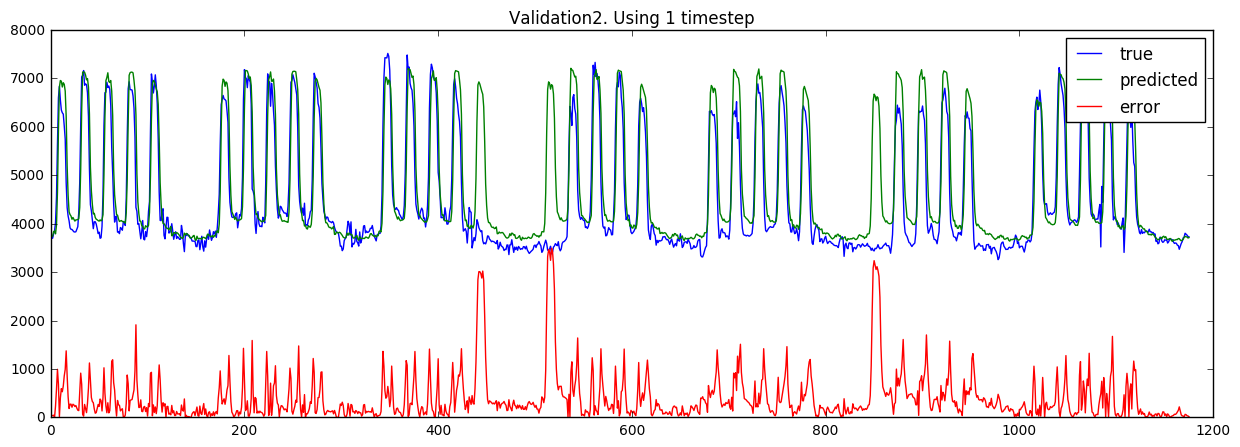

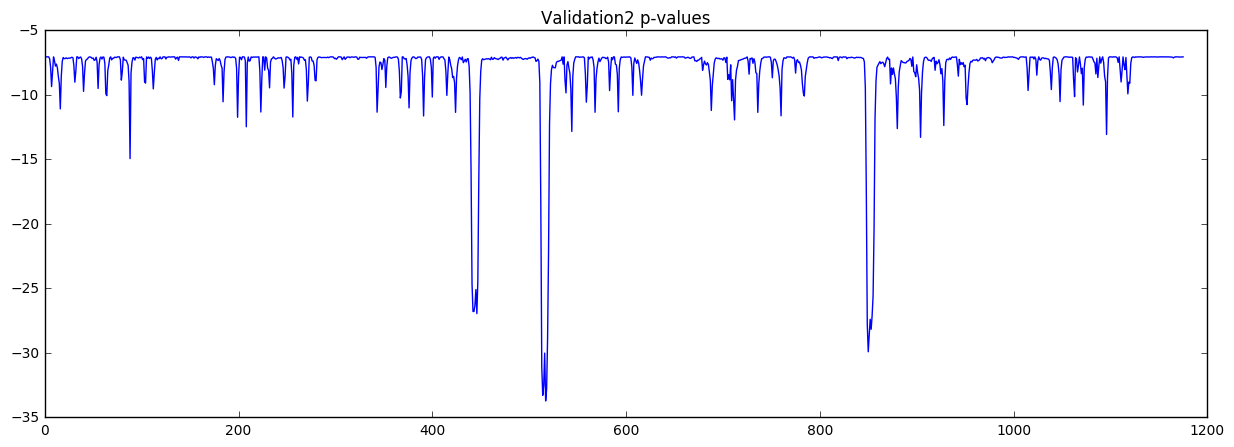

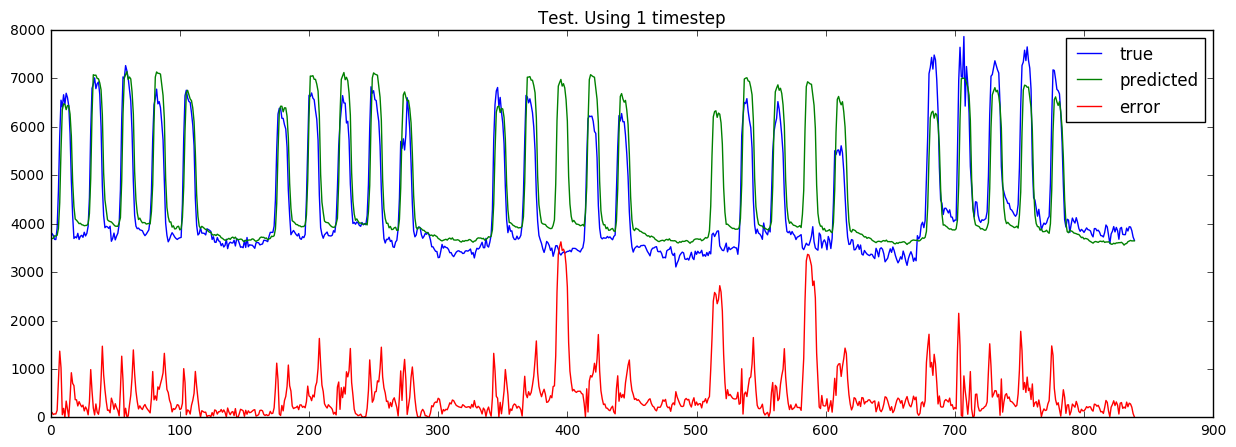

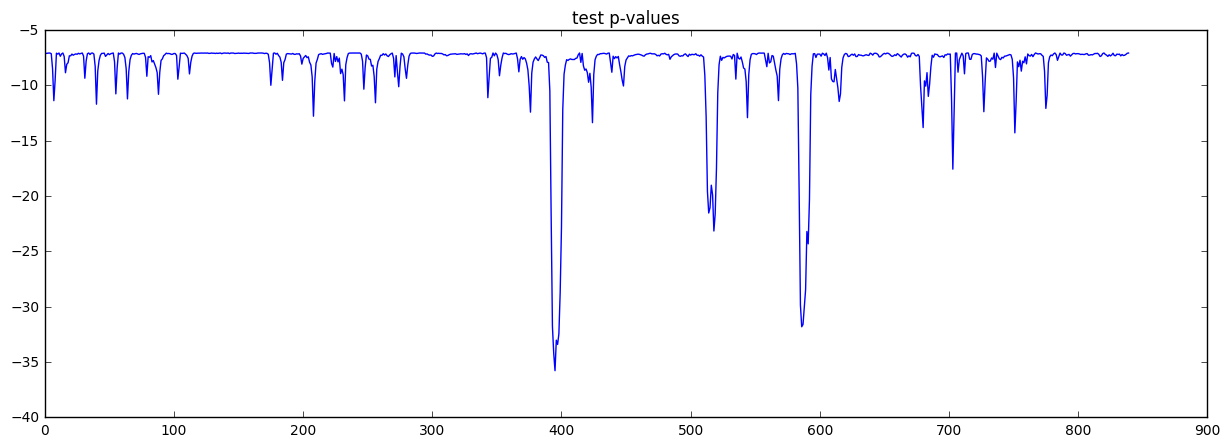

In [166]:
plt.figure(figsize=(15,5))
plt.plot(validation2_true,label='true')
plt.plot(validation2_predictions[:,0],label='predicted')
plt.plot(abs(validation2_true - validation2_predictions[:,0]),label='error')
#for row in v2_true_anomalies:
#    plt.plot(row, validation2_true[row], 'r.', markersize=20.0)
plt.legend()
plt.title("Validation2. Using 1 timestep")
plt.show()

plt.figure(figsize=(15,5))
plt.plot(v2_p_values)
plt.title("Validation2 p-values")
plt.show()

plt.figure(figsize=(15,5))
plt.plot(test_true,label='true')
plt.plot(test_predictions[:,0],label='predicted')
plt.plot(abs(test_true - test_predictions[:,0]),label='error')
#for row in test_true_anomalies:
#    plt.plot(row, test_true[row], 'r.', markersize=20.0)
plt.legend()
plt.title("Test. Using 1 timestep")
plt.show()

plt.figure(figsize=(15,5))
plt.plot(test_p_values)
plt.title("test p-values")
plt.show()

In [167]:
#thresholds = np.append(v2_thresholds,test_thresholds)

#thresholds =v2_thresholds
thresholds =[-100]
print
print "Candidate Thresholds: %s"%(thresholds)


for i in thresholds:
    theta= i
    test_potential_anomalies = np.where(test_p_values <= theta)
    v2_potential_anomalies = np.where(v2_p_values <= theta)
    plt.figure(figsize=(15,5))
    plt.plot(validation2_true,label='true')
    plt.plot(validation2_predictions[:,0],label='predicted')
    plt.plot(abs(validation2_true - validation2_predictions[:,0]),label='error')
    for row in v2_true_anomalies:
        plt.plot(row, validation2_true[row], 'r.', markersize=20.0)
    for row in v2_potential_anomalies:
        plt.plot(row, validation2_true[row], 'k.', markersize=20.0)
    plt.legend()
    plt.title("Theta %s. Validation2. Using 1 timestep"%(i))
    plt.show()

    plt.figure(figsize=(15,5))
    plt.plot(test_true,label='true')
    plt.plot(test_predictions[:,0],label='predicted')
    plt.plot(abs(test_true - test_predictions[:,0]),label='error')
    for row in test_true_anomalies:
        plt.plot(row, test_true[row], 'r.', markersize=20.0)
    for row in test_potential_anomalies:
        plt.plot(row, test_true[row], 'k.', markersize=20.0)
    plt.legend()
    plt.title("Theta %s. Test. Using 1 timestep"%(i))
    plt.show()



Candidate Thresholds: [-100]


IndexError: index 1332 is out of bounds for axis 1 with size 1176